In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn as sl

In [ ]:
!pip install neupy

In [ ]:
from neupy.layers import *
from neupy.init import XavierNormal
from neupy import algorithms

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.metrics import BinaryAccuracy

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Характеристики нейронной сети

In [4]:
firstLayerAmountOfNeurons  = 10
secondLayerAmountOfNeurons = 10
thirdLayerAmountOfNeurons = 5

firstLayerActivation  = 'sigmoid'
secondLayerActivation = 'sigmoid'
thirdLayerActivation = 'sigmoid'

trainPercent      = 0.6
validationPercent = 0.3
testPercent       = 1 - trainPercent - validationPercent

learning_rate  = 0.01
amountOfEpochs = 100

# Получение данных

In [20]:
# names = [
#     'age',
#     'workclass',
#     'fnlwgt',
#     'education',
#     'education-num',
#     'marital-status',
#     'occupation',
#     'relationship',
#     'race',
#     'sex',
#     'capital-gain',
#     'capital-loss',
#     'hours-per-week',
#     'native-country'
# ]

# names_c = [
#     'age',
#     'workclass',
#     'fnlwgt',
#     'education',
#     'education-num',
#     'marital-status',
#     'occupation',
#     'relationship',
#     'race',
#     'sex',
#     'capital-gain',
#     'capital-loss',
#     'hours-per-week',
#     'native-country',
#     'class'
# ]

data = pd.read_excel('./Folds5x2_pp.xlsx')  

# data = data.replace(' ?', None).astype('float')

# data['class'] = data['class'].str.replace('<=50K', '0')
# data['class'] = data['class'].str.replace('>50K', '1')


# i = 1
# for name in names:
#     i = 1
#     d = {}
#     for value in list(set(data[name].values)):
#         if not str(value).isnumeric():
#             d[str(value)[1:]] = str(i)
#             i += 1
#         # print(d)
#         try:
#             data[name] = data[name].str.replace(value[1:], d[str(value)[1:]])
#         except:
#             pass

_data      = data.to_numpy()
# data_x = data[names]

# pd.DataFrame({'Class': _data[:, -1]}).value_counts()

# for name in names:
#     print(data[name].value_counts())
names = ['AT', 'V', 'AP', 'RH']
print(len(data))
data_x = data[['AT', 'V', 'AP', 'RH']]
data

9568


AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]

# Визуализация исходных данных

#### Гистограммы распределения признаков

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


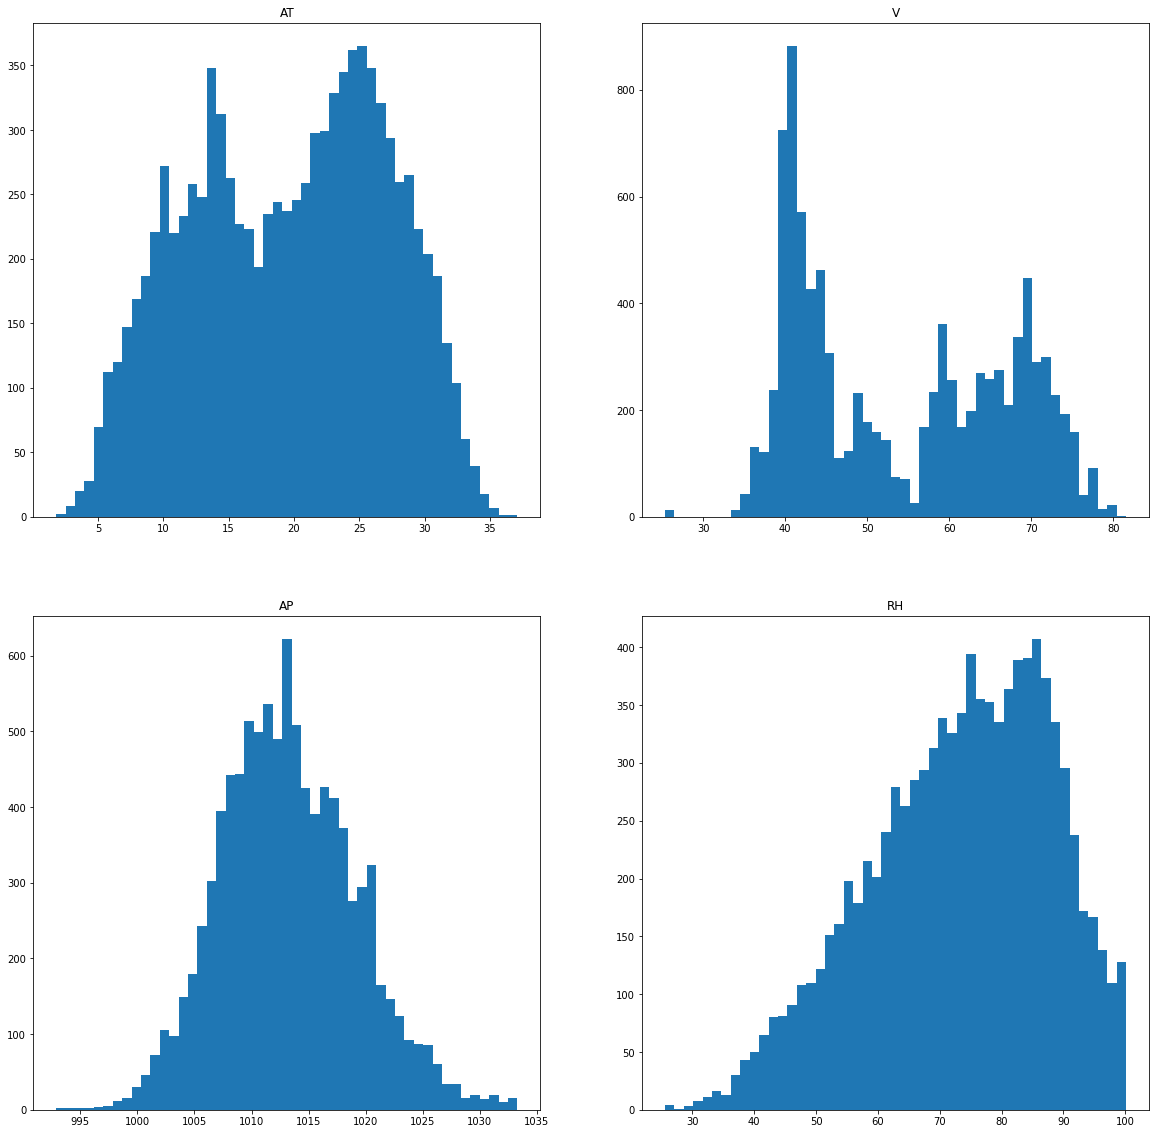

In [14]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches((20, 20))

for i in range(2):
    for j in range(2):
        x = data_x[names[i*2+j]].to_numpy().astype(np.float)
        ax[i][j].hist(x, bins=np.linspace(min(x), max(x), 50))
        ax[i][j].title.set_text(names[i*2+j])


plt.savefig('./Graphs/gistogram_virgin.png', dpi=300)

#### Корреляционная матрица

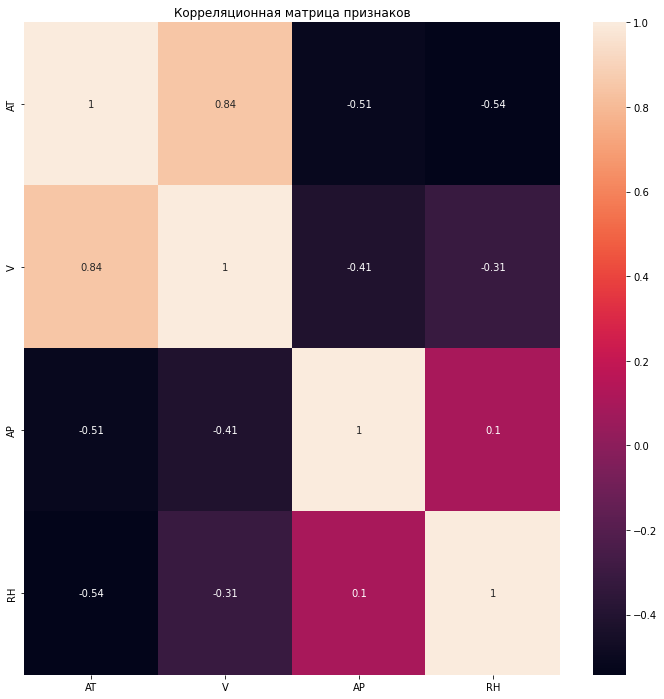

In [15]:
# Создаём корреляционную матрицу
corr_matrix = data_x.loc[:, names].corr()

# Визуализация матрицы с помощью heatmap
fig = plt.gcf()
fig.set_size_inches((12, 12))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Корреляционная матрица признаков')

plt.savefig('./Graphs/heatmap_1.png', dpi=300)

#### Диаграммы рассеяния

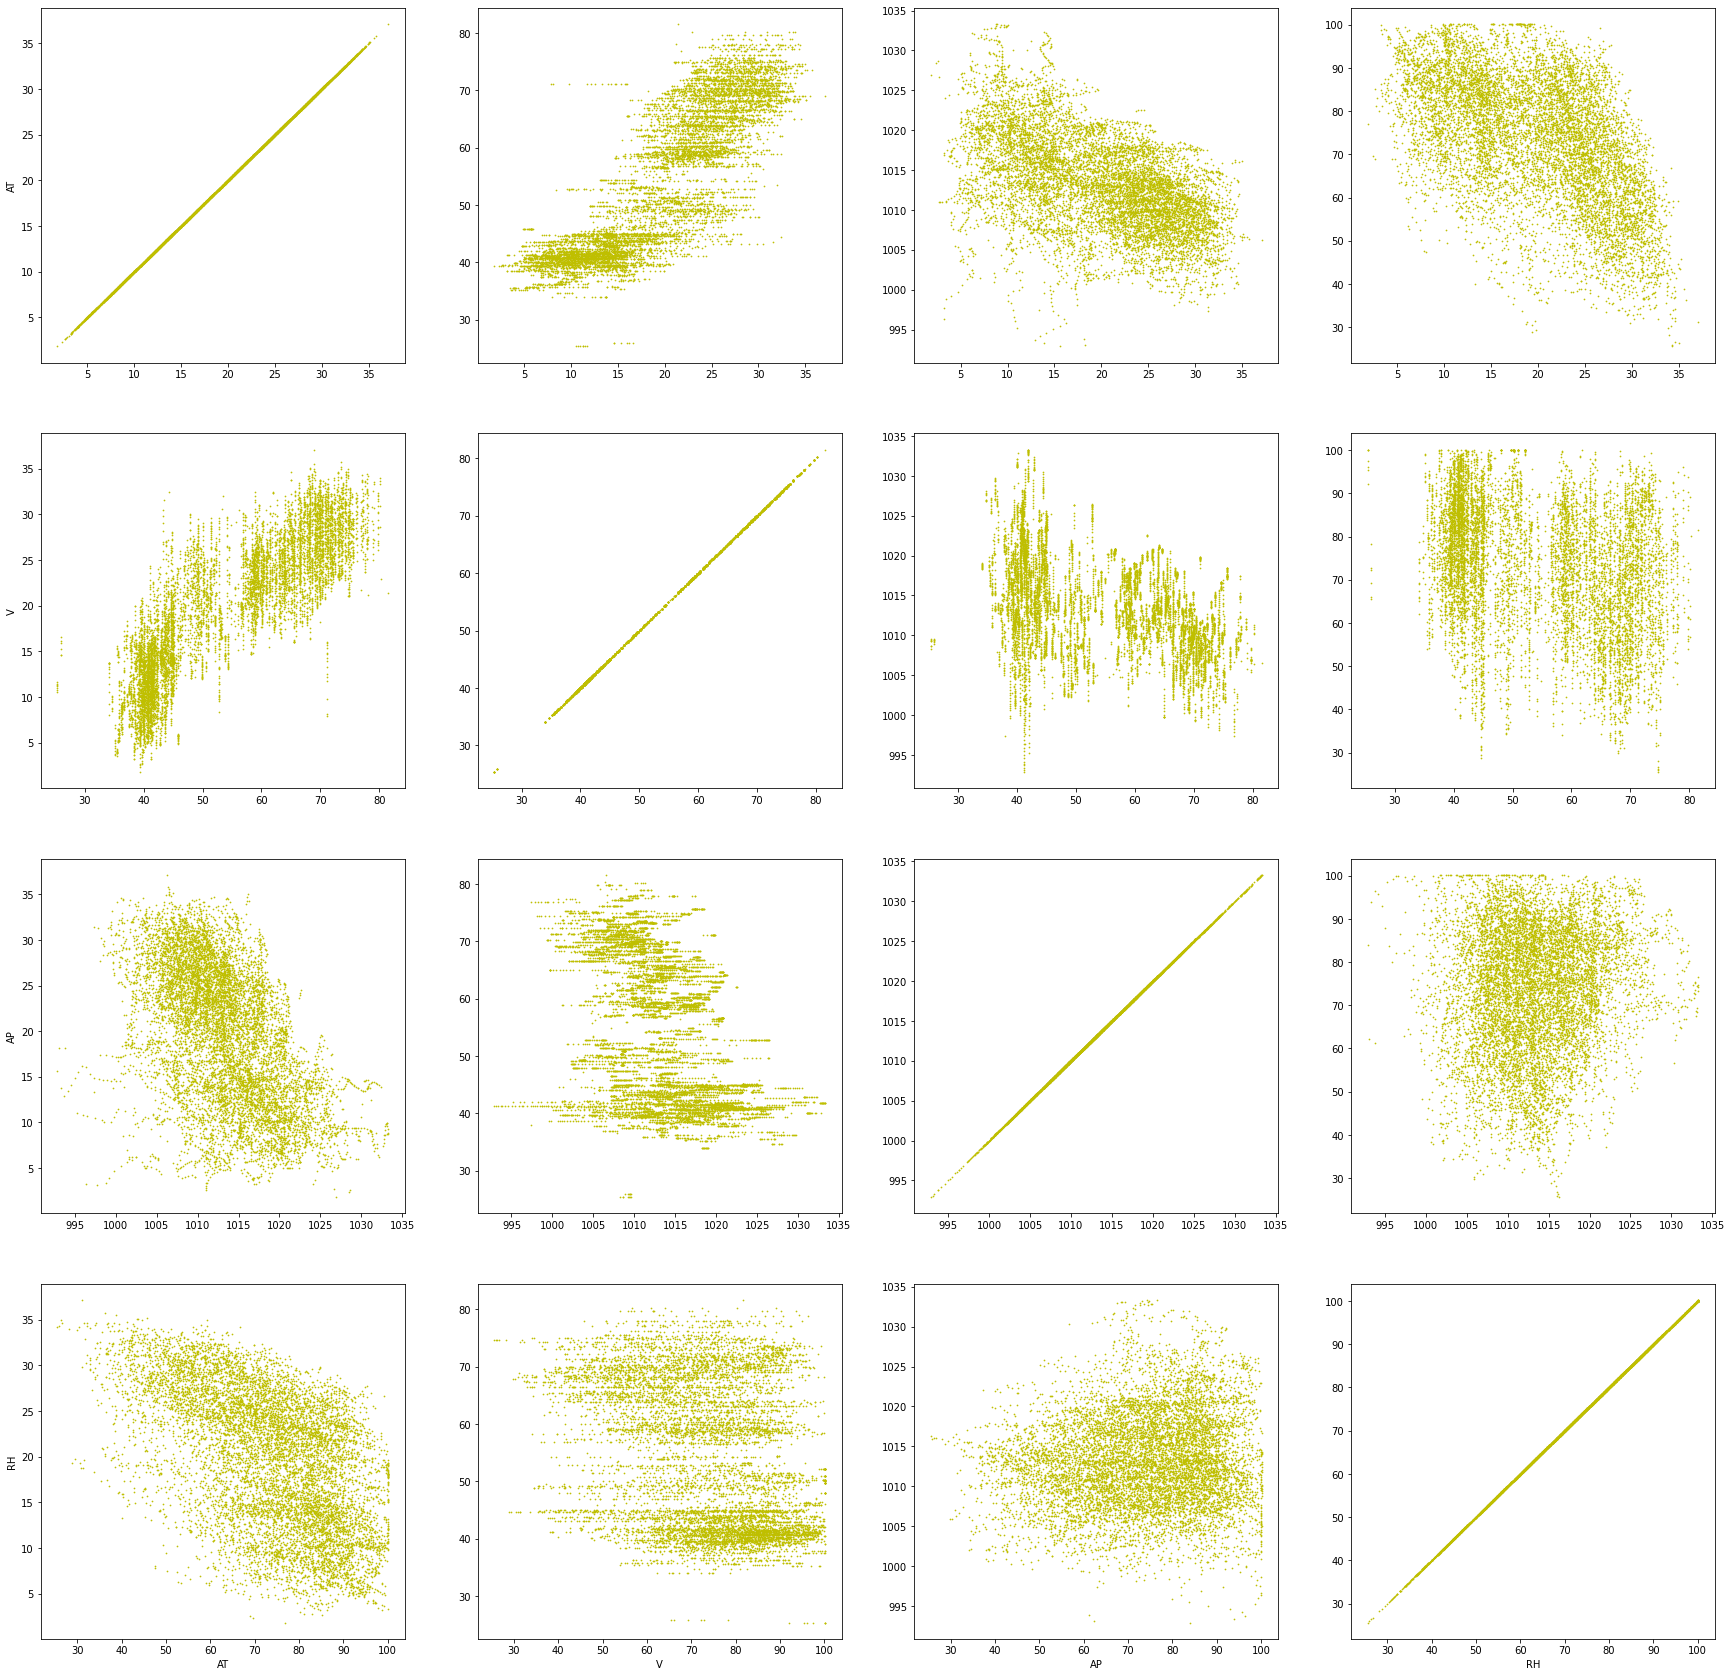

In [16]:
fig2, ax2 = plt.subplots(len(names), len(names))
fig2.set_size_inches((30, 30))

for i, x in enumerate(names):
    for j, y in enumerate(names):
        ax2[i][j].scatter(data[x], data[y], s=0.5, c='y')
        ax2[-1][j].set_xlabel(y)
    ax2[i][0].set_ylabel(x)

plt.savefig('./Graphs/diagrams_1.png', dpi=300)

# Преобразование данных

### Обнаружение и удаление дубликатов

In [17]:
len_before_dropping = len(data.to_numpy())

data.drop_duplicates(inplace=True)
len_after_dropping = len(data.to_numpy())

print(f'{len_before_dropping}\n{len_after_dropping}')

9568
9527


### Устранение выбросов

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

Data classes before reducing:
0.0    24720
1.0     7841
Name: class, dtype: int64
        age  workclass    fnlwgt  education  education-num  marital-status  \
0      39.0        NaN   77516.0        1.0           13.0             3.0   
1      50.0        2.0   83311.0        1.0           13.0             1.0   
2      38.0        1.0  215646.0        4.0            9.0             2.0   
3      53.0        1.0  234721.0        3.0            7.0             1.0   
4      28.0        1.0  338409.0        1.0           13.0             1.0   
...     ...        ...       ...        ...            ...             ...   
32556  27.0        1.0  257302.0        6.0           12.0             1.0   
32557  40.0        1.0  154374.0        4.0            9.0             1.0   
32558  58.0        1.0  151910.0        4.0            9.0             5.0   
32559  22.0        1.0  201490.0        4.0            9.0             3.0   
32560  52.0        3.0  287927.0        4.0            9.0  

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

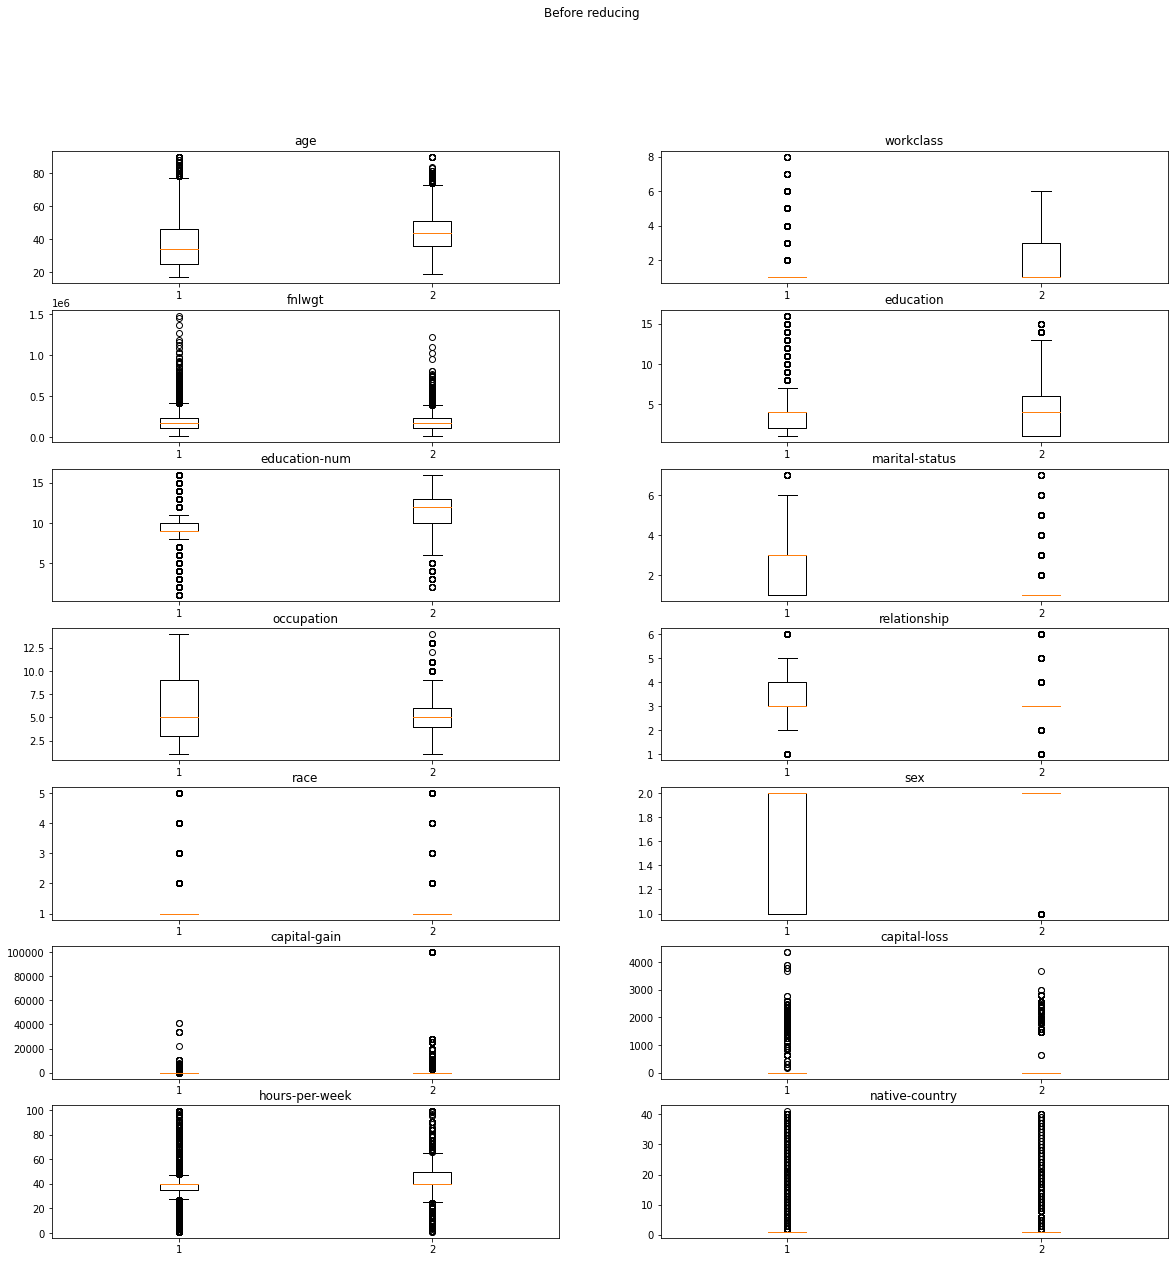

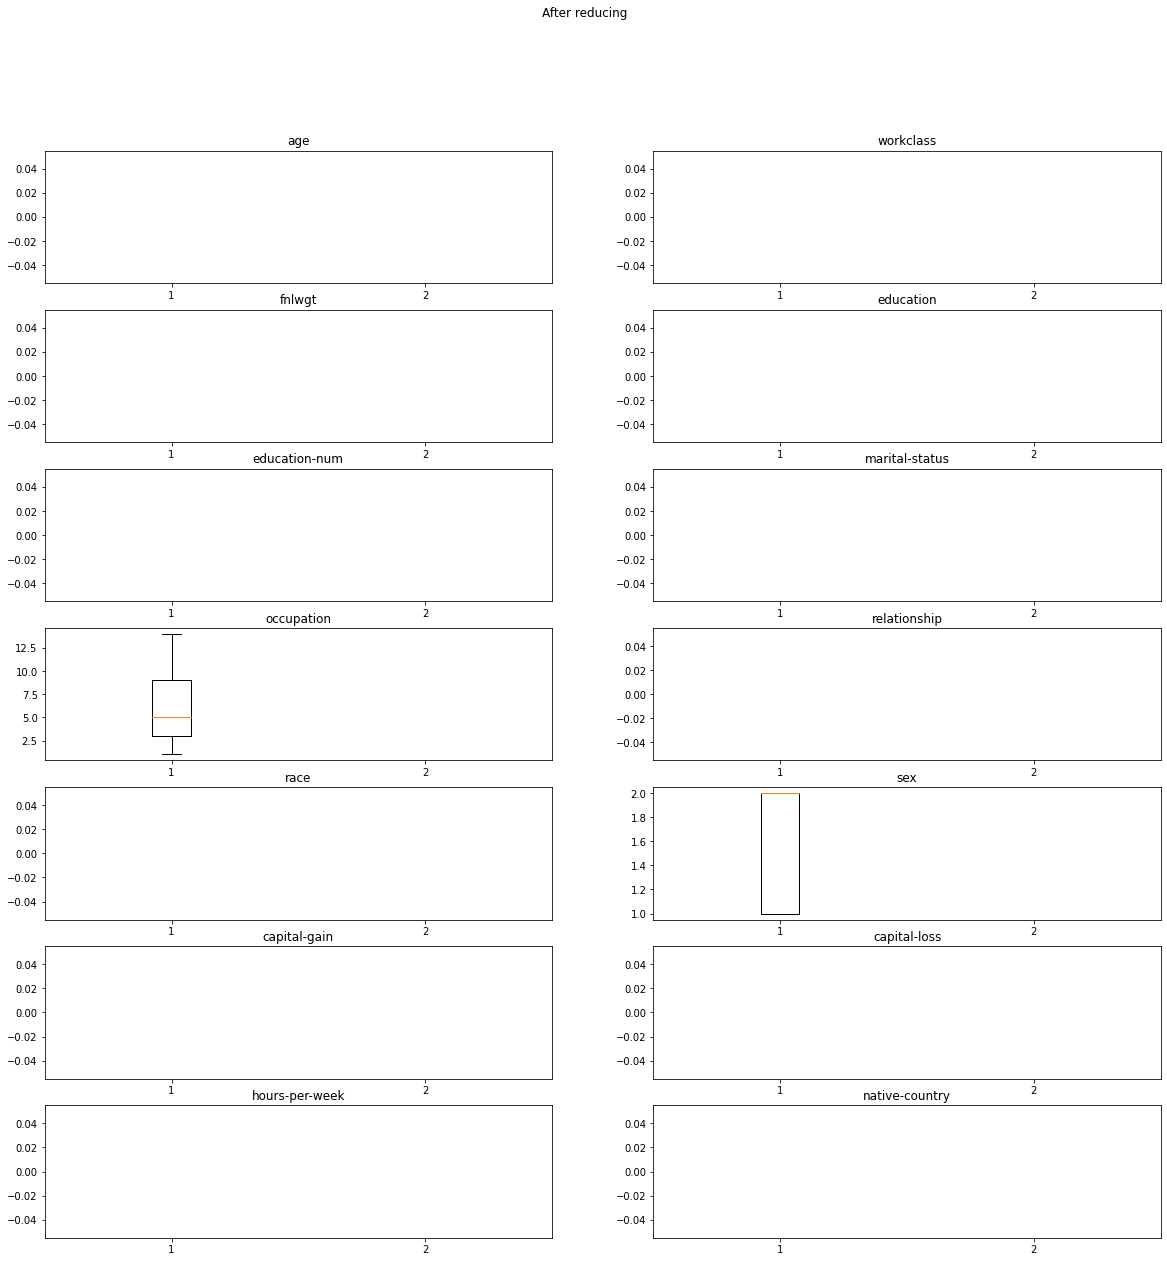

In [ ]:
_data_to_reduce = data.copy()


# fig3, ax3 = plt.subplots(7, 2)
# fig3.set_size_inches((20, 20))
# plt.suptitle('Before reducing')

# for i in range(7):
#     for j in range(2):

#         class1 = _data_to_reduce[_data_to_reduce['class']==0][names[i*2+j]].to_numpy()
#         class2 = _data_to_reduce[_data_to_reduce['class']==1][names[i*2+j]].to_numpy()

#         ax3[i][j].boxplot((class1, class2))
#         ax3[i][j].title.set_text(names[i*2+j])

# plt.savefig('./Graphs/box_not_reduced.png', dpi=300)


# print('Data classes before reducing:')
# print(_data_to_reduce['class'].value_counts())

# Q1 = _data_to_reduce.quantile(0.25)
# Q3 = _data_to_reduce.quantile(0.75)
# IQR = (Q3 - Q1)
# mask = (_data_to_reduce < (Q1 - 1.5 * IQR)) | (_data_to_reduce > (Q3 + 1.5 * IQR))
# _data_to_reduce[mask] = np.nan
# print(_data_to_reduce)


# for column in names:
#     temp_class_1 = _data_to_reduce[_data_to_reduce['class']==0][column]

#     m = 2.5

#     Q1 = temp_class_1.quantile(0.25)
#     Q3 = temp_class_1.quantile(0.75)
#     IQR = (Q3 - Q1)
    
#     _data_to_reduce = _data_to_reduce[((_data_to_reduce['class'] == 0) & (_data_to_reduce[column] > Q1-m*IQR ) & (_data_to_reduce[column] < Q3+m*IQR)) | (_data_to_reduce['class']==1)]

#     temp_class_2 = _data_to_reduce[_data_to_reduce['class']==1][column]

#     Q1 = temp_class_2.quantile(0.25)
#     Q3 = temp_class_2.quantile(0.75)
#     IQR = (Q3 - Q1)

#     _data_to_reduce = _data_to_reduce[((_data_to_reduce['class'] == 1) & (_data_to_reduce[column] > Q1-m*IQR ) & (_data_to_reduce[column] < Q3+m*IQR)) | (_data_to_reduce['class']==0)]


# _data_reduced = _data_to_reduce.copy()
# print('\nData classes after reducing:')
# print(_data_to_reduce['class'].value_counts())

# fig4, ax4 = plt.subplots(7, 2)
# fig4.set_size_inches((20, 20))
# plt.suptitle('After reducing')
# for i in range(7):
#     for j in range(2):

#         class1 = _data_reduced[_data_reduced['class']==0][names[i*2+j]].to_numpy()
#         class2 = _data_reduced[_data_reduced['class']==1][names[i*2+j]].to_numpy()

#         ax4[i][j].boxplot((class1, class2))
#         ax4[i][j].title.set_text(names[i*2+j])

# plt.savefig('./Graphs/box_reduced.png', dpi=300)

### Стандартизация данных

In [23]:
names_c = names.copy()
names_c += ['PE']
print(names_c)

scaler_1 = StandardScaler()
_data_standart = pd.DataFrame(scaler_1.fit_transform(data[names_c]), columns=names_c)
# _data_standart['PE'] = data['PE'].to_numpy()
_data_standart

['AT', 'V', 'AP', 'RH', 'PE']


AT         V        AP        RH        PE
0    -0.629519 -0.987297  1.820488 -0.009519  0.521208
1     0.741909  0.681045  1.141863 -0.974621 -0.585664
2    -1.951297 -1.173018 -0.185078  1.289840  2.003679
3     0.162205  0.237203 -0.508393  0.228160 -0.462028
4    -1.185069 -1.322539 -0.678470  1.596699  1.144666
...        ...       ...       ...       ...       ...
9563 -0.402737 -0.363242  0.126450  1.211755  0.331944
9564 -0.867037 -1.190331  1.753131 -0.447205  0.893877
9565  1.565840  1.575811 -0.057099 -2.522618 -1.452881
9566  0.647976  1.191778  0.101191 -0.747901 -1.091345
9567  0.261507  0.646419  0.668677 -0.372545 -0.063577

[9568 rows x 5 columns]

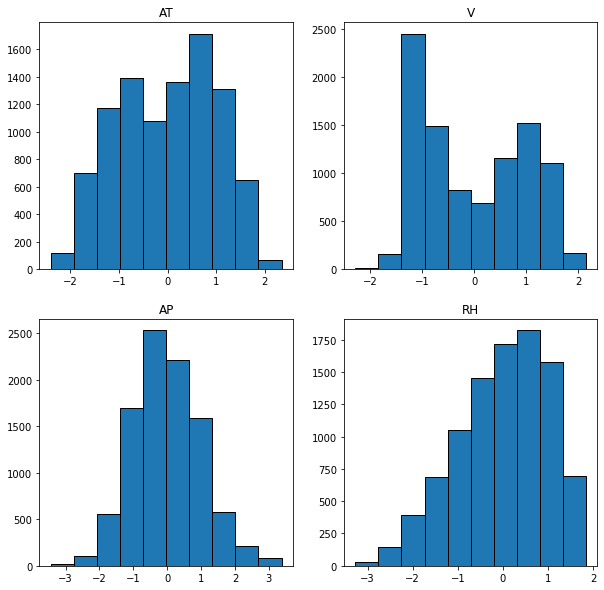

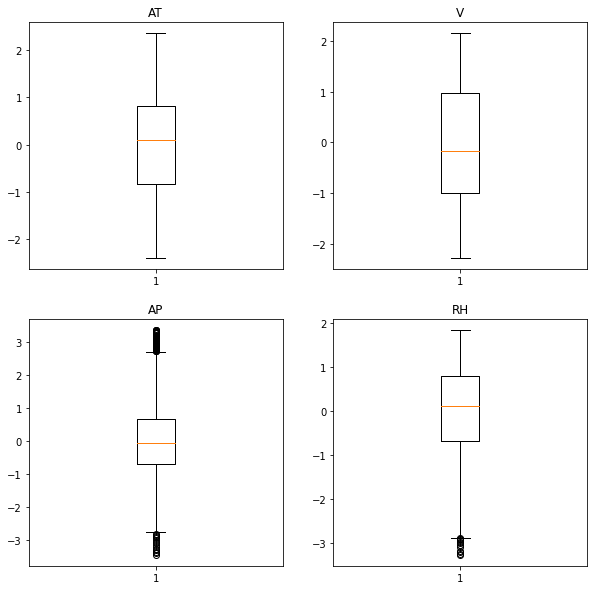

In [26]:
fig5, ax5 = plt.subplots(2, 2)
fig5.set_size_inches((10, 10))

bins = [np.linspace(-1, 8, num=20), np.linspace(-0.5, 13, num=20), np.linspace(-1, 8, num=20), np.linspace(0, 30, num=100),
        np.linspace(-1, 6, num=40), np.linspace(-0.5, 8, num=20), np.linspace(-0.5, 8, num=20), np.linspace(-0.5, 8, num=20)]

for i in range(2):
    for j in range(2):
        ax5[i][j].hist(_data_standart[names[i*2+j]].to_numpy(), edgecolor='black')
        ax5[i][j].title.set_text(names[i*2+j])

plt.savefig('./Graphs/hist_standart.png', dpi=300)


fig6, ax6 = plt.subplots(2, 2)
fig6.set_size_inches((10, 10))

for i in range(2):
    for j in range(2):


        ax6[i][j].boxplot(_data_standart[names[i*2+j]].to_numpy())
        ax6[i][j].title.set_text(names[i*2+j])


plt.savefig('./Graphs/box_standart.png', dpi=300)

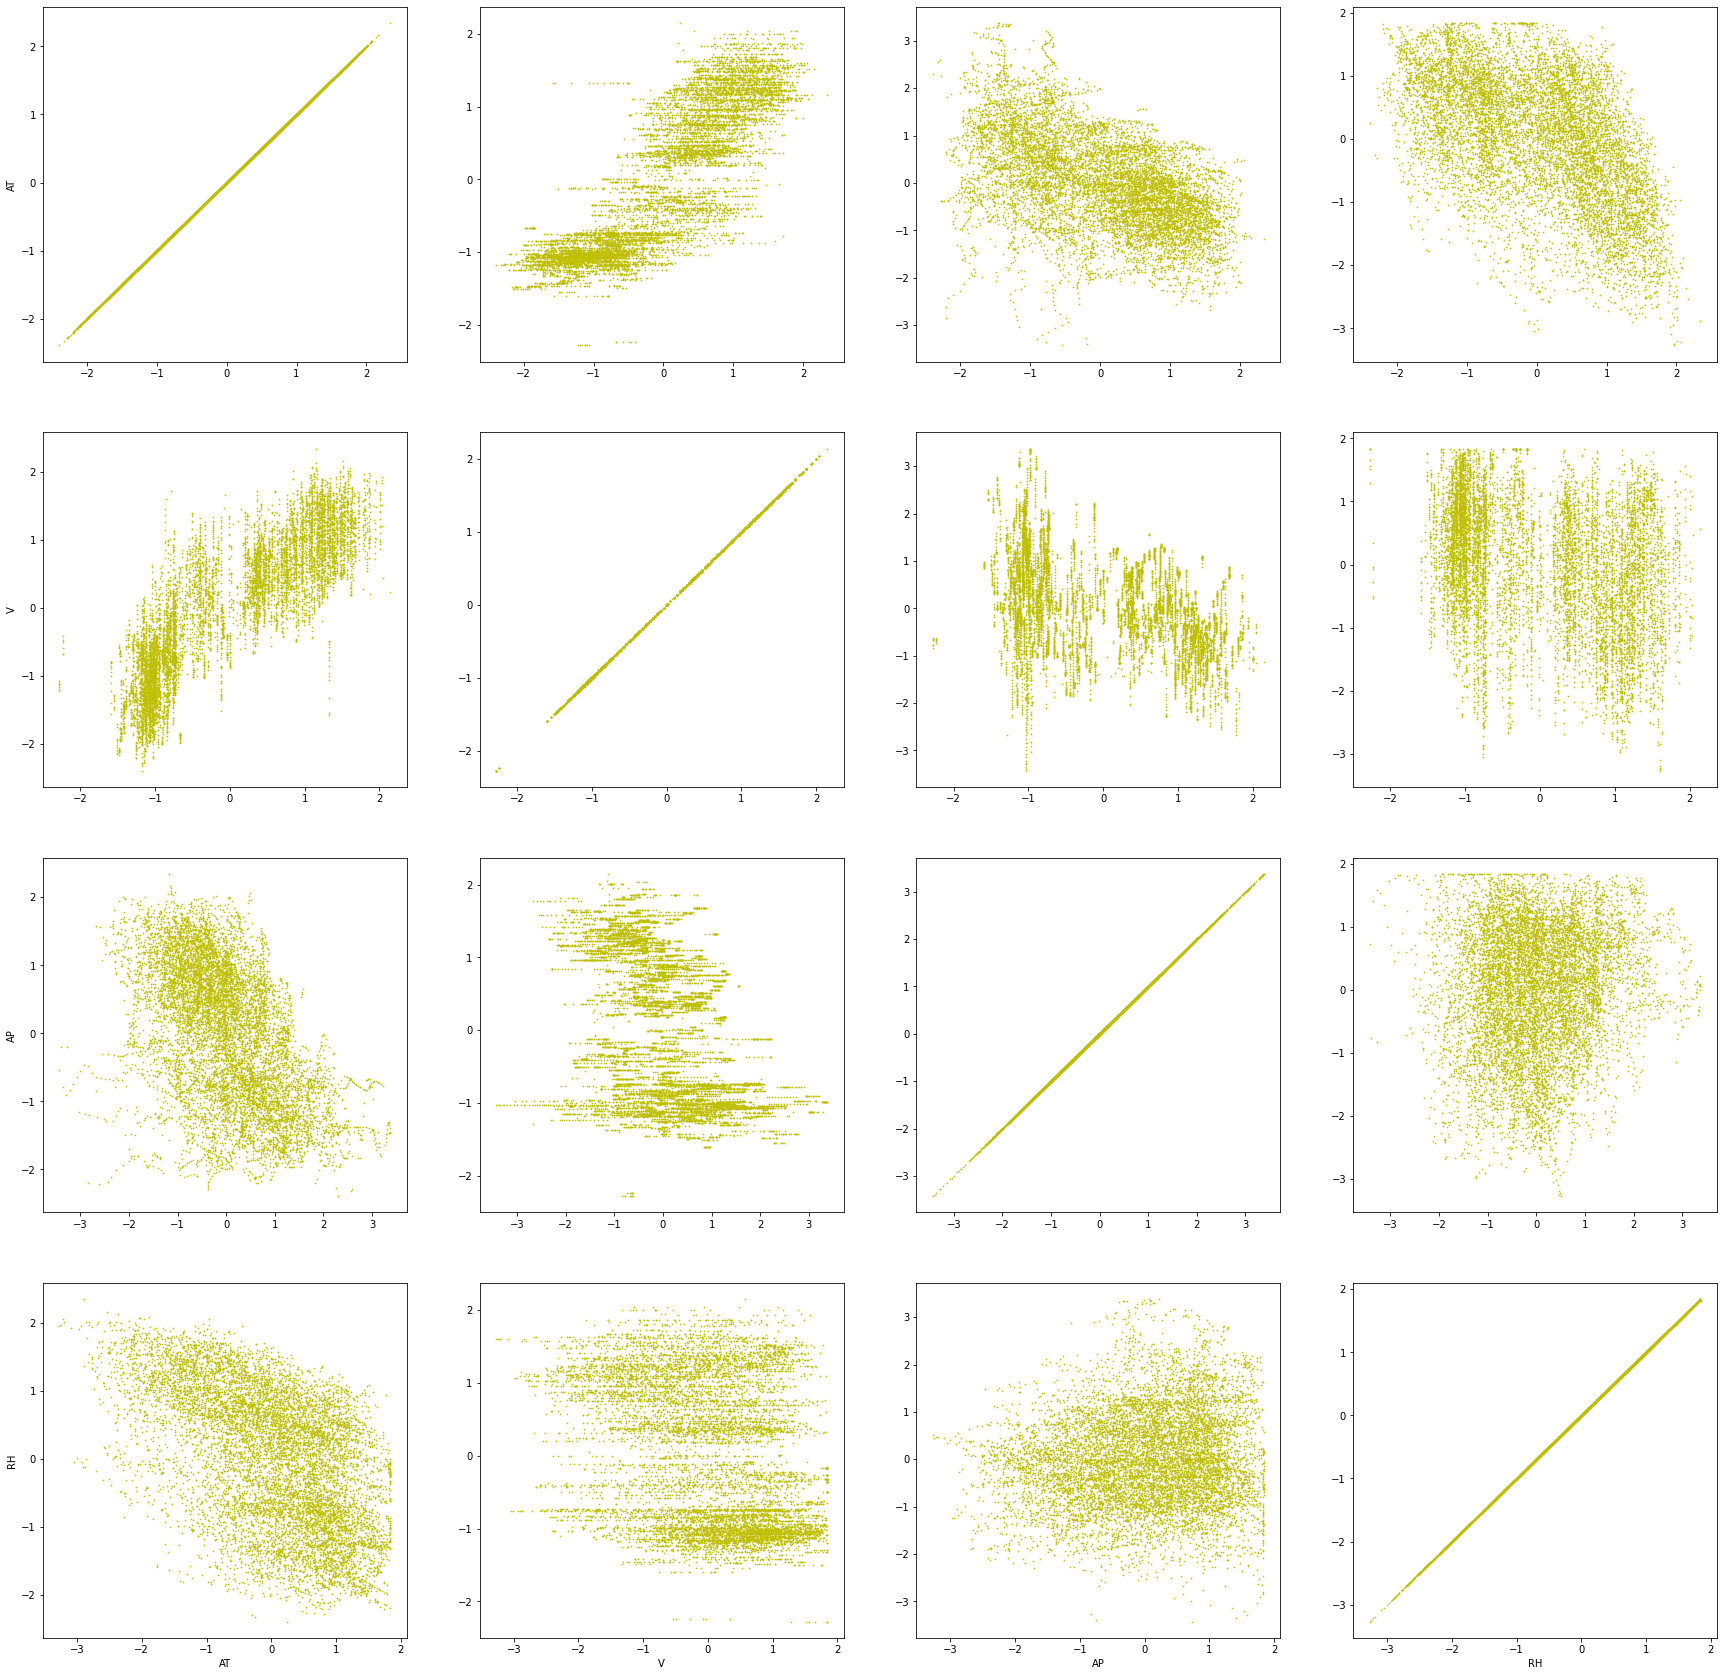

In [27]:
fig7, ax7 = plt.subplots(len(names), len(names))
fig7.set_size_inches((30, 30))

for i in range(len(names)):
    for j in range(len(names)):
        ax7[i][j].scatter(_data_standart[names[i]].to_numpy(), _data_standart[names[j]].to_numpy(), s=0.5, c='y')
        ax7[-1][j].set_xlabel(names[j])
    ax7[i][0].set_ylabel(names[i])

plt.savefig('./Graphs/diagram_standart.png', dpi=300)

### Корреляционная матрица признаков

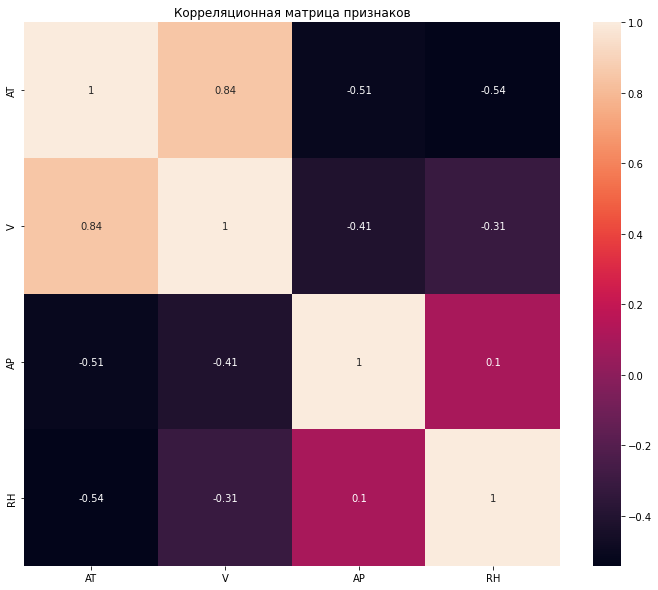

In [29]:
# Создаём корреляционную матрицу
corr_matrix = data_x.loc[:, names].corr()

# Визуализация матрицы с помощью heatmap
fig = plt.gcf()
fig.set_size_inches((12, 10))
hm = sns.heatmap(corr_matrix, annot=True)
hm.set_title('Корреляционная матрица признаков')

plt.savefig('./Graphs/heatmap_standart.png', dpi=300)

# Создание тренировочного, валидационного и тестового датасета

In [30]:
_data      = _data_standart.to_numpy()
data_size  = len(_data)
batch_size = len(_data)

trainAmount      = int(data_size * trainPercent)
validationAmount = int(data_size * validationPercent)
testAmount       = data_size - trainAmount - validationAmount

print(f'{trainAmount}')
print(f'{validationAmount}')
print(f'{testAmount}')

np.random.shuffle(_data)

_data_train      = _data[:trainAmount]
_data_validation = _data[trainAmount:trainAmount+validationAmount]
_data_test       = _data[trainAmount+validationAmount:]

_data_train_x = _data_train[:, :-1]
_data_train_y = _data_train[:, -1]
# _data_train_y = tf.keras.utils.to_categorical(_data_train_y, num_classes=2)

_data_validation_x = _data_validation[:, :-1]
_data_validation_y = _data_validation[:, -1]
# _data_validation_y = tf.keras.utils.to_categorical(_data_validation_y, num_classes=2)

_data_test_x = _data_test[:, :-1]
_data_test_y = _data_test[:, -1]
# _data_test_y = tf.keras.utils.to_categorical(_data_test_y, num_classes=2)

#-------

x_train = _data_train_x.copy()
x_val = _data_validation_x.copy()
x_test = _data_test_x.copy()

y_train = _data_train_y.copy()
y_val = _data_validation_y.copy()
y_test = _data_test_y.copy()

5740
2870
958


In [31]:
# Равномерное распределение на отрезке
# kernel_initializer = tf.keras.initializers.RandomUniform(minval=-1., maxval=1., seed=None)
# bias_initializer   = tf.keras.initializers.RandomUniform(minval=-1., maxval=1., seed=None)

# Нормальное распределение с заданными средним и среднеквадратичным отколенением
# kernel_initializer = tf.keras.initializers.RandomNormal(stddev=0.05)
# bias_initializer   = tf.keras.initializers.RandomNormal(stddev=0.05)

# Метод инициализации Хавьера
kernel_initializer = tf.keras.initializers.TruncatedNormal(seed=15)
bias_initializer   = tf.keras.initializers.TruncatedNormal(seed=15)

In [33]:
inputLayer = tf.keras.layers.Input(shape=(4,))

firstHiddenLayer = tf.keras.layers.Dense(
    firstLayerAmountOfNeurons,
    activation        =firstLayerActivation, 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='First_Hidden'
)(inputLayer)

secondHiddenLayer = tf.keras.layers.Dense(
    secondLayerAmountOfNeurons,
    activation        =secondLayerActivation, 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Second_Hidden'
)(firstHiddenLayer)

thirdHiddenLayer = tf.keras.layers.Dense(
    thirdLayerAmountOfNeurons,
    activation        =thirdLayerActivation, 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name              ='Third_Hidden'
)(secondHiddenLayer)

outputLayer = tf.keras.layers.Dense(
    1, 
    kernel_initializer=kernel_initializer, 
    bias_initializer  =bias_initializer,
    name='Output'
)(thirdHiddenLayer)

model = keras.Model(inputs=inputLayer, outputs=outputLayer)

model.compile(
    optimizer=tf.keras.optimizers.SGD(
        lr=learning_rate
    ),
    loss='mse'
)

model.summary()
model.save('./models/model_sgd_1.h5')
model.save_weights('./weights/weight_2')
# model.predict(_data_train_x)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
First_Hidden (Dense)         (None, 10)                50        
_________________________________________________________________
Second_Hidden (Dense)        (None, 10)                110       
_________________________________________________________________
Third_Hidden (Dense)         (None, 5)                 55        
_________________________________________________________________
Output (Dense)               (None, 1)                 6         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________

Consider using a TensorFlow optimizer from `tf.train`.


# 4.2 Простой градиентный метод

### GD

In [35]:
l_rates = [
    0.001, 
    0.005, 
    0.05, 
    0.1, 
    1.0
]

amountOfEpochs = 300

errors = dict()

for lr in l_rates:
    errors[lr] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            lr=lr, 
        ),
        loss='mse'
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        errors[lr]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors[lr]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors[lr]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors[lr]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

Train on 5740 samples, validate on 2870 samples
5740/5740 [==============================] - 0s 28us/sample - loss: 1.0068 - val_loss: 1.0251
Train on 5740 samples, validate on 2870 samples
5740/5740 [==============================] - 0s 1us/sample - loss: 1.0066 - val_loss: 1.0249
Train on 5740 samples, validate on 2870 samples
5740/5740 [==============================] - 0s 1us/sample - loss: 1.0065 - val_loss: 1.0248
Train on 5740 samples, validate on 2870 samples
5740/5740 [==============================] - 0s 1us/sample - loss: 1.0063 - val_loss: 1.0247
Train on 5740 samples, validate on 2870 samples
5740/5740 [==============================] - 0s 1us/sample - loss: 1.0062 - val_loss: 1.0245
Train on 5740 samples, validate on 2870 samples
5740/5740 [==============================] - 0s 1us/sample - loss: 1.0060 - val_loss: 1.0244
Train on 5740 samples, validate on 2870 samples
5740/5740 [==============================] - 0s 1us/sample - loss: 1.0059 - val_loss: 1.0243
Train on 574

Train loss: 	0.9910424947738647
Test loss: 	1.0211849212646484

Train loss: 	0.9908937215805054
Test loss: 	1.0210236310958862

Train loss: 	0.9908927083015442
Test loss: 	1.0210226774215698

Train loss: 	0.9908915162086487
Test loss: 	1.0210216045379639

Train loss: 	32.16672134399414
Test loss: 	32.191341400146484


Consider using a TensorFlow optimizer from `tf.train`.


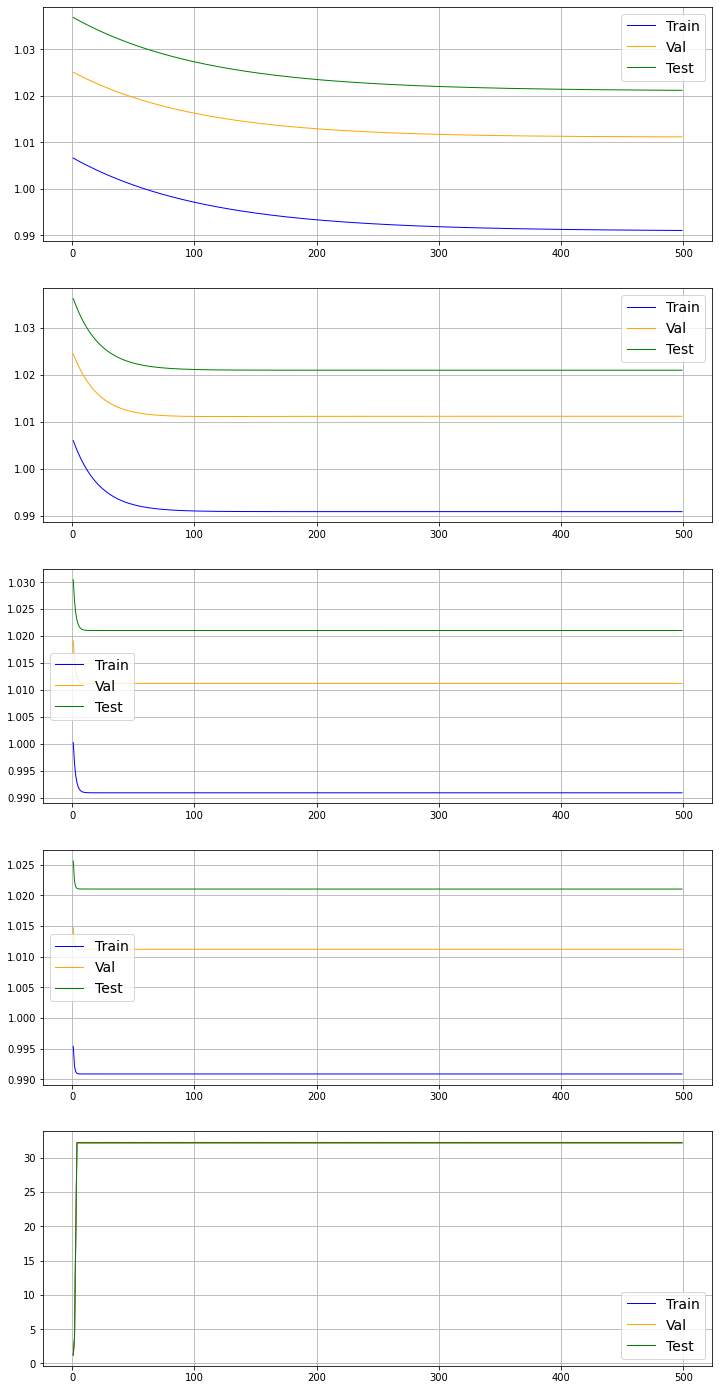

In [40]:
fig8, ax8 = plt.subplots(5, 1)
fig8.set_size_inches((12, 25))

for i in range(5):
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Train']),      label='Train',      linewidth=1, color="blue")
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Validation']), label='Val',        linewidth=1, color="orange")
    ax8[i].plot(errors[l_rates[i]]['Epoch'], np.array(errors[l_rates[i]]['Test']),       label='Test',       linewidth=1, color="green")
    ax8[i].legend(fontsize=14)
    ax8[i].grid()
    train_loss = np.array(errors[l_rates[i]]['Train'])[-1]
    test_loss = np.array(errors[l_rates[i]]['Test'])[-1]
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

plt.savefig(f'./Graphs/GD_lr={l_rates[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_GD_1')

### Другой GD

In [41]:
optimizers = []
steps = [0.5, 0.1, 0.05, 0.01, 0.005][::-1]
for i in range(len(steps)):
    epochs = 1000
    network = join(
        Input(4), 
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(5, weight = XavierNormal(seed = 15)),
        Linear(1, weight = XavierNormal(seed = 15)),
    )
    optimizer = algorithms.GradientDescent(network, batch_size = batch_size, loss = 'mse', regularizer = None,
                                          step = steps[i], show_epoch = epochs//10, verbose = True) 
    optimizer.train(_data_train_x, _data_train_y, _data_validation_x, _data_validation_y, epochs = epochs)
    optimizers.append(optimizer)


Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.005
[OPTION] target = Tensor("placeholder/target/linear-1:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.65 seconds
#1 : [116 ms] train: 1.189148, valid: 1.194386


#100 : [3 ms] train: 0.991124, valid: 1.010514


#200 : [4 ms] train: 0.988135, valid: 1.008338


#300 : [5 ms] train: 0.987998, valid: 1.008285


#400 : [4 ms] train: 0.987900, valid: 1.008196


#500 : [4 ms] train: 0.987798, valid: 1.008094


#600 : [5 ms] train: 0.987694, valid: 1.007989


#700 : [4 ms] train: 0.987586, valid: 1.007879


#800 : [5 ms] train: 0.987474, valid: 1.007766


#900 : [6 ms] train: 0.987358, valid: 1.007649


#1000 : [4 ms] train: 0.987238, valid: 1.007528

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.01
[OPTION] target = Tensor("placeholder/target/linear-2:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.72 seconds
#1 : [132 ms] train: 1.189148, valid: 1.186171


#100 : [4 ms] train: 0.988134, valid: 1.008339


#200 : [4 ms] train: 0.987901, valid: 1.008196


#300 : [4 ms] train: 0.987695, valid: 1.007989


#400 : [4 ms] train: 0.987475, valid: 1.007767


#500 : [4 ms] train: 0.987240, valid: 1.007528


#600 : [4 ms] train: 0.986986, valid: 1.007272


#700 : [4 ms] train: 0.986713, valid: 1.006996


#800 : [4 ms] train: 0.986418, valid: 1.006697


#900 : [4 ms] train: 0.986098, valid: 1.006374


#1000 : [4 ms] train: 0.985751, valid: 1.006023

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.05
[OPTION] target = Tensor("placeholder/target/linear-3:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.81 seconds
#1 : [152 ms] train: 1.189148, valid: 1.127232


#100 : [4 ms] train: 0.987252, valid: 1.007531


#200 : [4 ms] train: 0.985771, valid: 1.006029


#300 : [4 ms] train: 0.983499, valid: 1.003722


#400 : [4 ms] train: 0.979733, valid: 0.999896


#500 : [4 ms] train: 0.972844, valid: 0.992890


#600 : [4 ms] train: 0.958385, valid: 0.978162


#700 : [4 ms] train: 0.921158, valid: 0.940154


#800 : [4 ms] train: 0.793489, valid: 0.809425


#900 : [5 ms] train: 0.372327, valid: 0.380299


#1000 : [4 ms] train: 0.131020, valid: 0.136973

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-4:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.90 seconds
#1 : [173 ms] train: 1.189148, valid: 1.070383


#100 : [4 ms] train: 0.985798, valid: 1.006038


#200 : [4 ms] train: 0.979819, valid: 0.999933


#300 : [4 ms] train: 0.958834, valid: 0.978405


#400 : [4 ms] train: 0.799775, valid: 0.813535


#500 : [4 ms] train: 0.132306, valid: 0.137783


#600 : [4 ms] train: 0.101568, valid: 0.105160


#700 : [6 ms] train: 0.090355, valid: 0.092880


#800 : [4 ms] train: 0.082807, valid: 0.084552


#900 : [4 ms] train: 0.077215, valid: 0.078415


#1000 : [5 ms] train: 0.073214, valid: 0.074059

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 100
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.5
[OPTION] target = Tensor("placeholder/target/linear-5:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 1.25 seconds


#1 : [214 ms] train: 1.189148, valid: 1.261833


#100 : [4 ms] train: 0.368684, valid: 0.332495


#200 : [5 ms] train: 0.111860, valid: 0.114019


#300 : [4 ms] train: 0.093413, valid: 0.094279


#400 : [5 ms] train: 0.083658, valid: 0.081619


#500 : [4 ms] train: 0.079029, valid: 0.077578


#600 : [5 ms] train: 0.079344, valid: 0.078256


#700 : [4 ms] train: 0.078001, valid: 0.077483


#800 : [5 ms] train: 0.070518, valid: 0.070860


#900 : [4 ms] train: 0.067160, valid: 0.067946


#1000 : [4 ms] train: 0.064480, valid: 0.065671


					  alpha = 0.005


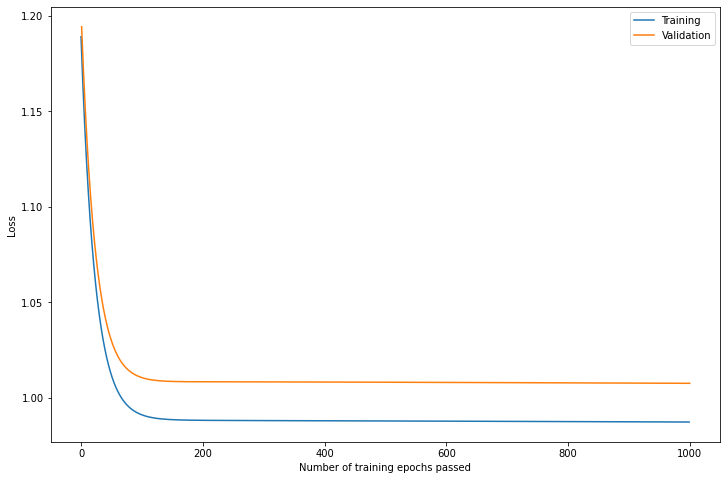

					  alpha = 0.01


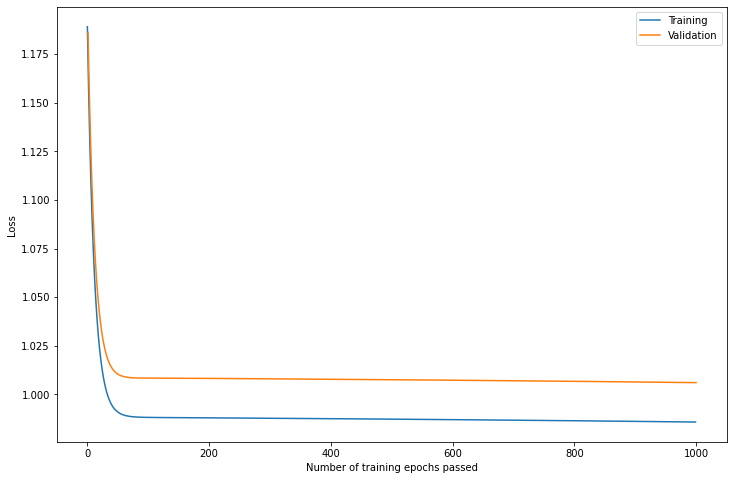

					  alpha = 0.05


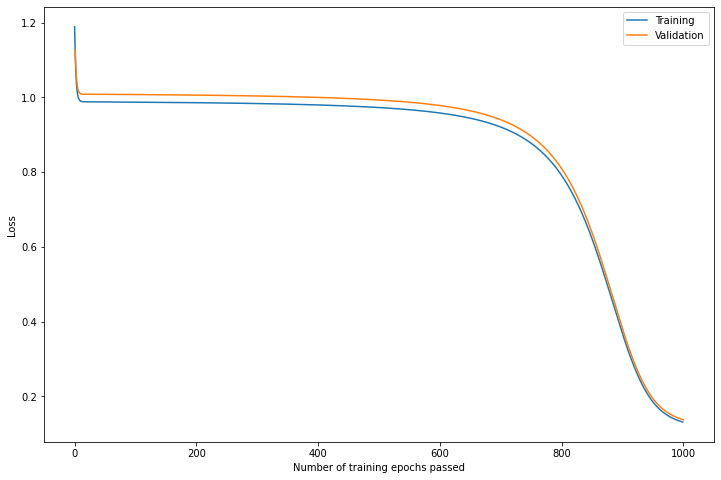

					  alpha = 0.1


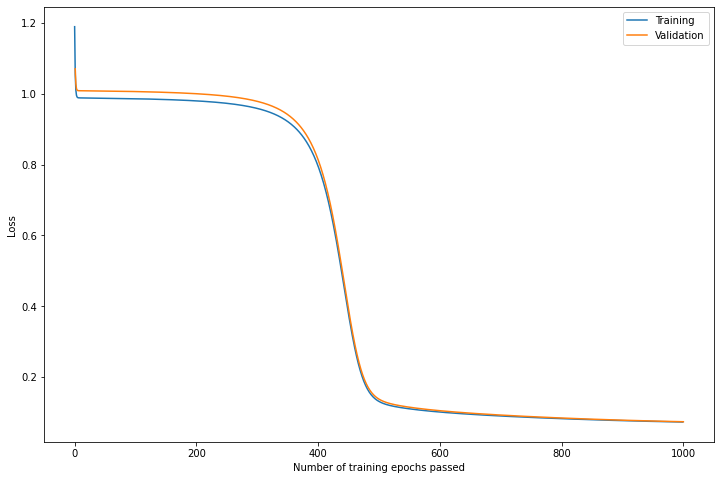

					  alpha = 0.5


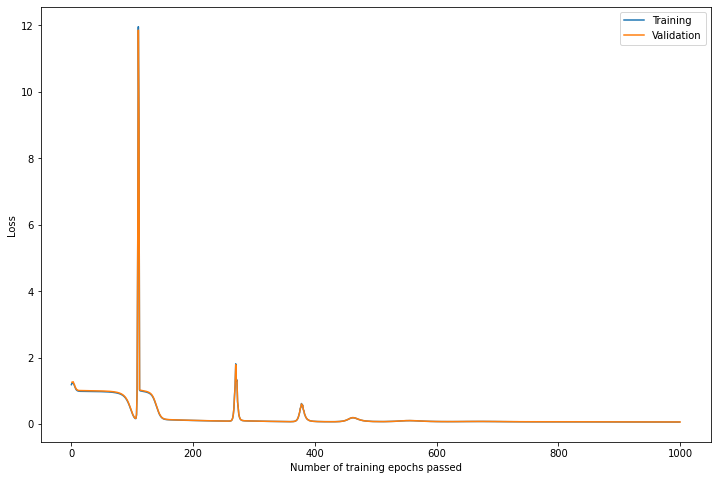

In [42]:
for i in range(len(steps)):
    print('\t' * 5 + '  alpha = ' + str(steps[i]))
    optimizers[i].plot_errors()

In [43]:
for i in range(len(steps)):
    print("Alpha=" + str(steps[i]), ".Train error:", optimizers[i].score(_data_train_x, _data_train_y)
         , ".Test error:", optimizers[i].score(_data_test_x, _data_test_y))

Alpha=0.005 .Train error: 0.9872365593910217 .Test error: 1.0175222158432007
Alpha=0.01 .Train error: 0.9857472777366638 .Test error: 1.0160526037216187
Alpha=0.05 .Train error: 0.13054980337619781 .Test error: 0.14482426643371582
Alpha=0.1 .Train error: 0.07318112254142761 .Test error: 0.08121315389871597
Alpha=0.5 .Train error: 0.06448928266763687 .Test error: 0.07226628065109253


# 4.3 GDM and NAD


### GDM

In [ ]:
momentums = [
    0.0, 
    0.5, 
    0.9, 
    0.975
]

amountOfEpochs = 300
lr = 0.1

errors_GDM = dict()

for momentum in momentums:
    errors_GDM[momentum] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            lr=lr,
            momentum=momentum 
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy()
        ]
    )

    currentEpoch = 1

    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        errors_GDM[momentum]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_GDM[momentum]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_GDM[momentum]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_GDM[momentum]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 25us/sample - loss: 0.6682 - binary_accuracy: 0.7600 - val_loss: 0.6119 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.6116 - binary_accuracy: 0.7600 - val_loss: 0.5839 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.5834 - binary_accuracy: 0.7600 - val_loss: 0.5695 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.5689 - binary_accuracy: 0.7600 - val_loss: 0.5618 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.5611 - binary_accuracy: 0.7600 - val_loss: 0.5576 - val_binary_accuracy: 0.7591

Train loss: 	0.5509285926818848
Test loss: 	0.5570262670516968

Train loss: 	0.5505896806716919
Test loss: 	0.556697428226471

Train loss: 	0.3569098114967346
Test loss: 	0.3622284531593323

Train loss: 	0.3463847041130066
Test loss: 	0.34866759181022644


Consider using a TensorFlow optimizer from `tf.train`.


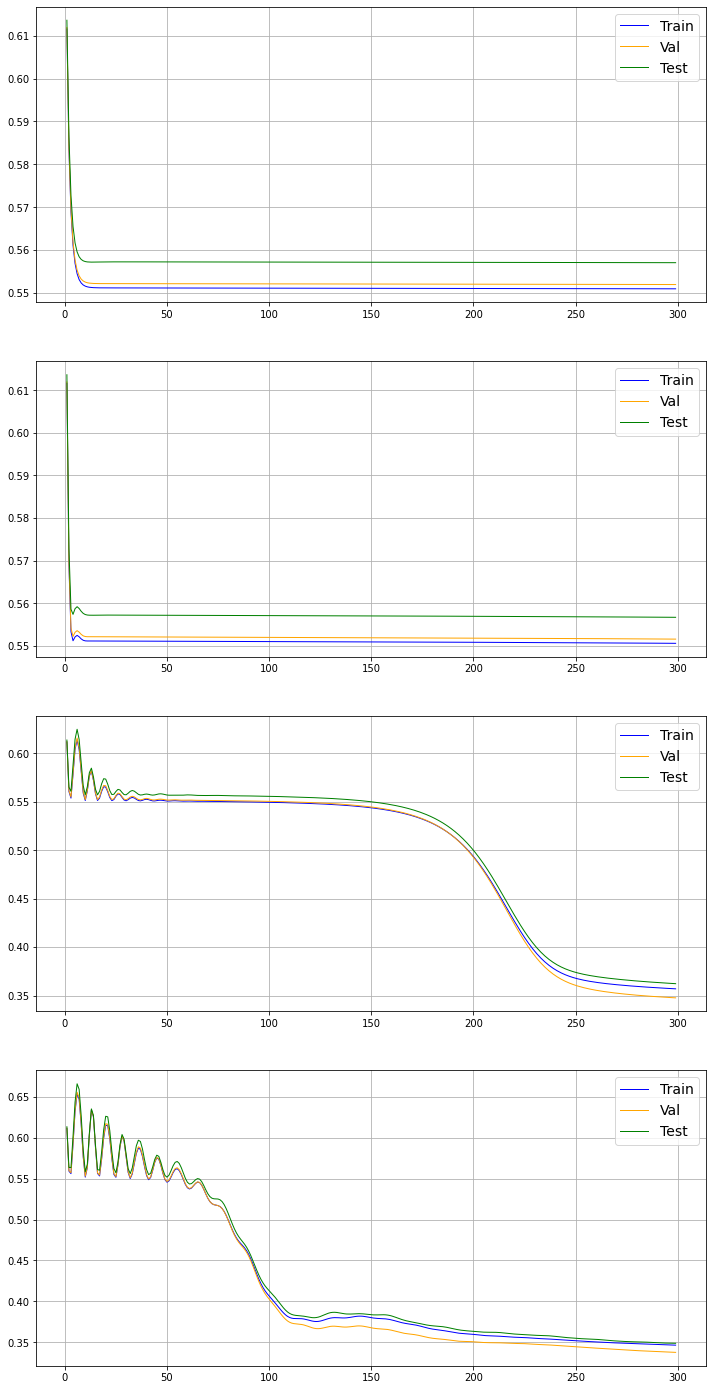

In [ ]:
fig9, ax9 = plt.subplots(len(momentums), 1)
fig9.set_size_inches((12, 25))

for i in range(len(momentums)):
    ax9[i].plot(errors_GDM[momentums[i]]['Epoch'], np.array(errors_GDM[momentums[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
    ax9[i].plot(errors_GDM[momentums[i]]['Epoch'], np.array(errors_GDM[momentums[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
    ax9[i].plot(errors_GDM[momentums[i]]['Epoch'], np.array(errors_GDM[momentums[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
    ax9[i].legend(fontsize=14)
    ax9[i].grid()
    train_loss = np.array(errors_GDM[momentums[i]]['Train'])[-1, 0]
    test_loss = np.array(errors_GDM[momentums[i]]['Test'])[-1, 0]
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

plt.savefig(f'./Graphs/GDM_lr={lr}_momentrum={momentums[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_GDM_1')

### Другой GDM

In [45]:
optimizers_GDM = []
momentums = [0., 0.5, 0.9, 0.975]
for i in range(len(momentums)):
    epochs = 500
    network = join(
        Input(4), 
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(5, weight = XavierNormal(seed = 15)),
        Linear(1, weight = XavierNormal(seed = 15)),
    )
    optimizer = algorithms.Momentum(network, batch_size = batch_size, 
                                    loss = 'mse', regularizer = None,
                                    momentum = momentums[i], nesterov = False,
                                    show_epoch = epochs//10, verbose = True) 
    optimizer.train(x_train, y_train, x_val, y_val, epochs = epochs)
    optimizers_GDM.append(optimizer)


Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] momentum = 0.0
[OPTION] nesterov = False
[OPTION] regularizer = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-10:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 2.69 seconds


#1 : [540 ms] train: 1.189148, valid: 1.070383


#50 : [8 ms] train: 0.987269, valid: 1.007536


#100 : [4 ms] train: 0.985798, valid: 1.006038


#150 : [4 ms] train: 0.983545, valid: 1.003740


#200 : [5 ms] train: 0.979819, valid: 0.999933


#250 : [4 ms] train: 0.973024, valid: 0.992977


#300 : [4 ms] train: 0.958834, valid: 0.978405


#350 : [4 ms] train: 0.922599, valid: 0.941015


#400 : [5 ms] train: 0.799775, valid: 0.813535


#450 : [6 ms] train: 0.387328, valid: 0.390250


#500 : [4 ms] train: 0.132306, valid: 0.137783

Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] momentum = 0.5
[OPTION] nesterov = False
[OPTION] regularizer = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-11:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 3.25 seconds


#1 : [664 ms] train: 1.189148, valid: 1.070383


#50 : [10 ms] train: 0.985977, valid: 1.006186


#100 : [4 ms] train: 0.980414, valid: 1.000452


#150 : [4 ms] train: 0.961981, valid: 0.981279


#200 : [4 ms] train: 0.841651, valid: 0.853759


#250 : [4 ms] train: 0.148088, valid: 0.151431


#300 : [4 ms] train: 0.103673, valid: 0.107230


#350 : [4 ms] train: 0.091706, valid: 0.094235


#400 : [4 ms] train: 0.083855, valid: 0.085603


#450 : [4 ms] train: 0.078011, valid: 0.079207


#500 : [4 ms] train: 0.073774, valid: 0.074610

Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] momentum = 0.9
[OPTION] nesterov = False
[OPTION] regularizer = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-12:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 3.83 seconds


#1 : [797 ms] train: 1.189148, valid: 1.070383


#50 : [4 ms] train: 0.964381, valid: 0.981122


#100 : [4 ms] train: 0.129828, valid: 0.133922


#150 : [4 ms] train: 0.076809, valid: 0.076979


#200 : [4 ms] train: 0.068081, valid: 0.068324


#250 : [4 ms] train: 0.066135, valid: 0.066717


#300 : [5 ms] train: 0.064876, valid: 0.065683


#350 : [4 ms] train: 0.063933, valid: 0.064936


#400 : [4 ms] train: 0.063144, valid: 0.064330


#450 : [5 ms] train: 0.062449, valid: 0.063818


#500 : [5 ms] train: 0.061843, valid: 0.063391

Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] momentum = 0.975
[OPTION] nesterov = False
[OPTION] regularizer = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-13:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 4.87 seconds


#1 : [950 ms] train: 1.189148, valid: 1.070383


#50 : [13 ms] train: 0.976140, valid: 1.014951


#100 : [4 ms] train: 0.219832, valid: 0.270174


#150 : [4 ms] train: 0.102615, valid: 0.106722


#200 : [4 ms] train: 0.066968, valid: 0.068991


#250 : [3 ms] train: 0.062591, valid: 0.064721


#300 : [4 ms] train: 0.060068, valid: 0.062460


#350 : [4 ms] train: 0.058891, valid: 0.061244


#400 : [4 ms] train: 0.058712, valid: 0.061155


#450 : [4 ms] train: 0.058595, valid: 0.061092
#500 : [4 ms] train: 0.058486, valid: 0.060966


					  momentum = 0.0


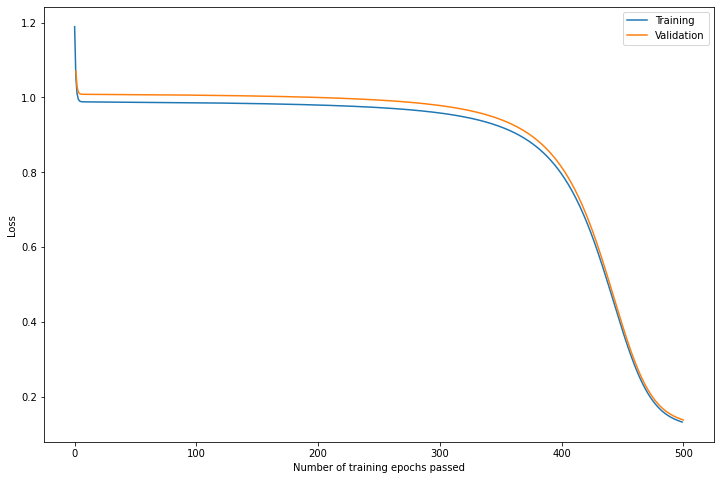

					  momentum = 0.5


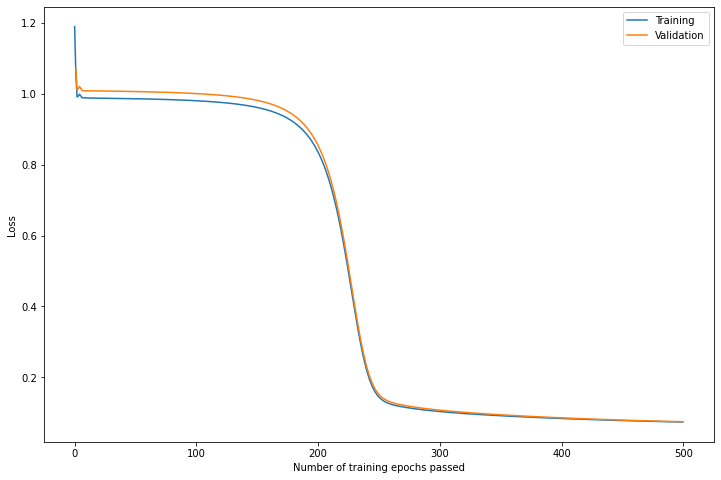

					  momentum = 0.9


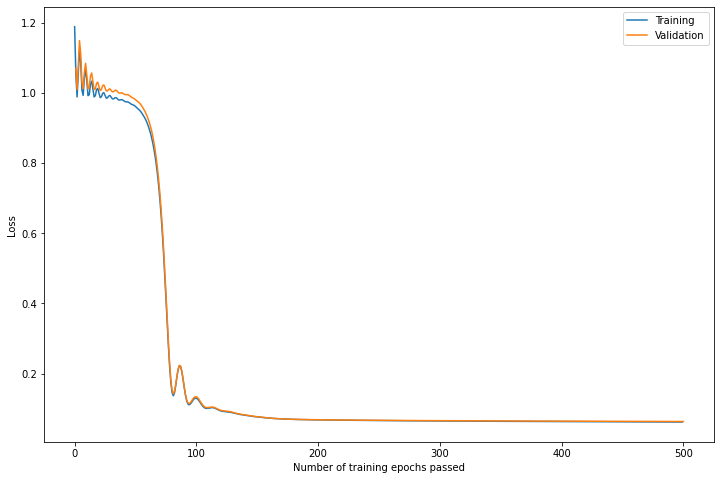

					  momentum = 0.975


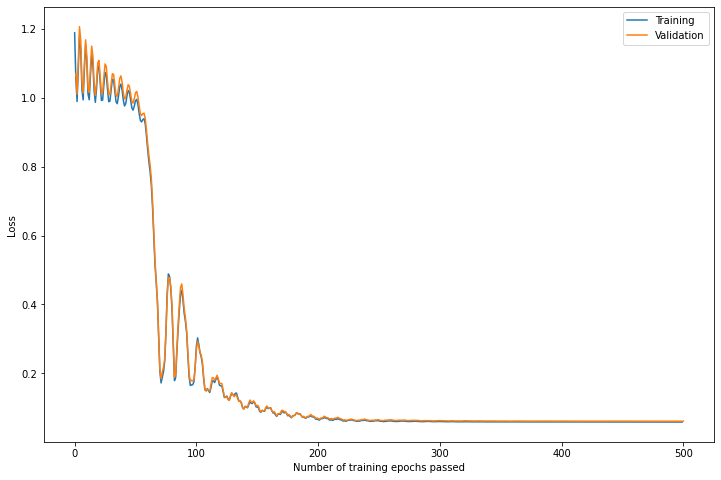

In [46]:
for i in range(len(momentums)):
    print('\t' * 5 + '  momentum = ' + str(momentums[i]))
    optimizers_GDM[i].plot_errors()

In [47]:
for i in range(len(momentums)):
    print("Momentum=" + str(momentums[i]), ".Train error:", optimizers_GDM[i].score(x_train, y_train)
         , ".Test error:", optimizers_GDM[i].score(x_test, y_test))

Momentum=0.0 .Train error: 0.13130776584148407 .Test error: 0.14565840363502502
Momentum=0.5 .Train error: 0.07370463758707047 .Test error: 0.08180893957614899
Momentum=0.9 .Train error: 0.06183207035064697 .Test error: 0.0684586614370346
Momentum=0.975 .Train error: 0.05848310887813568 .Test error: 0.06654669344425201


### NAD

In [ ]:
momentums = [
    0.0, 
    0.5, 
    0.9, 
    0.975
]

amountOfEpochs = 300
lr = 0.1

errors_NAG = dict()

for momentum in momentums:
    errors_NAG[momentum] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            lr=lr,
            momentum=momentum,
            nesterov=True
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy()
        ]
    )

    currentEpoch = 1
    
    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        errors_NAG[momentum]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_NAG[momentum]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_NAG[momentum]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_NAG[momentum]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 1s 27us/sample - loss: 0.6682 - binary_accuracy: 0.7600 - val_loss: 0.6119 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.6116 - binary_accuracy: 0.7600 - val_loss: 0.5839 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.5834 - binary_accuracy: 0.7600 - val_loss: 0.5695 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.5689 - binary_accuracy: 0.7600 - val_loss: 0.5618 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.5611 - binary_accuracy: 0.7600 - val_loss: 0.5576 - val_binary_accuracy: 0.7591

Train loss: 	0.550929
Test loss: 	0.557026

Train loss: 	0.550589
Test loss: 	0.556697

Train loss: 	0.356196
Test loss: 	0.361621

Train loss: 	0.34304
Test loss: 	0.345862


Consider using a TensorFlow optimizer from `tf.train`.


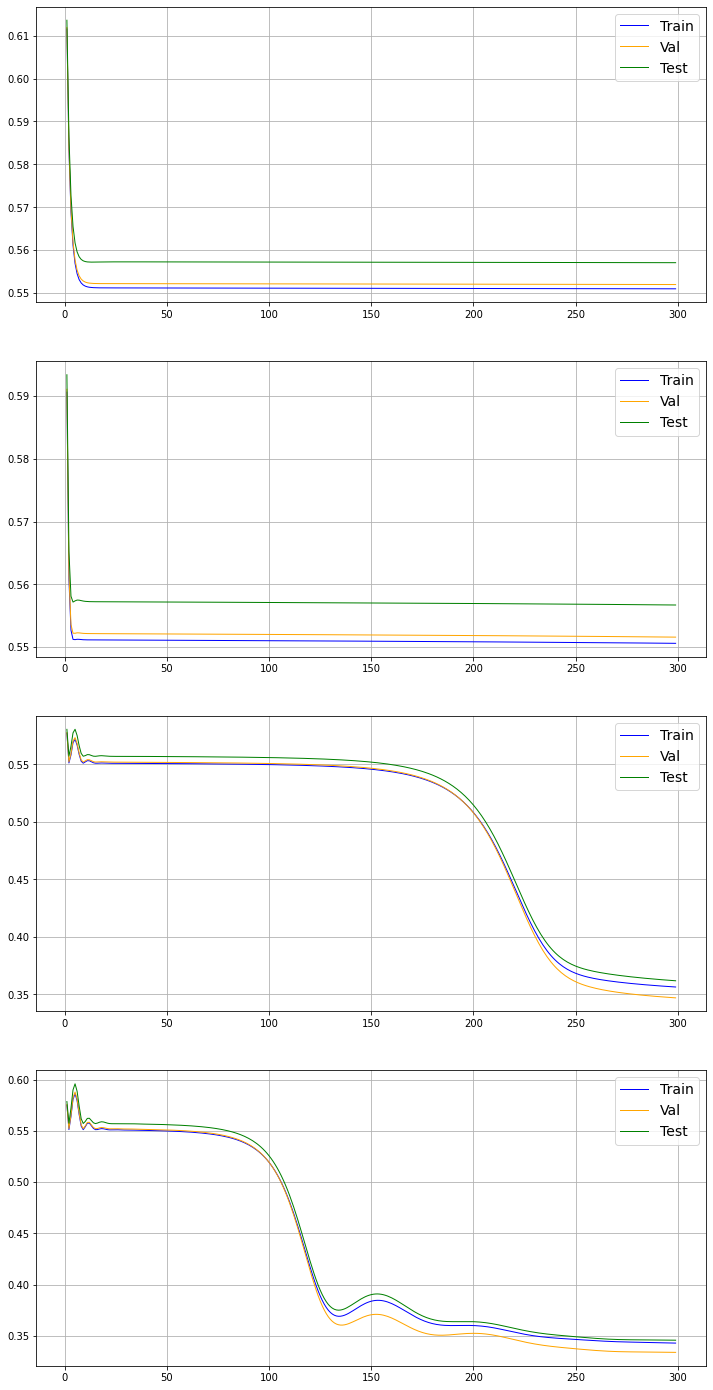

In [ ]:
fig10, ax10 = plt.subplots(len(momentums), 1)
fig10.set_size_inches((12, 25))

for i in range(len(momentums)):
    ax10[i].plot(errors_NAG[momentums[i]]['Epoch'], np.array(errors_NAG[momentums[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
    ax10[i].plot(errors_NAG[momentums[i]]['Epoch'], np.array(errors_NAG[momentums[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
    ax10[i].plot(errors_NAG[momentums[i]]['Epoch'], np.array(errors_NAG[momentums[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
    ax10[i].legend(fontsize=14)
    ax10[i].grid()
    
    train_loss = np.array(errors_NAG[momentums[i]]['Train'])[-1, 0]
    test_loss = np.array(errors_NAG[momentums[i]]['Test'])[-1, 0]
    
    print(f'Train loss: \t{round(train_loss, 6)}')
    print(f'Test loss: \t{round(test_loss, 6)}\n')

plt.savefig(f'./Graphs/NAG_lr={lr}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_NAG_1')

### Другой NAD

In [48]:
optimizers_NAD = []
momentums = [0., 0.5, 0.9, 0.975]
for i in range(len(momentums)):
    epochs = 500
    network = join(
        Input(4), 
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(5, weight = XavierNormal(seed = 15)),
        Linear(1, weight = XavierNormal(seed = 15)),
    )
    optimizer = algorithms.Momentum(network, batch_size = batch_size, 
                                    loss = 'mse', regularizer = None,
                                    momentum = momentums[i], nesterov = True,
                                    show_epoch = epochs//10, verbose = True) 
    optimizer.train(x_train, y_train, x_val, y_val, epochs = epochs)
    optimizers_NAD.append(optimizer)


Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] momentum = 0.0
[OPTION] nesterov = True
[OPTION] regularizer = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-14:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 5.46 seconds


#1 : [1 sec] train: 1.189148, valid: 1.070383


#50 : [4 ms] train: 0.987269, valid: 1.007536


#100 : [4 ms] train: 0.985798, valid: 1.006038


#150 : [4 ms] train: 0.983545, valid: 1.003740


#200 : [4 ms] train: 0.979819, valid: 0.999933


#250 : [5 ms] train: 0.973024, valid: 0.992977


#300 : [4 ms] train: 0.958834, valid: 0.978405


#350 : [4 ms] train: 0.922599, valid: 0.941015


#400 : [4 ms] train: 0.799775, valid: 0.813535


#450 : [5 ms] train: 0.387328, valid: 0.390250


#500 : [4 ms] train: 0.132306, valid: 0.137783

Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] momentum = 0.5
[OPTION] nesterov = True
[OPTION] regularizer = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-15:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 6.65 seconds


#1 : [1 sec] train: 1.189148, valid: 1.032014


#50 : [4 ms] train: 0.985912, valid: 1.006119


#100 : [4 ms] train: 0.980197, valid: 1.000227


#150 : [4 ms] train: 0.960853, valid: 0.980094


#200 : [4 ms] train: 0.827385, valid: 0.838436


#250 : [4 ms] train: 0.140591, valid: 0.144554


#300 : [5 ms] train: 0.102836, valid: 0.106345


#350 : [5 ms] train: 0.091174, valid: 0.093664


#400 : [4 ms] train: 0.083441, valid: 0.085161


#450 : [4 ms] train: 0.077695, valid: 0.078873


#500 : [4 ms] train: 0.073551, valid: 0.074376

Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] momentum = 0.9
[OPTION] nesterov = True
[OPTION] regularizer = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-16:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 8.21 seconds


#1 : [1 sec] train: 1.189148, valid: 1.014473


#50 : [4 ms] train: 0.948000, valid: 0.963323


#100 : [4 ms] train: 0.099688, valid: 0.100744


#150 : [5 ms] train: 0.072702, valid: 0.072782


#200 : [4 ms] train: 0.067093, valid: 0.067450


#250 : [4 ms] train: 0.065470, valid: 0.066131


#300 : [4 ms] train: 0.064326, valid: 0.065207


#350 : [4 ms] train: 0.063409, valid: 0.064492


#400 : [4 ms] train: 0.062613, valid: 0.063897


#450 : [4 ms] train: 0.061914, valid: 0.063403


#500 : [4 ms] train: 0.171315, valid: 0.214076

Main information

[ALGORITHM] Momentum

[OPTION] batch_size = 9568
[OPTION] loss = mse
[OPTION] momentum = 0.975
[OPTION] nesterov = True
[OPTION] regularizer = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-17:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 9.54 seconds


#1 : [2 sec] train: 1.189148, valid: 1.012475


#50 : [7 ms] train: 0.502061, valid: 0.419278


#100 : [4 ms] train: 0.137394, valid: 0.140899


#150 : [3 ms] train: 0.074940, valid: 0.074508


#200 : [4 ms] train: 0.062216, valid: 0.064352


#250 : [4 ms] train: 0.059624, valid: 0.062525


#300 : [6 ms] train: 0.059312, valid: 0.061751


#350 : [4 ms] train: 0.059110, valid: 0.061648


#400 : [5 ms] train: 0.059015, valid: 0.061479


#450 : [3 ms] train: 0.058954, valid: 0.061410
#500 : [4 ms] train: 0.058892, valid: 0.061364


					  momentum = 0.0


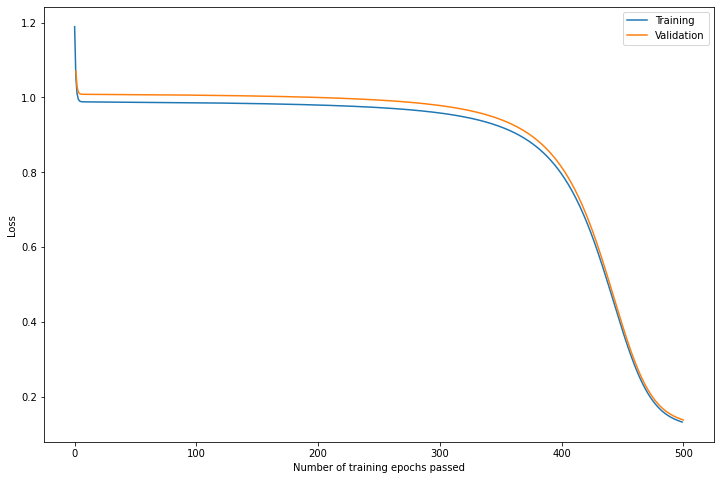

					  momentum = 0.5


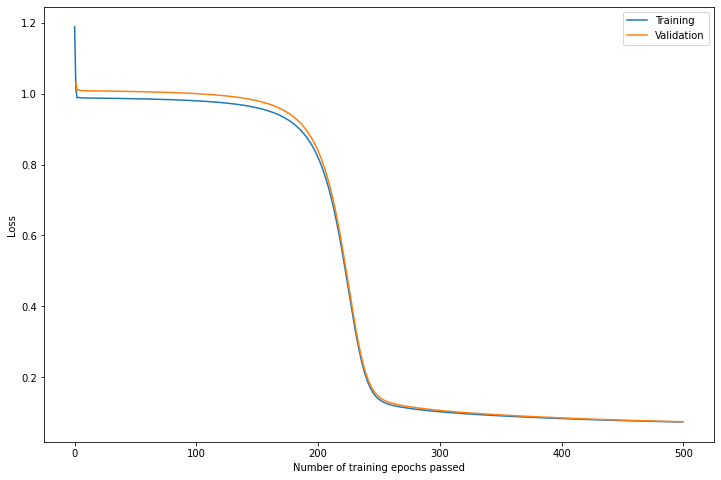

					  momentum = 0.9


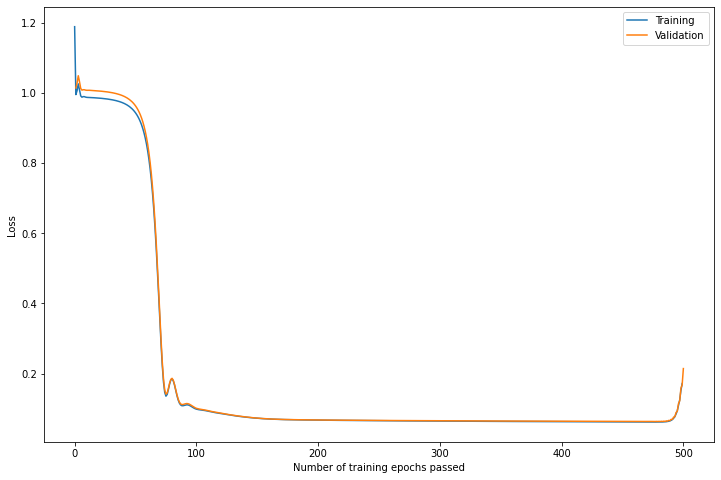

					  momentum = 0.975


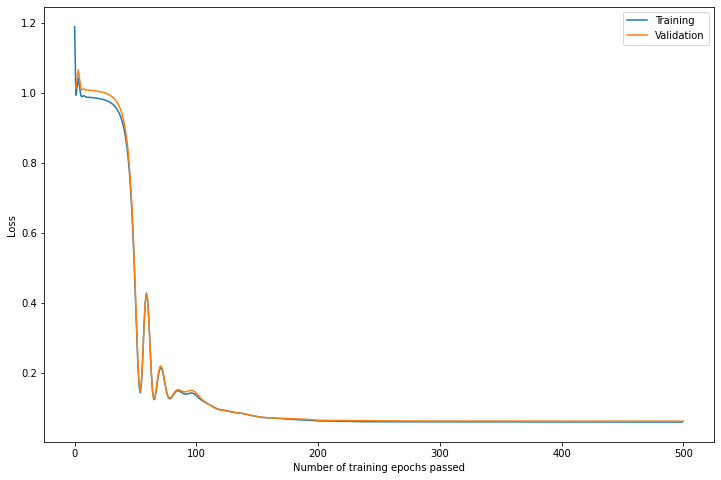

In [49]:
for i in range(len(momentums)):
    print('\t' * 5 + '  momentum = ' + str(momentums[i]))
    optimizers_NAD[i].plot_errors()

In [50]:
for i in range(len(momentums)):
    print("Momentum=" + str(momentums[i]), ".Train error:", optimizers_NAD[i].score(x_train, y_train)
         , ".Test error:", optimizers_NAD[i].score(x_test, y_test))

Momentum=0.0 .Train error: 0.13130776584148407 .Test error: 0.14565840363502502
Momentum=0.5 .Train error: 0.07348277419805527 .Test error: 0.08155661821365356
Momentum=0.9 .Train error: 0.20628489553928375 .Test error: 0.21232722699642181
Momentum=0.975 .Train error: 0.05889078602194786 .Test error: 0.06669753044843674


# 4.4 Метод наискорейшего спуска и сопряжённых градиентов

### Метод Флетчера-Ривса

In [51]:
epochs = 100
network = join(
    Input(4), 
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(5, weight = XavierNormal(seed = 15)),
    Linear(1, weight = XavierNormal(seed = 15)),
)
optimizer_FR = algorithms.ConjugateGradient(network,
                                update_function = 'fletcher_reeves',
                                loss = 'mse', 
                                regularizer = None,
                                show_epoch = epochs//10) 
optimizer_FR.train(_data_train_x, _data_train_y, _data_validation_x, _data_validation_y, epochs = epochs)

					Метод Флетчера-Ривса


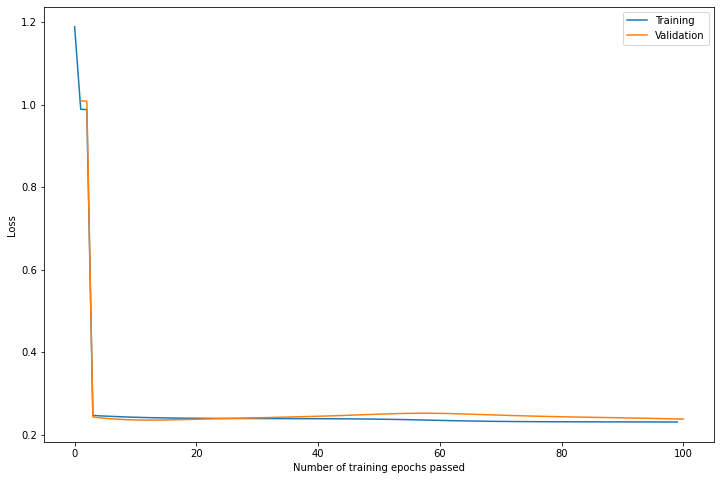

In [52]:
print('\t' * 5 + 'Метод Флетчера-Ривса')
optimizer_FR.plot_errors()

In [53]:
print("Train error:", round(optimizer_FR.score(_data_train_x, _data_train_y), 5), "Test error:", round(optimizer_FR.score(_data_test_x, _data_test_y), 5))

Train error: 0.23068 Test error: 0.24728


### Метод Полака_Райбера

In [54]:
epochs = 100
network = join(
    Input(4), 
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(5, weight = XavierNormal(seed = 15)),
    Linear(1, weight = XavierNormal(seed = 15)),
)
optimizer_PR = algorithms.ConjugateGradient(network,
                                update_function = 'polak_ribiere',
                                loss = 'mse', 
                                regularizer = None,
                                show_epoch = epochs//10,
                                verbose = True) 
optimizer_PR.train(_data_train_x, _data_train_y, _data_validation_x, _data_validation_y, epochs = epochs)


Main information

[ALGORITHM] ConjugateGradient

[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 10
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/linear-19:0", shape=(?, 1), dtype=float32)
[OPTION] update_function = polak_ribiere
[OPTION] verbose = True
[OPTION] wolfe_c1 = 0.0001
[OPTION] wolfe_c2 = 0.9
[OPTION] wolfe_maxiter = 20

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 15.05 seconds


#1 : [3 sec] train: 1.189148, valid: 1.009530


#10 : [33 ms] train: 0.179134, valid: 0.180621


#20 : [42 ms] train: 0.123759, valid: 0.125774


#30 : [32 ms] train: 0.089383, valid: 0.089311


#40 : [12 ms] train: 0.077532, valid: 0.076417


#50 : [31 ms] train: 0.071330, valid: 0.070873


#60 : [11 ms] train: 0.067110, valid: 0.067937


#70 : [35 ms] train: 0.066446, valid: 0.066235


#80 : [38 ms] train: 0.063922, valid: 0.064763


#90 : [44 ms] train: 0.063570, valid: 0.064455
#100 : [31 ms] train: 0.063238, valid: 0.064601


					Метод Полака-Райбера


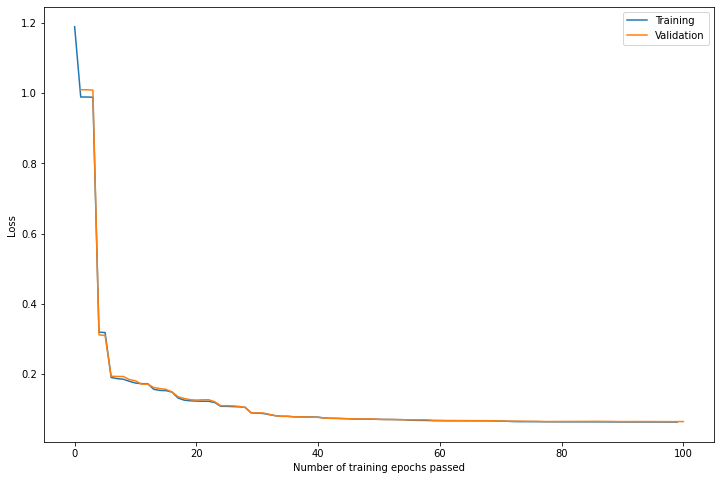

In [55]:
print('\t' * 5 + 'Метод Полака-Райбера')
optimizer_PR.plot_errors()

In [56]:
print("Train error:", optimizer_PR.score(_data_train_x, _data_train_y), "Test error:", optimizer_PR.score(_data_test_x, _data_test_y))

Train error: 0.0631499 Test error: 0.070082895


# 4.5 AdaGrad

### AdaGrad

In [ ]:
amountOfEpochs = 500
lr = 0.1

errors_AdaGrad = dict()

errors_AdaGrad = {
    'Train':[], 
    'Validation':[], 
    'Test': [], 
    'Epoch':[]
}

model.load_weights('./weights/weight_1')
model.compile(
    optimizer=tf.keras.optimizers.Adagrad(
        lr=lr
    ),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy()
    ]
)

currentEpoch = 1
weightsHistory = []
    
while currentEpoch < amountOfEpochs:

    historyOfModel = model.fit(
        x              =_data_train_x, 
        y              =_data_train_y, 
        epochs         =1, 
        validation_data=(_data_validation_x, _data_validation_y),
        batch_size=batch_size
    )

    weightsHistory.append(model.get_weights())

    errors_AdaGrad['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
    errors_AdaGrad['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
    errors_AdaGrad['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
    errors_AdaGrad['Epoch'     ].append(currentEpoch)
    
    currentEpoch += 1

Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 1s 37us/sample - loss: 0.6682 - binary_accuracy: 0.7600 - val_loss: 0.7300 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.7276 - binary_accuracy: 0.7600 - val_loss: 0.5612 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.5604 - binary_accuracy: 0.7600 - val_loss: 0.5478 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.5468 - binary_accuracy: 0.7600 - val_loss: 0.5428 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.5419 - binary_accuracy: 0.7600 - val_loss: 0.5360 - val_binary_accuracy: 0.7591

Train loss: 	0.3138226568698883
Test loss: 	0.3259877860546112


Consider using a TensorFlow optimizer from `tf.train`.


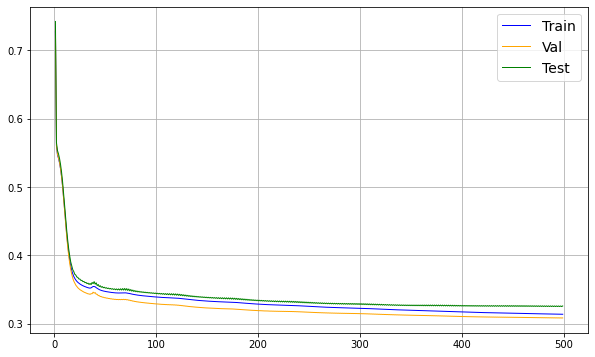

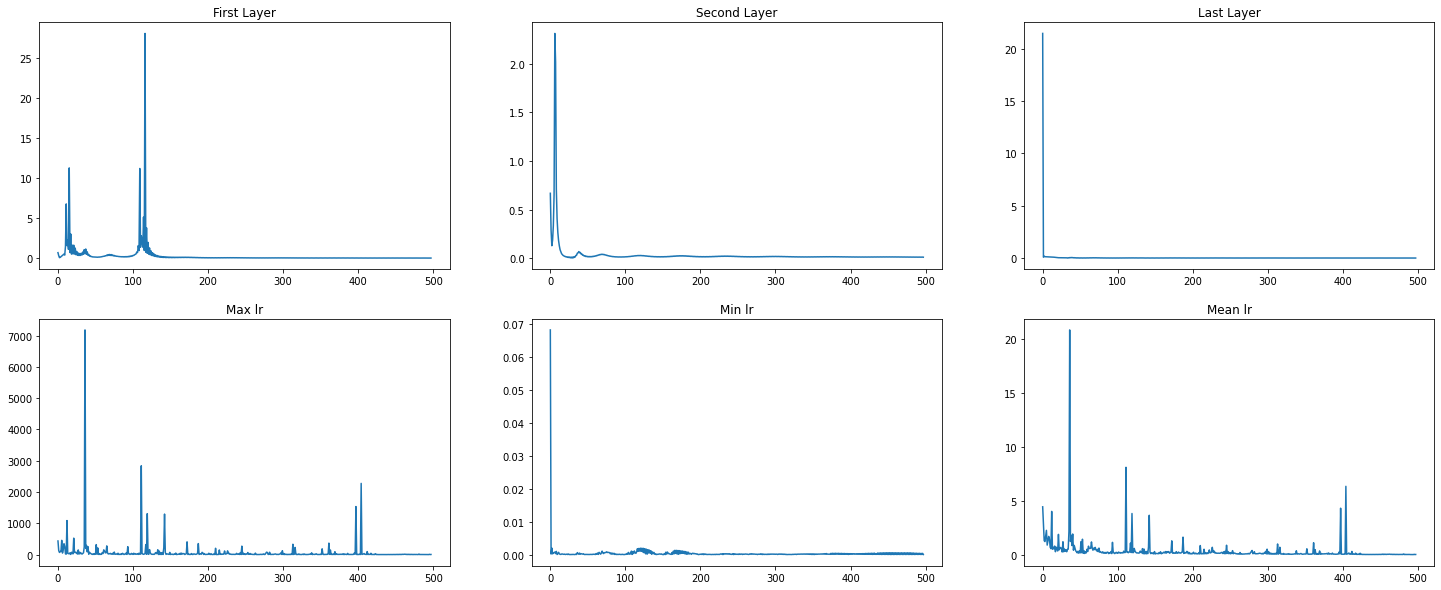

In [ ]:
weightsChanges = []

for i in range(amountOfEpochs - 2):
    weightsChanges.append([])
    for j in range(len(weightsHistory[i + 1])):
        weightsChanges[-1].append(abs((weightsHistory[i + 1][j] - weightsHistory[i][j])/weightsHistory[i][j]))

speed1 = []
speed2 = []
speed3 = []

max_speed = []
min_speed = []
mean_speed = []

for wc in weightsChanges:
    speed1.append(wc[0][3][1])
    speed2.append(wc[2][1][2])
    speed3.append(wc[4][4][0])

    max_ = wc[0][0][0]
    min_ = wc[0][0][0]
    sum_ = 0

    for j in wc:
        h = np.asarray(j)

        if max_ < h.max():
            max_ = h.max()
        if min_ > h.min():
            min_ = h.min()

        sum_ += h.sum()

    max_speed.append(max_)
    min_speed.append(min_)
    # 362 - number of parameters of NN
    mean_speed.append(sum_/362)


fig11, ax11 = plt.subplots()
fig11.set_size_inches((10, 6))

ax11.plot(errors_AdaGrad['Epoch'], np.array(errors_AdaGrad['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
ax11.plot(errors_AdaGrad['Epoch'], np.array(errors_AdaGrad['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
ax11.plot(errors_AdaGrad['Epoch'], np.array(errors_AdaGrad['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
ax11.legend(fontsize=14)
ax11.grid()

train_loss = np.array(errors_AdaGrad['Train'])[-1, 0]
test_loss = np.array(errors_AdaGrad['Test'])[-1, 0]

print(f'Train loss: \t{train_loss}')
print(f'Test loss: \t{test_loss}\n')
plt.savefig(f'./Graphs/AdaGrad_lr={lr}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_AdaGrad_1')
plt.show()

fig12, ax12 = plt.subplots(2, 3)
fig12.set_size_inches((25, 10))

ax12[0][0].plot(speed1);
ax12[0][0].title.set_text('First Layer')

ax12[0][1].plot(speed2);
ax12[0][1].title.set_text('Second Layer')

ax12[0][2].plot(speed3);
ax12[0][2].title.set_text('Last Layer')

ax12[1][0].plot(max_speed);
ax12[1][0].title.set_text('Max lr')

ax12[1][1].plot(min_speed);
ax12[1][1].title.set_text('Min lr')

ax12[1][2].plot(mean_speed);
ax12[1][2].title.set_text('Mean lr')

plt.savefig('./Graphs/AdaGrad_learning_rate_1.png', dpi=300)
plt.show()

### Другой AdaGrad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


Loss на обучающей выборке AdaGrad 0.0013654241374518635
Loss на тестовой выборке AdaGrad 0.001297585114550132


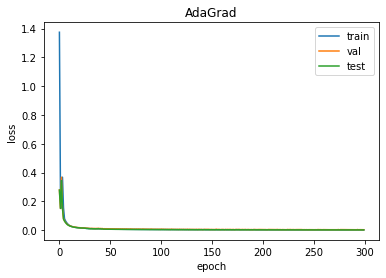

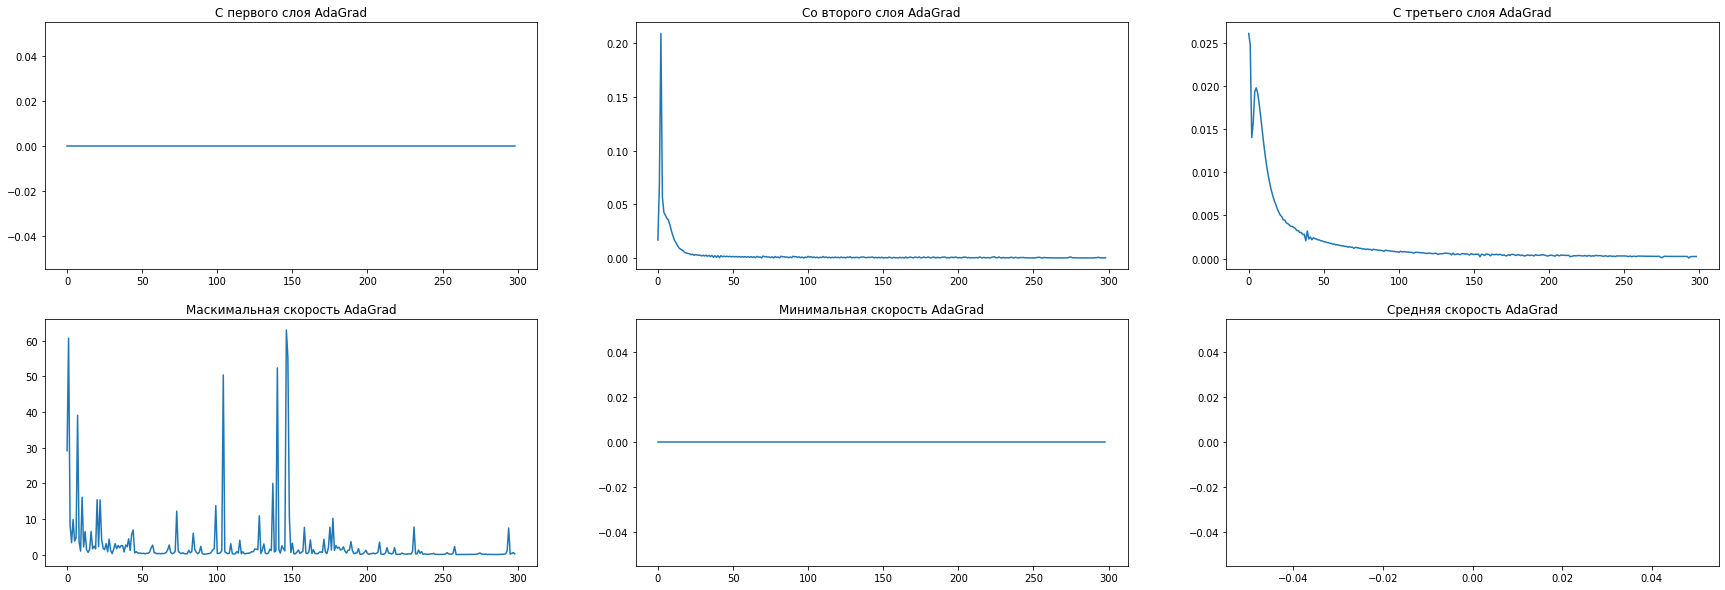

In [ ]:
m_name = 'AdaGrad'
for p in range(1):
    str_ = ''
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(8,)),
            layers.Dense(firstLayerAmountOfNeurons, activation=firstLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=5)),
            layers.Dense(secondLayerAmountOfNeurons, activation=secondLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=5)),
            layers.Dense(thirdLayerAmountOfNeurons, activation=thirdLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=5)),
            layers.Dense(2, activation="softmax", kernel_initializer=tf.keras.initializers.glorot_normal(seed=5)),
        ]
    )
    epochs = 300
    weights_history = []
    loss = []
    val_loss = []
    test_loss = []
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adagrad(lr = 0.1), metrics=['accuracy'])
    for i in range(epochs):
        fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_data=(x_val, y_val), verbose = 0)
        weights_history.append(model.get_weights())
        loss.append(fit.history['loss'][0])
        val_loss.append(fit.history['val_loss'][0])
        test_loss.append(model.evaluate(x_test, y_test, verbose = 0)[0])
    plt.plot(loss);
    plt.plot(val_loss);
    plt.plot(test_loss)
    plt.title(m_name + str_)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val', 'test'], loc='upper right')
    weights_changes = []
    for i in range(epochs - 1):
        weights_changes.append([])
        for j in range(len(weights_history[0])):
            weights_changes[-1].append(abs((weights_history[i + 1][j] - weights_history[i][j])/weights_history[i][j]))
            weight1 = []
    weight2 = []
    weight3 = []
    max_w = []
    min_w = []
    mean_w = []
    for i in weights_changes:
        weight1.append(i[0][5][6])
        weight2.append(i[2][8][3])
        weight3.append(i[4][8][0])
        max_ = i[0][0][0]
        min_ = i[0][0][0]
        sum_ = 0
        for j in i:
            h = np.asarray(j)
            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()
            sum_ += h.sum()
        max_w.append(max_)
        min_w.append(min_)
        mean_w.append(sum_/362)
    fig, ax =  plt.subplots(2, 3, figsize=(30, 10))
    ax[0, 0].plot(weight1);
    ax[0, 0].title.set_text('С первого слоя ' + m_name + str_)
    ax[0, 1].plot(weight2);
    ax[0, 1].title.set_text('Со второго слоя ' + m_name + str_)
    ax[0, 2].plot(weight3);
    ax[0, 2].title.set_text('С третьего слоя ' + m_name + str_)
    ax[1, 0].plot(max_w);
    ax[1, 0].title.set_text('Маскимальная скорость ' + m_name + str_)
    ax[1, 1].plot(min_w);
    ax[1, 1].title.set_text('Минимальная скорость ' + m_name + str_)
    ax[1, 2].plot(mean_w);
    ax[1, 2].title.set_text('Средняя скорость ' + m_name + str_)
    print('Loss на обучающей выборке ' + m_name + str_, model.evaluate(x_train, y_train, verbose=0)[0])
    print('Loss на тестовой выборке ' + m_name + str_, model.evaluate(x_test, y_test, verbose = 0)[0])
    model_Adagrad = model
plt.show()

### Adagrad тут

In [57]:
epochs = 300
network = join(
    Input(4), 
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(5, weight = XavierNormal(seed = 15)),
    Linear(1, weight = XavierNormal(seed = 15)),
)
optimizer_PR = algorithms.Adagrad(network,
                                loss = 'mse', 
                                regularizer = None,
                                show_epoch = epochs//10,
                                verbose = True) 
optimizer_PR.train(_data_train_x, _data_train_y, _data_validation_x, _data_validation_y, epochs = epochs)


Main information

[ALGORITHM] Adagrad

[OPTION] batch_size = 128
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 30
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-20:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 16.62 seconds


#1 : [3 sec] train: 0.907606, valid: 1.008431


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#30 : [55 ms] train: 0.064111, valid: 0.066897


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [49 ms] train: 0.063252, valid: 0.063901


#90 : [50 ms] train: 0.063795, valid: 0.063050


#120 : [55 ms] train: 0.064281, valid: 0.062747


#150 : [47 ms] train: 0.064614, valid: 0.062581


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [45 ms] train: 0.064846, valid: 0.062453


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#210 : [47 ms] train: 0.065016, valid: 0.062343


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#240 : [56 ms] train: 0.065146, valid: 0.062243


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#270 : [49 ms] train: 0.065246, valid: 0.062152


#300 : [54 ms] train: 0.065324, valid: 0.062067


					Метод Adagrad


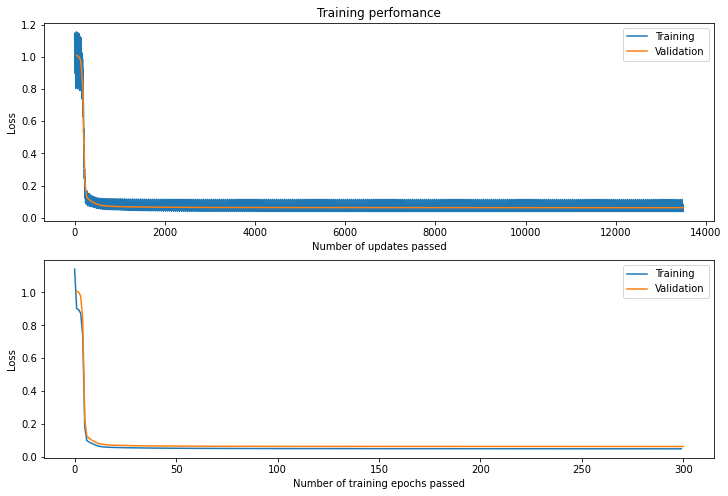

In [59]:
print('\t' * 5 + 'Метод Adagrad')
optimizer_PR.plot_errors()

In [60]:
print("Train error:", optimizer_PR.score(_data_train_x, _data_train_y), "Test error:", optimizer_PR.score(_data_test_x, _data_test_y))

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

Train error: 0.05942741686458787 Test error: 0.06679021242018283


# 4.6. RMSProp и AdaDelta

### Тут RMSProp

In [72]:
ro = [0, 0.5, 0.9, 0.975]
for p in ro:
    epochs = 300
    network = join(
        Input(4), 
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(5, weight = XavierNormal(seed = 15)),
        Linear(1, weight = XavierNormal(seed = 15)),
    )
    optimizer_rms = algorithms.RMSProp(network,
                                    rho=p,
                                    loss = 'mse', 
                                    regularizer = None,
                                    show_epoch = epochs//10,
                                    verbose = True) 
    optimizer_rms.train(_data_train_x, _data_train_y, _data_validation_x, _data_validation_y, epochs = epochs)
    optimizer_rms.plot_errors()
    print("Train error:", optimizer_rms.score(_data_train_x, _data_train_y), "Test error:", optimizer_rms.score(_data_test_x, _data_test_y))


Main information

[ALGORITHM] RMSProp

[OPTION] batch_size = 128
[OPTION] centered = False
[OPTION] decay = 0.95
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] momentum = 0
[OPTION] regularizer = None
[OPTION] show_epoch = 30
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-36:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


KeyboardInterrupt: ignored

In [ ]:
print("Train error:", optimizer_rms.score(_data_train_x, _data_train_y), "Test error:", optimizer_rms.score(_data_test_x, _data_test_y))

### RMSProp

In [ ]:
rho = [
    0.0, 
    0.5, 
    0.9, 
    0.975
]

amountOfEpochs = 300
lr = 0.1

errors_RMSProp = dict()
weightsHistoryRMSProp = dict()

for p in rho:
    errors_RMSProp[p] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(
            lr=lr,
            rho=p
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy()
        ]
    )

    currentEpoch = 1
    weightsHistoryRMSProp[p] = []
    
    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        weightsHistoryRMSProp[p].append(model.get_weights())
        
        errors_RMSProp[p]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_RMSProp[p]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_RMSProp[p]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_RMSProp[p]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

In [ ]:
fig16, ax16 = plt.subplots(len(rho), 1)
fig16.set_size_inches((12, 25))

for i in range(len(rho)):
    ax16[i].plot(errors_RMSProp[rho[i]]['Epoch'], np.array(errors_RMSProp[rho[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
    ax16[i].plot(errors_RMSProp[rho[i]]['Epoch'], np.array(errors_RMSProp[rho[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
    ax16[i].plot(errors_RMSProp[rho[i]]['Epoch'], np.array(errors_RMSProp[rho[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
    ax16[i].legend(fontsize=14)
    ax16[i].grid()
    train_loss = np.array(errors_RMSProp[rho[i]]['Train'])[-1, 0]
    test_loss = np.array(errors_RMSProp[rho[i]]['Test'])[-1, 0]
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

plt.savefig(f'./Graphs/RMSProp_lr={lr}_momentrum={rho[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_RMSProp_1')



for k in range(len(rho)):
    weightsChangesRMSProp = []

    for i in range(amountOfEpochs - 2):
        weightsChangesRMSProp.append([])
        for j in range(len(weightsHistoryRMSProp[rho[k]][i + 1])):
            weightsChangesRMSProp[-1].append(abs((weightsHistoryRMSProp[rho[k]][i + 1][j] - weightsHistoryRMSProp[rho[k]][i][j])/weightsHistoryRMSProp[rho[k]][i][j]))

    speed1 = []
    speed2 = []
    speed3 = []

    max_speed = []
    min_speed = []
    mean_speed = []

    for wc in weightsChangesRMSProp:
        speed1.append(wc[0][3][1])
        speed2.append(wc[2][1][2])
        speed3.append(wc[4][4][0])

        max_ = wc[0][0][0]
        min_ = wc[0][0][0]
        sum_ = 0

        for j in wc:
            h = np.asarray(j)

            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()

            sum_ += h.sum()

        max_speed.append(max_)
        min_speed.append(min_)
        # 362 - number of parameters of NN
        mean_speed.append(sum_/362)

    fig17, ax17 = plt.subplots(2, 3)
    fig17.set_size_inches((25, 10))

    ax17[0][0].plot(speed1);
    ax17[0][0].title.set_text('First Layer')

    ax17[0][1].plot(speed2);
    ax17[0][1].title.set_text('Second Layer')

    ax17[0][2].plot(speed3);
    ax17[0][2].title.set_text('Last Layer')

    ax17[1][0].plot(max_speed);
    ax17[1][0].title.set_text('Max lr')

    ax17[1][1].plot(min_speed);
    ax17[1][1].title.set_text('Min lr')

    ax17[1][2].plot(mean_speed);
    ax17[1][2].title.set_text('Mean lr')

    plt.savefig(f'./Graphs/RMSProp_learning_rate_p={rho[k]}.png', dpi=300)
    plt.show()

### Другой RMSProp

In [ ]:
ro = [0, 0.5, 0.9, 0.975]
m_name = 'RMSprop'
models_RMSProp = []
fig_, ax_ =  plt.subplots(2, 2, figsize=(20, 15))
for p in range(4):
    str_ = ' (ro = '+ str(ro[p])+')'
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(8,)),
            layers.Dense(firstLayerAmountOfNeurons, activation=firstLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(secondLayerAmountOfNeurons, activation=secondLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(thirdLayerAmountOfNeurons, activation=thirdLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(2, activation="softmax", kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
        ]
    )
    epochs = 300
    weights_history = []
    loss = []
    val_loss = []
    test_loss = []
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr = 0.1, rho = ro[p]), metrics=['accuracy'])
    for i in range(epochs):
        fit = model.fit(_data_train_x, _data_train_y, batch_size=len(_data_train_y), epochs=1, validation_data=(_data_validation_x, _data_validation_y), verbose = 0)
        weights_history.append(model.get_weights())
        loss.append(fit.history['loss'][0])
        val_loss.append(fit.history['val_loss'][0])
        test_loss.append(model.evaluate(_data_train_x, _data_train_y, verbose = 0)[0])
    hh = p // 2
    ss = p % 2
    ax_[hh, ss].plot(loss);
    ax_[hh, ss].plot(val_loss);
    ax_[hh, ss].plot(test_loss);
    ax_[hh, ss].set_title(m_name + str_)
    ax_[hh, ss].set_ylabel('loss')
    ax_[hh, ss].set_xlabel('epoch')
    ax_[hh, ss].legend(['train', 'validation', 'test'], loc='upper right')
    weights_changes = []
    for i in range(epochs - 1):
        weights_changes.append([])
        for j in range(len(weights_history[0])):
            weights_changes[-1].append(abs((weights_history[i + 1][j] - weights_history[i][j])/weights_history[i][j]))
            weight1 = []
    weight2 = []
    weight3 = []
    max_w = []
    min_w = []
    mean_w = []
    for i in weights_changes:
        weight1.append(i[0][5][6])
        weight2.append(i[2][8][3])
        weight3.append(i[4][8][0])
        max_ = i[0][0][0]
        min_ = i[0][0][0]
        sum_ = 0
        for j in i:
            h = np.asarray(j)
            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()
            sum_ += h.sum()
        max_w.append(max_)
        min_w.append(min_)
        mean_w.append(sum_/821)
    fig, ax =  plt.subplots(2, 3, figsize=(30, 10))
    ax[0, 0].plot(weight1);
    ax[0, 0].title.set_text('С первого слоя ' + m_name + str_)
    ax[0, 1].plot(weight2);
    ax[0, 1].title.set_text('Со второго слоя ' + m_name + str_)
    ax[0, 2].plot(weight3);
    ax[0, 2].title.set_text('Со выходного слоя ' + m_name + str_)
    ax[1, 0].plot(max_w);
    ax[1, 0].title.set_text('Маскимальная скорость ' + m_name + str_)
    ax[1, 1].plot(min_w);
    ax[1, 1].title.set_text('Минимальная скорость ' + m_name + str_)
    ax[1, 2].plot(mean_w);
    ax[1, 2].title.set_text('Средняя скорость ' + m_name + str_)
    print('Loss на обучающей выборке ' + m_name + str_, model.evaluate(_data_train_x, _data_train_y, verbose=0)[0])
    print('Loss на тестовой выборке ' + m_name + str_, model.evaluate(_data_test_x, _data_test_y, verbose = 0)[0])
    models_RMSProp.append(model)
plt.show()

### Тут Adadelta твоя


Main information

[ALGORITHM] Adadelta

[OPTION] batch_size = 128
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] rho = 0
[OPTION] show_epoch = 30
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 1.0
[OPTION] target = Tensor("placeholder/target/linear-37:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 136.80 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [31 sec] train: 0.963500, valid: 1.022399


Time: 0:00:00 |100%|#############################| Time: 0:00:00 | loss: ------

#30 : [57 ms] train: 0.065724, valid: 0.073092


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [46 ms] train: 0.062855, valid: 0.067080


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#90 : [43 ms] train: 0.061984, valid: 0.065373


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#120 : [48 ms] train: 0.062751, valid: 0.066924


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#150 : [50 ms] train: 0.062859, valid: 0.063690


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [49 ms] train: 0.063226, valid: 0.063773


#210 : [49 ms] train: 0.063526, valid: 0.063566


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#240 : [53 ms] train: 0.064126, valid: 0.063112


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#270 : [48 ms] train: 0.064075, valid: 0.062590


#300 : [50 ms] train: 0.064338, valid: 0.062553


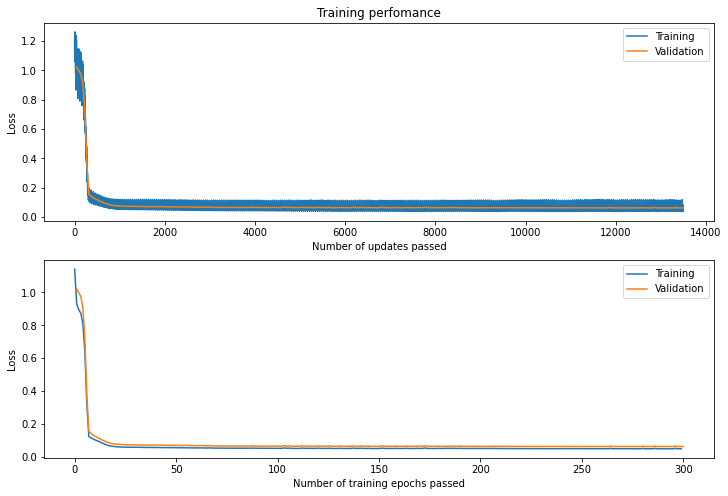

Train error: 0.060044419557790725 Test error: 0.06831795487374005

Main information

[ALGORITHM] Adadelta

[OPTION] batch_size = 128
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] rho = 0.5
[OPTION] show_epoch = 30
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 1.0
[OPTION] target = Tensor("placeholder/target/linear-38:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 151.07 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [32 sec] train: 1.045943, valid: 1.073927


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#30 : [47 ms] train: 0.090078, valid: 0.119484


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [53 ms] train: 0.066532, valid: 0.071210


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#90 : [57 ms] train: 0.064248, valid: 0.065278


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#120 : [54 ms] train: 0.063929, valid: 0.063427


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#150 : [52 ms] train: 0.064240, valid: 0.062841


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [56 ms] train: 0.064609, valid: 0.062610


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#210 : [61 ms] train: 0.064920, valid: 0.062520


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#240 : [61 ms] train: 0.065153, valid: 0.062497


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#270 : [56 ms] train: 0.065314, valid: 0.062505


#300 : [52 ms] train: 0.065416, valid: 0.062527


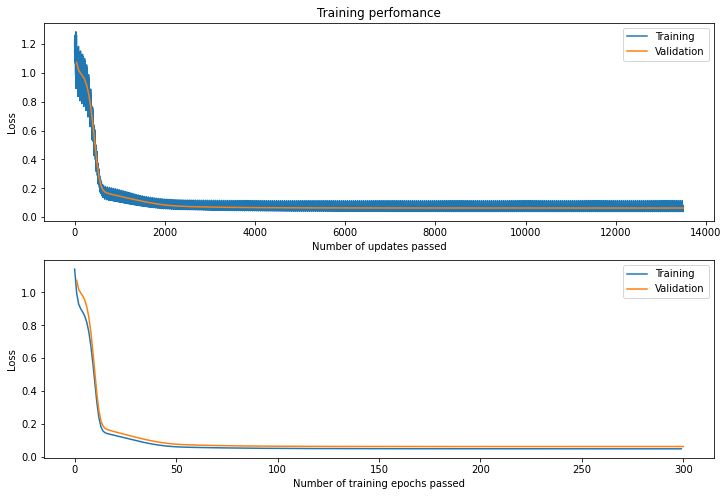

Train error: 0.059766991379369014 Test error: 0.06686067680725225

Main information

[ALGORITHM] Adadelta

[OPTION] batch_size = 128
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] rho = 0.9
[OPTION] show_epoch = 30
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 1.0
[OPTION] target = Tensor("placeholder/target/linear-39:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


In [ ]:
ro = [0, 0.5, 0.9, 0.975]
for p in ro:
    epochs = 300
    network = join(
        Input(4), 
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(5, weight = XavierNormal(seed = 15)),
        Linear(1, weight = XavierNormal(seed = 15)),
    )
    optimizer_ad = algorithms.Adadelta(network,
                                    rho=p,
                                    loss = 'mse', 
                                    regularizer = None,
                                    show_epoch = epochs//10,
                                    verbose = True) 
    optimizer_ad.train(_data_train_x, _data_train_y, _data_validation_x, _data_validation_y, epochs = epochs)
    optimizer_ad.plot_errors()
    print("Train error:", optimizer_ad.score(_data_train_x, _data_train_y), "Test error:", optimizer_ad.score(_data_test_x, _data_test_y))

In [ ]:
print("Train error:", optimizer_ad.score(_data_train_x, _data_train_y), "Test error:", optimizer_ad.score(_data_test_x, _data_test_y))print("Train error:", optimizer_ad.score(_data_train_x, _data_train_y), "Test error:", optimizer_ad.score(_data_test_x, _data_test_y))

### Adadelta

In [ ]:
rho = [
    0.0, 
    0.5, 
    0.9, 
    0.975
]

amountOfEpochs = 300
lr = 0.1

errors_AdaDelta = dict()
weightsHistoryAdadelta = dict()

for p in rho:
    errors_AdaDelta[p] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.Adadelta(
            lr=lr,
            rho=p
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy()
        ]
    )

    currentEpoch = 1
    weightsHistoryAdadelta[p] = []
    
    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        weightsHistoryAdadelta[p].append(model.get_weights())
        
        errors_AdaDelta[p]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_AdaDelta[p]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_AdaDelta[p]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_AdaDelta[p]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

In [ ]:
fig13, ax13 = plt.subplots(len(rho), 1)
fig13.set_size_inches((12, 25))

for i in range(len(rho)):
    ax13[i].plot(errors_AdaDelta[rho[i]]['Epoch'], np.array(errors_AdaDelta[rho[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
    ax13[i].plot(errors_AdaDelta[rho[i]]['Epoch'], np.array(errors_AdaDelta[rho[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
    ax13[i].plot(errors_AdaDelta[rho[i]]['Epoch'], np.array(errors_AdaDelta[rho[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
    ax13[i].legend(fontsize=14)
    ax13[i].grid()
    train_loss = np.array(errors_AdaDelta[rho[i]]['Train'])[-1, 0]
    test_loss = np.array(errors_AdaDelta[rho[i]]['Test'])[-1, 0]
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

plt.savefig(f'./Graphs/Adadelta_lr={lr}_momentrum={rho[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_Adadelta_1')



for k in range(len(rho)):
    weightsChangesAdadelta = []

    for i in range(amountOfEpochs - 2):
        weightsChangesAdadelta.append([])
        for j in range(len(weightsHistoryAdadelta[rho[k]][i + 1])):
            weightsChangesAdadelta[-1].append(abs((weightsHistoryAdadelta[rho[k]][i + 1][j] - weightsHistoryAdadelta[rho[k]][i][j])/weightsHistoryAdadelta[rho[k]][i][j]))

    speed1 = []
    speed2 = []
    speed3 = []

    max_speed = []
    min_speed = []
    mean_speed = []

    for wc in weightsChangesAdadelta:
        speed1.append(wc[0][3][1])
        speed2.append(wc[2][1][2])
        speed3.append(wc[4][4][0])

        max_ = wc[0][0][0]
        min_ = wc[0][0][0]
        sum_ = 0

        for j in wc:
            h = np.asarray(j)

            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()

            sum_ += h.sum()

        max_speed.append(max_)
        min_speed.append(min_)
        # 362 - number of parameters of NN
        mean_speed.append(sum_/362)

    fig15, ax15 = plt.subplots(2, 3)
    fig15.set_size_inches((25, 10))

    ax15[0][0].plot(speed1);
    ax15[0][0].title.set_text('First Layer')

    ax15[0][1].plot(speed2);
    ax15[0][1].title.set_text('Second Layer')

    ax15[0][2].plot(speed3);
    ax15[0][2].title.set_text('Last Layer')

    ax15[1][0].plot(max_speed);
    ax15[1][0].title.set_text('Max lr')

    ax15[1][1].plot(min_speed);
    ax15[1][1].title.set_text('Min lr')

    ax15[1][2].plot(mean_speed);
    ax15[1][2].title.set_text('Mean lr')

    plt.savefig(f'./Graphs/AdaDelta_learning_rate_p={rho[k]}.png', dpi=300)
    plt.show()

### Другой Adadelta

In [ ]:
ro = [0, 0.5, 0.9, 0.975]
m_name = 'Adadelta'
models_Adadelta = []
fig_, ax_ =  plt.subplots(2, 2, figsize=(20, 15))
for p in range(4):
    str_ = ' (ro = '+ str(ro[p])+')'
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(8,)),
            layers.Dense(firstLayerAmountOfNeurons, activation=firstLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(secondLayerAmountOfNeurons, activation=secondLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(thirdLayerAmountOfNeurons, activation=thirdLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(2, activation="softmax", kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
        ]
    )
    epochs = 300
    weights_history = []
    loss = []
    val_loss = []
    test_loss = []
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adadelta(lr = 0.1, rho = ro[p]), metrics=['accuracy'])
    for i in range(epochs):
        fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_data=(x_val, y_val), verbose = 0)
        weights_history.append(model.get_weights())
        loss.append(fit.history['loss'][0])
        val_loss.append(fit.history['val_loss'][0])
        test_loss.append(model.evaluate(x_test, y_test, verbose = 0)[0])
    hh = p // 2
    ss = p % 2
    ax_[hh, ss].plot(loss);
    ax_[hh, ss].plot(val_loss);
    ax_[hh, ss].plot(test_loss);
    ax_[hh, ss].set_title(m_name + str_)
    ax_[hh, ss].set_ylabel('loss')
    ax_[hh, ss].set_xlabel('epoch')
    ax_[hh, ss].legend(['train', 'validation', 'test'], loc='upper right')
    weights_changes = []
    for i in range(epochs - 1):
        weights_changes.append([])
        for j in range(len(weights_history[0])):
            weights_changes[-1].append(abs((weights_history[i + 1][j] - weights_history[i][j])/weights_history[i][j]))
            weight1 = []
    weight2 = []
    weight3 = []
    max_w = []
    min_w = []
    mean_w = []
    for i in weights_changes:
        weight1.append(i[0][5][6])
        weight2.append(i[2][8][3])
        weight3.append(i[4][8][0])
        max_ = i[0][0][0]
        min_ = i[0][0][0]
        sum_ = 0
        for j in i:
            h = np.asarray(j)
            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()
            sum_ += h.sum()
        max_w.append(max_)
        min_w.append(min_)
        mean_w.append(sum_/362)
    fig, ax =  plt.subplots(2, 3, figsize=(30, 10))
    ax[0, 0].plot(weight1);
    ax[0, 0].title.set_text('С первого слоя ' + m_name + str_)
    ax[0, 1].plot(weight2);
    ax[0, 1].title.set_text('Со второго слоя ' + m_name + str_)
    ax[0, 2].plot(weight3);
    ax[0, 2].title.set_text('С третьего слоя ' + m_name + str_)
    ax[1, 0].plot(max_w);
    ax[1, 0].title.set_text('Маскимальная скорость ' + m_name + str_)
    ax[1, 1].plot(min_w);
    ax[1, 1].title.set_text('Минимальная скорость ' + m_name + str_)
    ax[1, 2].plot(mean_w);
    ax[1, 2].title.set_text('Средняя скорость ' + m_name + str_)
    print('Loss на обучающей выборке ' + m_name + str_, model.evaluate(x_train, y_train, verbose=0)[0])
    print('Loss на тестовой выборке ' + m_name + str_, model.evaluate(x_test, y_test, verbose = 0)[0])
    models_Adadelta.append(model)
plt.show()

# 4.7 Adam

### Adam тут


Main information

[ALGORITHM] Adam

[OPTION] batch_size = 128
[OPTION] beta1 = 0
[OPTION] beta2 = 0.5
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.001
[OPTION] target = Tensor("placeholder/target/linear-23:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 28.16 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [6 sec] train: 1.021424, valid: 1.057732


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#20 : [56 ms] train: 0.092499, valid: 0.121329


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#40 : [55 ms] train: 0.064985, valid: 0.069196


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [55 ms] train: 0.063222, valid: 0.065036


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#80 : [53 ms] train: 0.063101, valid: 0.063655


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#100 : [54 ms] train: 0.063466, valid: 0.063086


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#120 : [55 ms] train: 0.063856, valid: 0.062844


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#140 : [55 ms] train: 0.064159, valid: 0.062760


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#160 : [49 ms] train: 0.064365, valid: 0.062746


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [54 ms] train: 0.064492, valid: 0.062760


#200 : [53 ms] train: 0.064560, valid: 0.062784


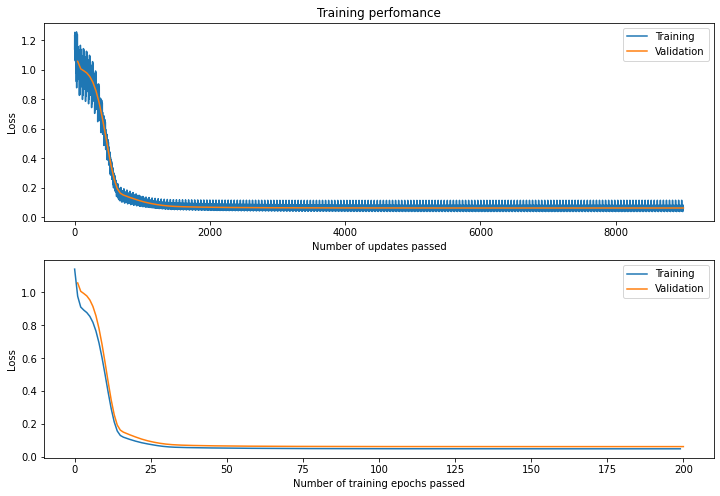

Train error: 0.06021834316984702 Test error: 0.06719603568377724

Main information

[ALGORITHM] Adam

[OPTION] batch_size = 128
[OPTION] beta1 = 0.5
[OPTION] beta2 = 0.5
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.001
[OPTION] target = Tensor("placeholder/target/linear-24:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 32.84 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [7 sec] train: 1.017261, valid: 1.055471


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#20 : [49 ms] train: 0.089469, valid: 0.116679


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#40 : [63 ms] train: 0.065059, valid: 0.068120


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [58 ms] train: 0.063921, valid: 0.063991


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#80 : [61 ms] train: 0.064423, valid: 0.062694


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#100 : [62 ms] train: 0.065058, valid: 0.062199


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#120 : [53 ms] train: 0.065540, valid: 0.061994


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#140 : [55 ms] train: 0.065874, valid: 0.061913


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#160 : [56 ms] train: 0.066097, valid: 0.061879


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [55 ms] train: 0.066238, valid: 0.061863


#200 : [56 ms] train: 0.066321, valid: 0.061853


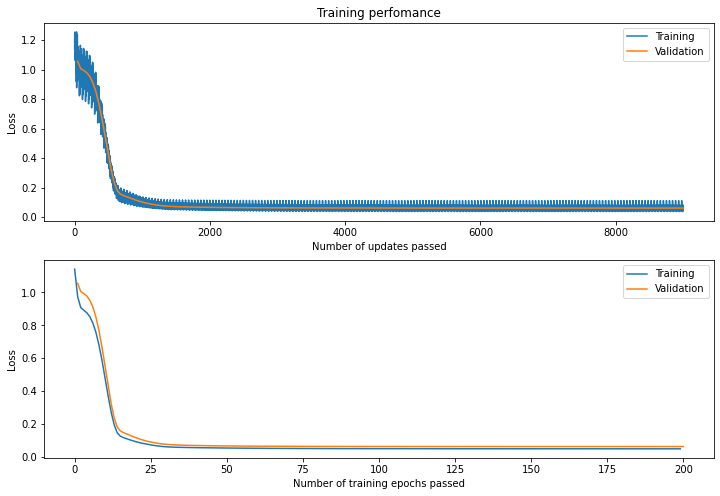

Train error: 0.0594428085699314 Test error: 0.0664937650485427

Main information

[ALGORITHM] Adam

[OPTION] batch_size = 128
[OPTION] beta1 = 0.5
[OPTION] beta2 = 0.7
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.001
[OPTION] target = Tensor("placeholder/target/linear-25:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 37.49 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [8 sec] train: 1.020612, valid: 1.057527


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#20 : [58 ms] train: 0.090165, valid: 0.117479


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#40 : [57 ms] train: 0.065243, valid: 0.068113


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [66 ms] train: 0.064119, valid: 0.064009


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#80 : [59 ms] train: 0.064547, valid: 0.062645


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#100 : [63 ms] train: 0.065134, valid: 0.062100


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#120 : [57 ms] train: 0.065595, valid: 0.061868


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#140 : [65 ms] train: 0.065925, valid: 0.061771


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#160 : [63 ms] train: 0.066151, valid: 0.061728


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [63 ms] train: 0.066299, valid: 0.061705


#200 : [58 ms] train: 0.066390, valid: 0.061689


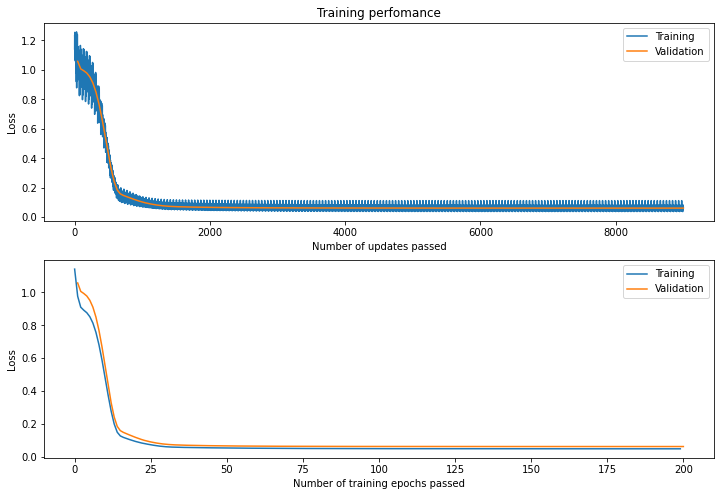

Train error: 0.05933889993807165 Test error: 0.06639845336404375

Main information

[ALGORITHM] Adam

[OPTION] batch_size = 128
[OPTION] beta1 = 0.7
[OPTION] beta2 = 0.9
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.001
[OPTION] target = Tensor("placeholder/target/linear-26:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 41.25 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [9 sec] train: 1.023391, valid: 1.059511


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#20 : [57 ms] train: 0.088427, valid: 0.115162


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#40 : [61 ms] train: 0.064728, valid: 0.067786


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [65 ms] train: 0.063560, valid: 0.063893


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#80 : [61 ms] train: 0.063984, valid: 0.062541


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#100 : [56 ms] train: 0.064559, valid: 0.061992


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#120 : [65 ms] train: 0.065000, valid: 0.061766


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#140 : [50 ms] train: 0.065299, valid: 0.061671


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#160 : [68 ms] train: 0.065489, valid: 0.061622


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [54 ms] train: 0.065601, valid: 0.061587


#200 : [52 ms] train: 0.065659, valid: 0.061557


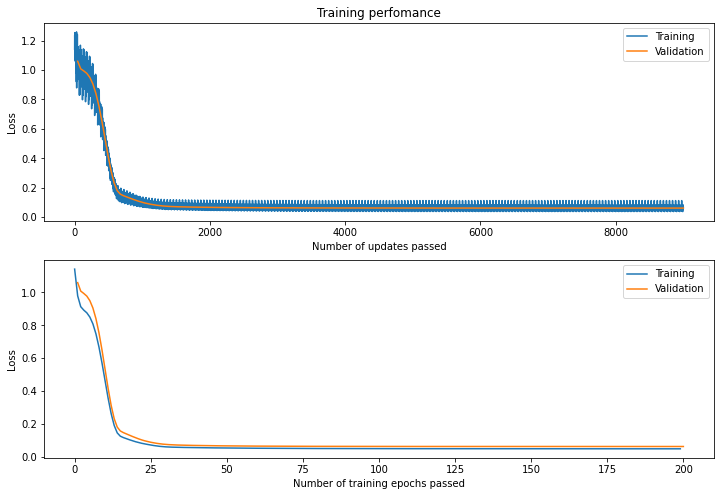

Train error: 0.0591776140060159 Test error: 0.06647134275177576

Main information

[ALGORITHM] Adam

[OPTION] batch_size = 128
[OPTION] beta1 = 0.9
[OPTION] beta2 = 0.9
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.001
[OPTION] target = Tensor("placeholder/target/linear-27:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 47.56 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [10 sec] train: 1.018369, valid: 1.056257


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#20 : [61 ms] train: 0.093216, valid: 0.123468


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#40 : [61 ms] train: 0.064495, valid: 0.068286


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [56 ms] train: 0.063305, valid: 0.064093


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#80 : [58 ms] train: 0.063728, valid: 0.062710


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#100 : [62 ms] train: 0.064277, valid: 0.062175


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#120 : [61 ms] train: 0.064703, valid: 0.061960


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#140 : [59 ms] train: 0.065001, valid: 0.061870


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#160 : [64 ms] train: 0.065197, valid: 0.061823


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [61 ms] train: 0.065319, valid: 0.061790


#200 : [58 ms] train: 0.065388, valid: 0.061757


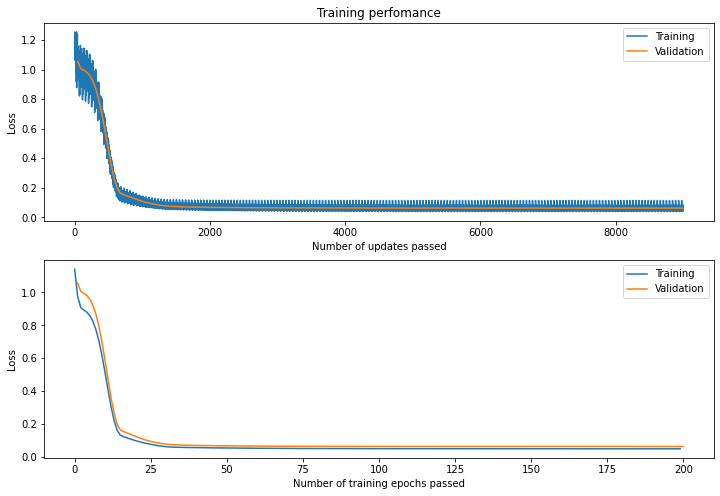

Train error: 0.05918225544254954 Test error: 0.06645988671416281

Main information

[ALGORITHM] Adam

[OPTION] batch_size = 128
[OPTION] beta1 = 0.9
[OPTION] beta2 = 0.975
[OPTION] epsilon = 1e-07
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.001
[OPTION] target = Tensor("placeholder/target/linear-28:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 53.80 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [12 sec] train: 1.022751, valid: 1.059189


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#20 : [50 ms] train: 0.088043, valid: 0.116745


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#40 : [65 ms] train: 0.064315, valid: 0.067556


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [61 ms] train: 0.063368, valid: 0.063666


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#80 : [57 ms] train: 0.063856, valid: 0.062508


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#100 : [65 ms] train: 0.064375, valid: 0.062079


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#120 : [63 ms] train: 0.064756, valid: 0.061912


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#140 : [59 ms] train: 0.065011, valid: 0.061838


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#160 : [51 ms] train: 0.065172, valid: 0.061793


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [62 ms] train: 0.065272, valid: 0.061757


#200 : [59 ms] train: 0.065330, valid: 0.061721


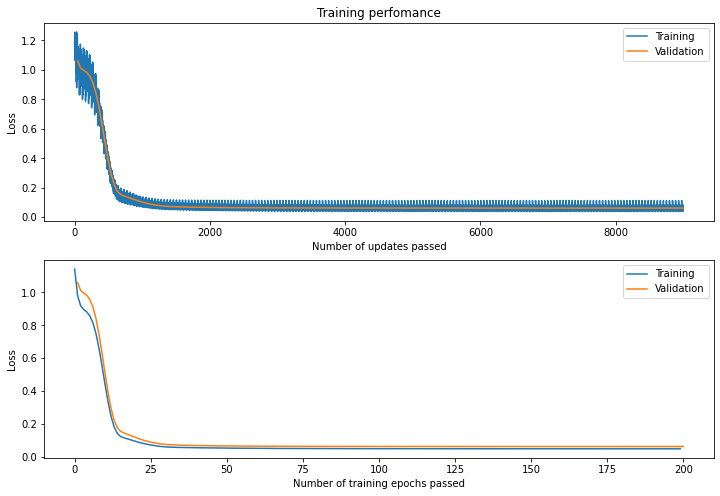

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

Train error: 0.05913138572347289 Test error: 0.06647215506726864


In [67]:
betas = [(0, 0.5), (0.5, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 0.9), (0.9, 0.975)]
for beta in betas:
    epochs = 200
    network = join(
        Input(4), 
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(10, weight = XavierNormal(seed = 15)),
        Sigmoid(5, weight = XavierNormal(seed = 15)),
        Linear(1, weight = XavierNormal(seed = 15)),
    )
    optimizer_adam = algorithms.Adam(network,
                                beta1 = beta[0],
                                beta2 = beta[1],
                                loss = 'mse', 
                                regularizer = None,
                                show_epoch = epochs//10,
                                verbose = True) 
    optimizer_adam.train(_data_train_x, _data_train_y, _data_validation_x, _data_validation_y, epochs = epochs)
    optimizer_adam.plot_errors()
    print("Train error:", optimizer_adam.score(_data_train_x, _data_train_y), "Test error:", optimizer_adam.score(_data_test_x, _data_test_y))

### Adam

In [ ]:
betas = [
    (0.0, 0.5),
    (0.5, 0.0),
    (0.5, 0.7),
    (0.5, 0.9),
    (0.9, 0.9),
    (0.9, 0.999)
]

amountOfEpochs = 200
lr = 0.1

errors_Adam = dict()
weightsHistoryAdam = dict()

for p in betas:
    errors_Adam[p] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }
    
    model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            lr=lr,
            beta_1=p[0],
            beta_2=p[1]
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy()
        ]
    )

    currentEpoch = 1
    weightsHistoryAdam[p] = []
    
    while currentEpoch < amountOfEpochs:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=batch_size
        )
        
        weightsHistoryAdam[p].append(model.get_weights())
        
        errors_Adam[p]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_Adam[p]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_Adam[p]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_Adam[p]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1

Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 1s 43us/sample - loss: 0.6682 - binary_accuracy: 0.7600 - val_loss: 0.7300 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.7276 - binary_accuracy: 0.7600 - val_loss: 0.6165 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.6161 - binary_accuracy: 0.7600 - val_loss: 0.5694 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 1us/sample - loss: 0.5681 - binary_accuracy: 0.7600 - val_loss: 0.5718 - val_binary_accuracy: 0.7591
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.5715 - binary_accuracy: 0.7600 - val_loss: 0.5786 - val_binary_accuracy: 0.7591

Train loss: 	0.3222041130065918
Test loss: 	0.34286829829216003

Train loss: 	0.5513428449630737
Test loss: 	0.5571780204772949

Train loss: 	0.3326055407524109
Test loss: 	0.3531607687473297

Train loss: 	0.30583593249320984
Test loss: 	0.3266347348690033

Train loss: 	0.2827717661857605
Test loss: 	0.3410148322582245

Train loss: 	0.2968716621398926
Test loss: 	0.32082033157348633


Consider using a TensorFlow optimizer from `tf.train`.


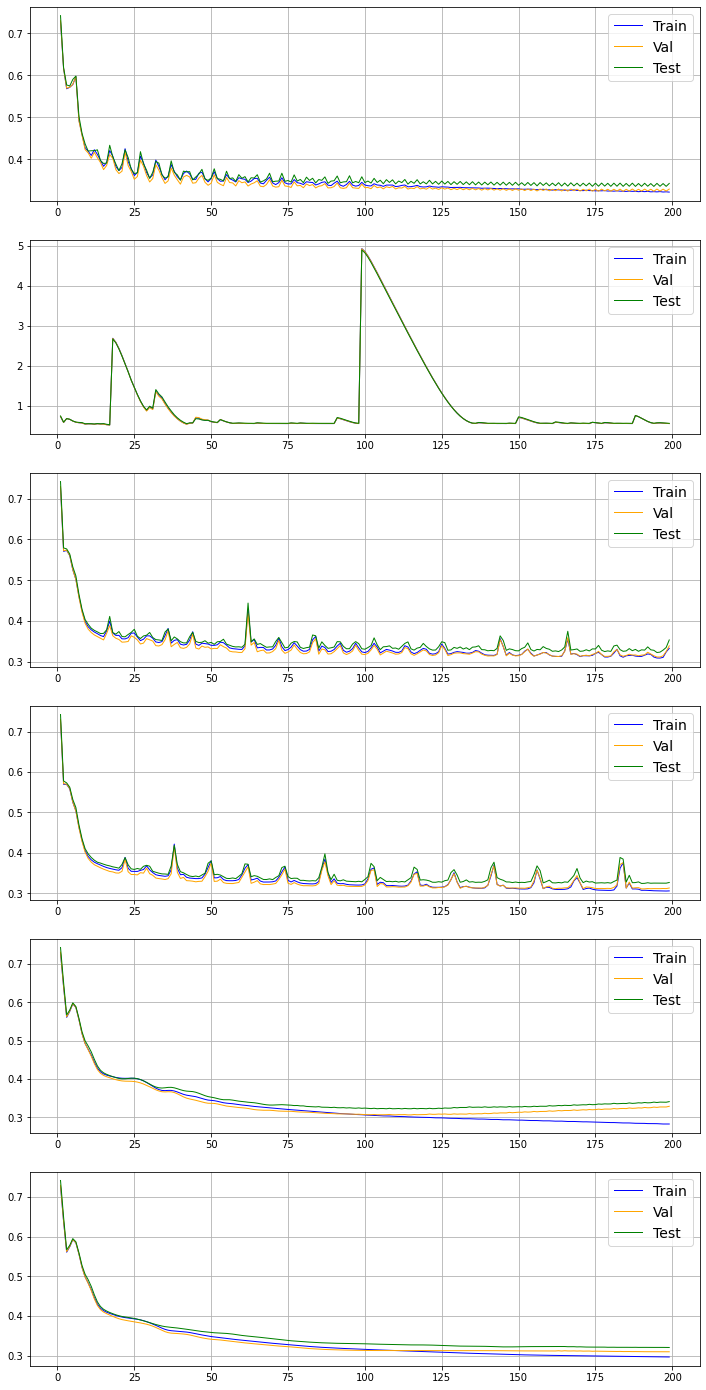

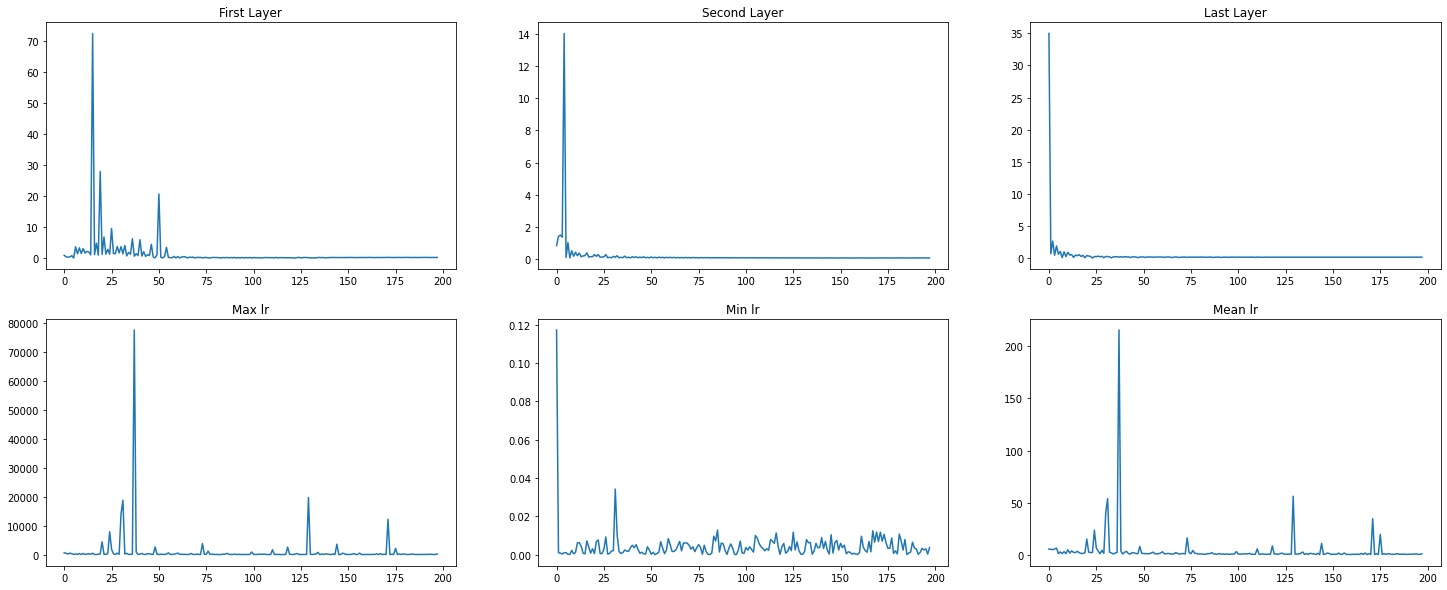

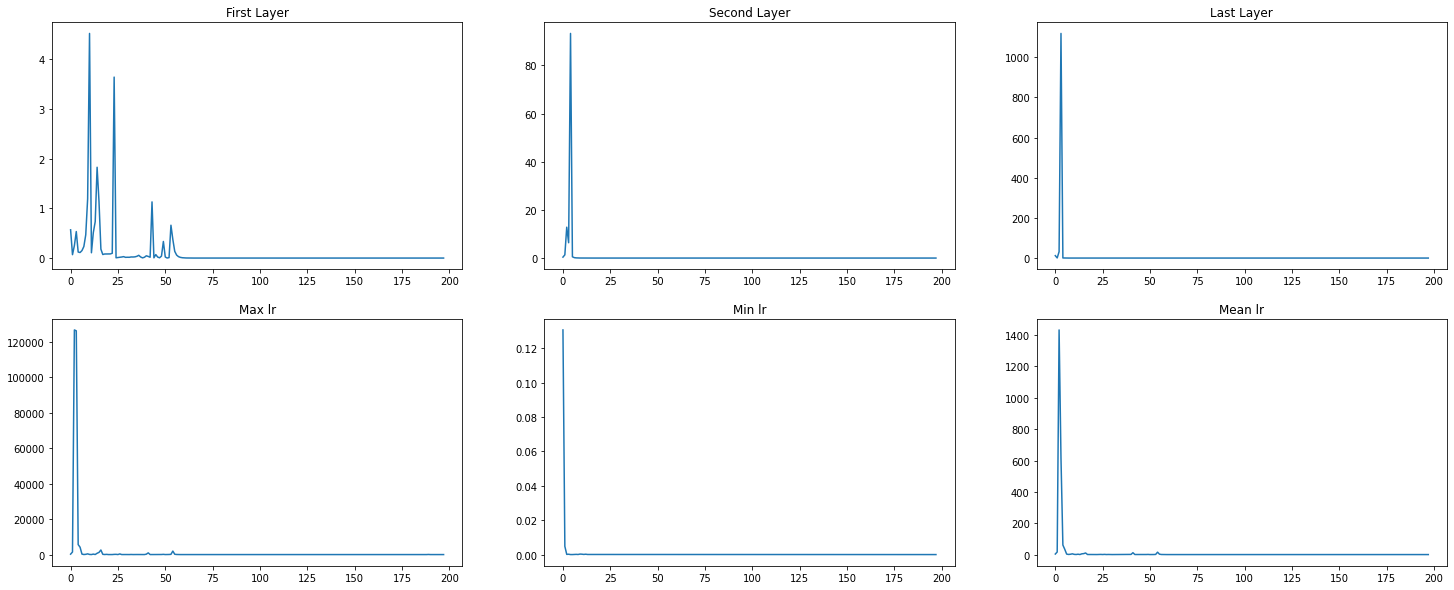

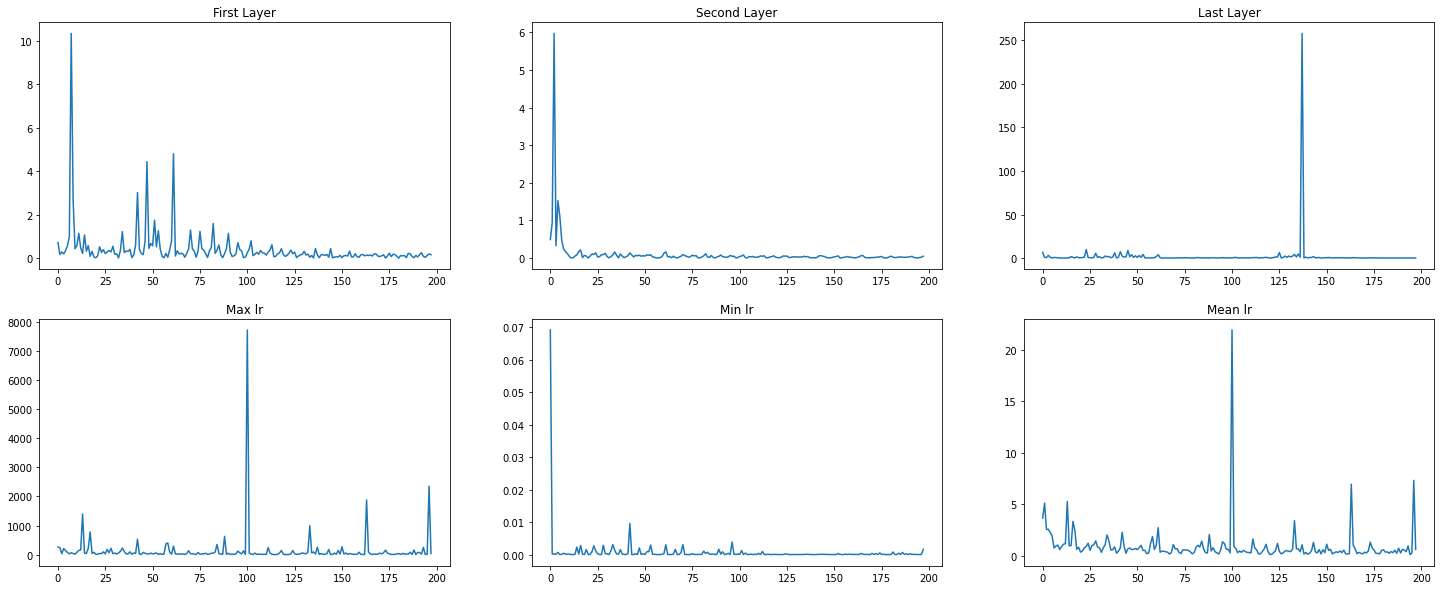

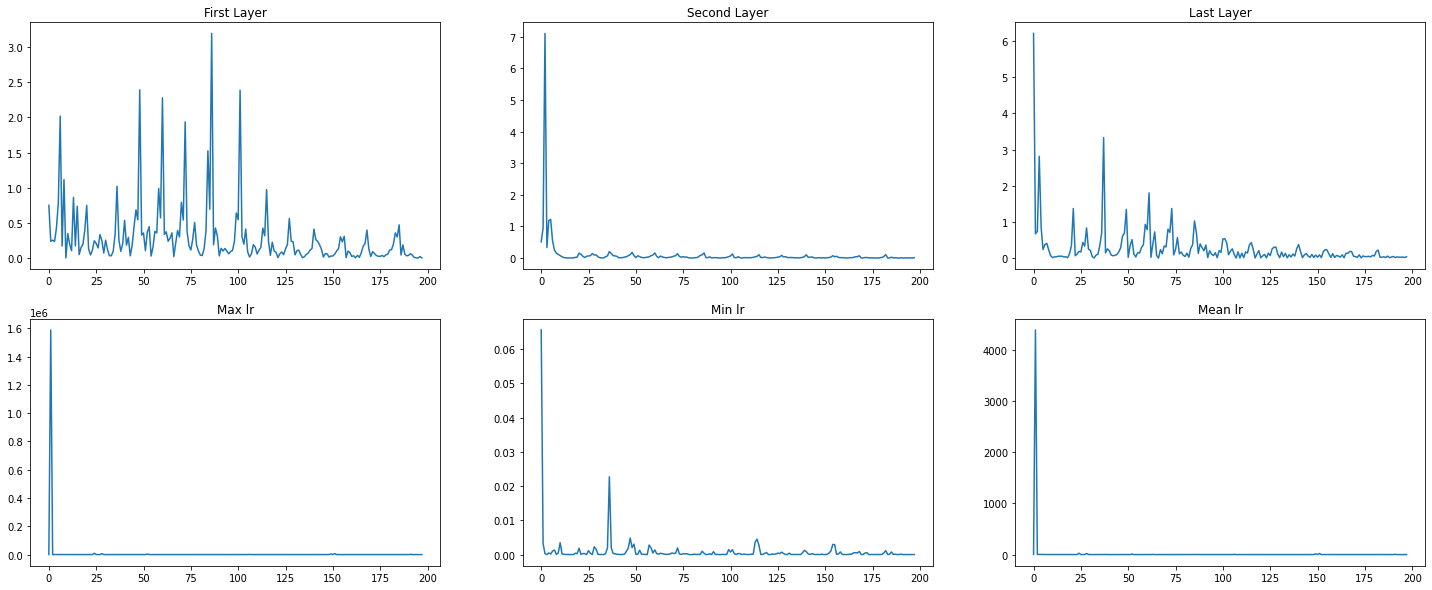

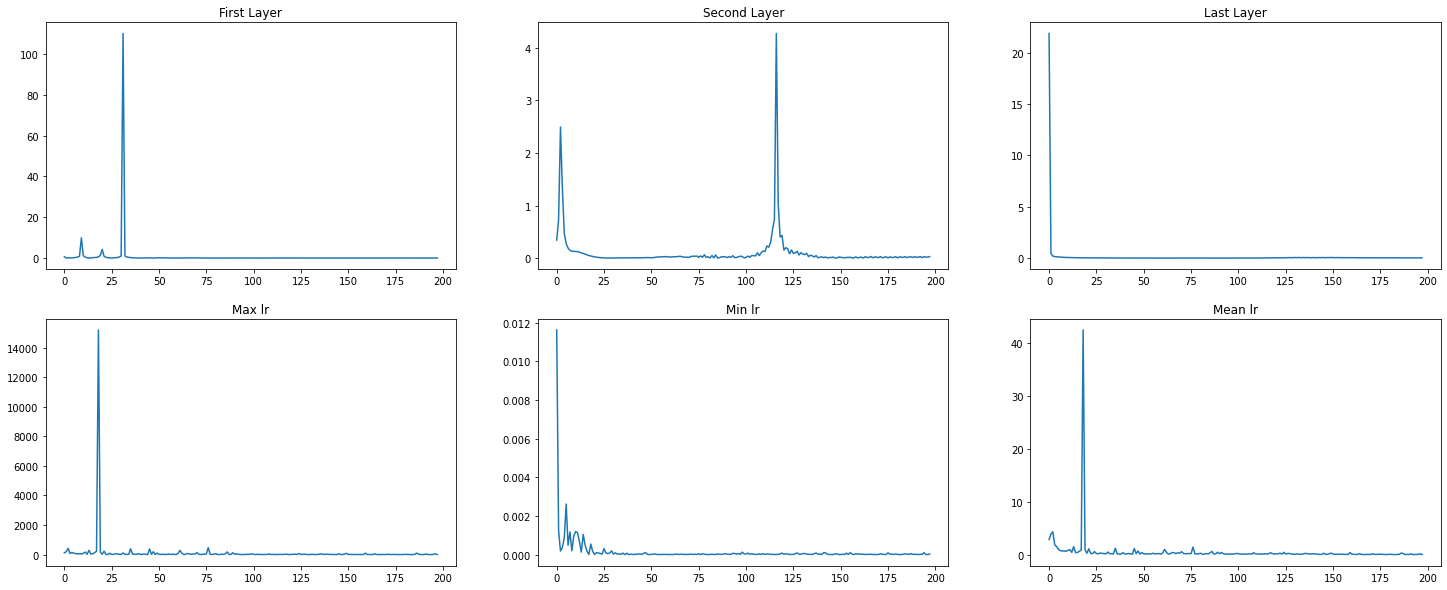

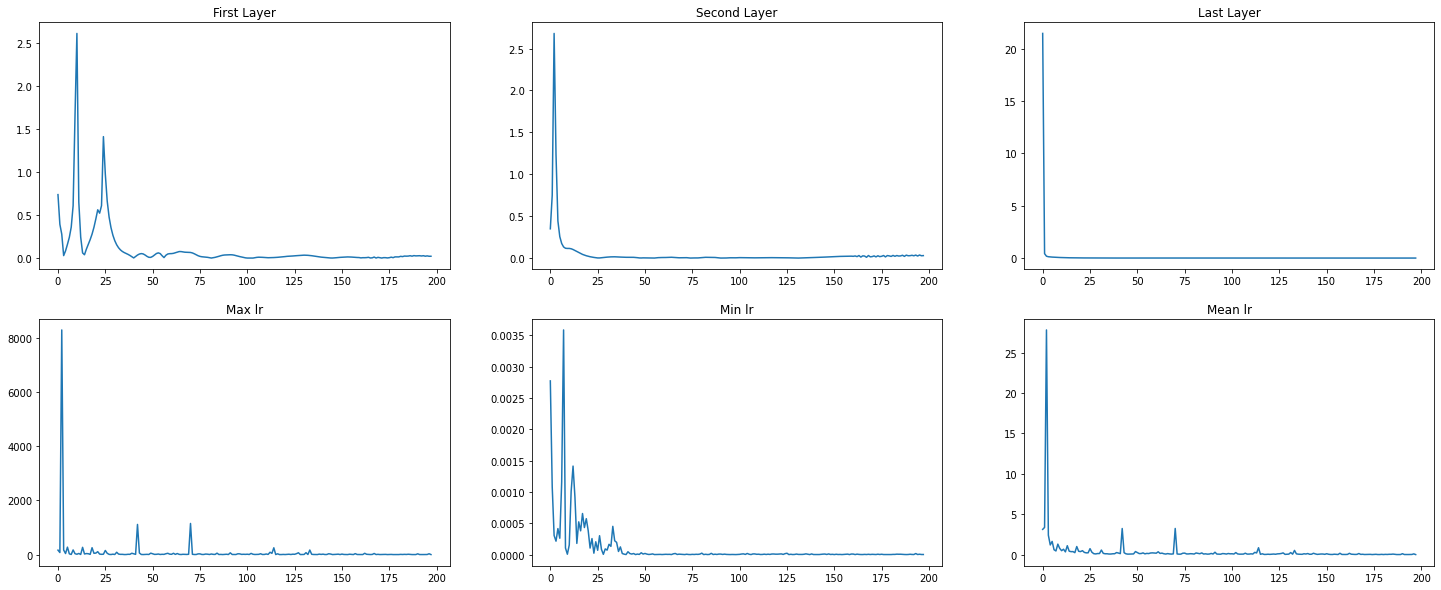

In [ ]:
fig18, ax18 = plt.subplots(len(betas), 1)
fig18.set_size_inches((12, 25))

for i in range(len(betas)):
    ax18[i].plot(errors_Adam[betas[i]]['Epoch'], np.array(errors_Adam[betas[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
    ax18[i].plot(errors_Adam[betas[i]]['Epoch'], np.array(errors_Adam[betas[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
    ax18[i].plot(errors_Adam[betas[i]]['Epoch'], np.array(errors_Adam[betas[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
    ax18[i].legend(fontsize=14)
    ax18[i].grid()
    train_loss = np.array(errors_Adam[betas[i]]['Train'])[-1, 0]
    test_loss = np.array(errors_Adam[betas[i]]['Test'])[-1, 0]
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

plt.savefig(f'./Graphs/Adam_lr={lr}_momentrum={betas[i]}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights('./weights/weight_Adam_1')



for k in range(len(betas)):
    weightsChangesAdam = []

    for i in range(amountOfEpochs - 2):
        weightsChangesAdam.append([])
        for j in range(len(weightsHistoryAdam[betas[k]][i + 1])):
            weightsChangesAdam[-1].append(abs((weightsHistoryAdam[betas[k]][i + 1][j] - weightsHistoryAdam[betas[k]][i][j])/weightsHistoryAdam[betas[k]][i][j]))

    speed1 = []
    speed2 = []
    speed3 = []

    max_speed = []
    min_speed = []
    mean_speed = []

    for wc in weightsChangesAdam:
        speed1.append(wc[0][3][1])
        speed2.append(wc[2][1][2])
        speed3.append(wc[4][4][0])

        max_ = wc[0][0][0]
        min_ = wc[0][0][0]
        sum_ = 0

        for j in wc:
            h = np.asarray(j)

            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()

            sum_ += h.sum()

        max_speed.append(max_)
        min_speed.append(min_)
        # 362 - number of parameters of NN
        mean_speed.append(sum_/362)

    fig19, ax19 = plt.subplots(2, 3)
    fig19.set_size_inches((25, 10))

    ax19[0][0].plot(speed1);
    ax19[0][0].title.set_text('First Layer')

    ax19[0][1].plot(speed2);
    ax19[0][1].title.set_text('Second Layer')

    ax19[0][2].plot(speed3);
    ax19[0][2].title.set_text('Last Layer')

    ax19[1][0].plot(max_speed);
    ax19[1][0].title.set_text('Max lr')

    ax19[1][1].plot(min_speed);
    ax19[1][1].title.set_text('Min lr')

    ax19[1][2].plot(mean_speed);
    ax19[1][2].title.set_text('Mean lr')

    plt.savefig(f'./Graphs/Adam_learning_rate_beta_1={betas[k][0]}_beta_2={betas[k][1]}.png', dpi=300)
    plt.show()

### Другой Adam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


Loss на обучающей выборке Adam (b1 = 0.0, b2 = 0.5) 0.012665045516534853
Loss на тестовой выборке Adam (b1 = 0.0, b2 = 0.5) 0.010799406348333622
Loss на обучающей выборке Adam (b1 = 0.5, b2 = 0.0) 14.391016269299138
Loss на тестовой выборке Adam (b1 = 0.5, b2 = 0.0) 14.377891082763671
Loss на обучающей выборке Adam (b1 = 0.5, b2 = 0.7) 0.00053417150685771
Loss на тестовой выборке Adam (b1 = 0.5, b2 = 0.7) 0.00023176901534987756
Loss на обучающей выборке Adam (b1 = 0.5, b2 = 0.9) 0.00046973179285546556
Loss на тестовой выборке Adam (b1 = 0.5, b2 = 0.9) 0.0002242682137204191
Loss на обучающей выборке Adam (b1 = 0.9, b2 = 0.9) 0.0017030630367054049
Loss на тестовой выборке Adam (b1 = 0.9, b2 = 0.9) 0.0007963849159960564
Loss на обучающей выборке Adam (b1 = 0.9, b2 = 0.999) 0.0009845930848445472
Loss на тестовой выборке Adam (b1 = 0.9, b2 = 0.999) 0.00030345730290998917


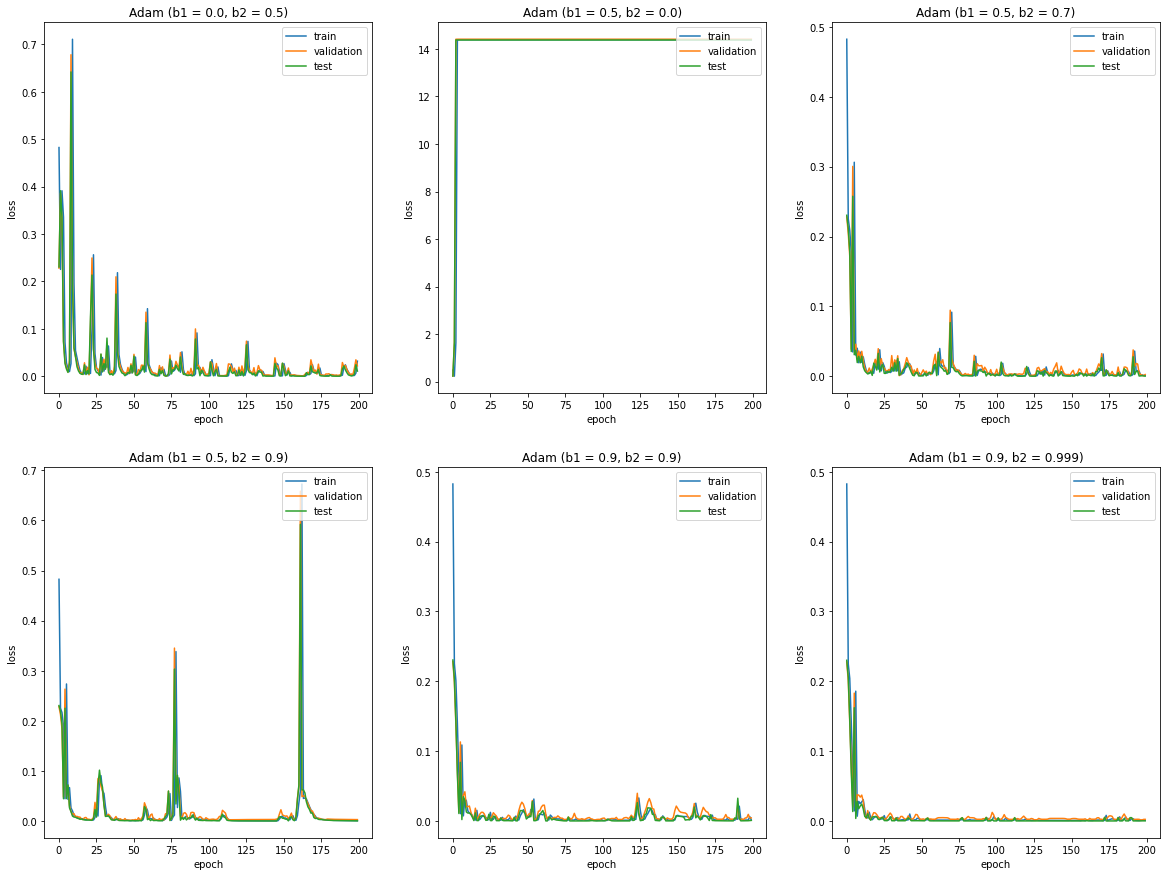

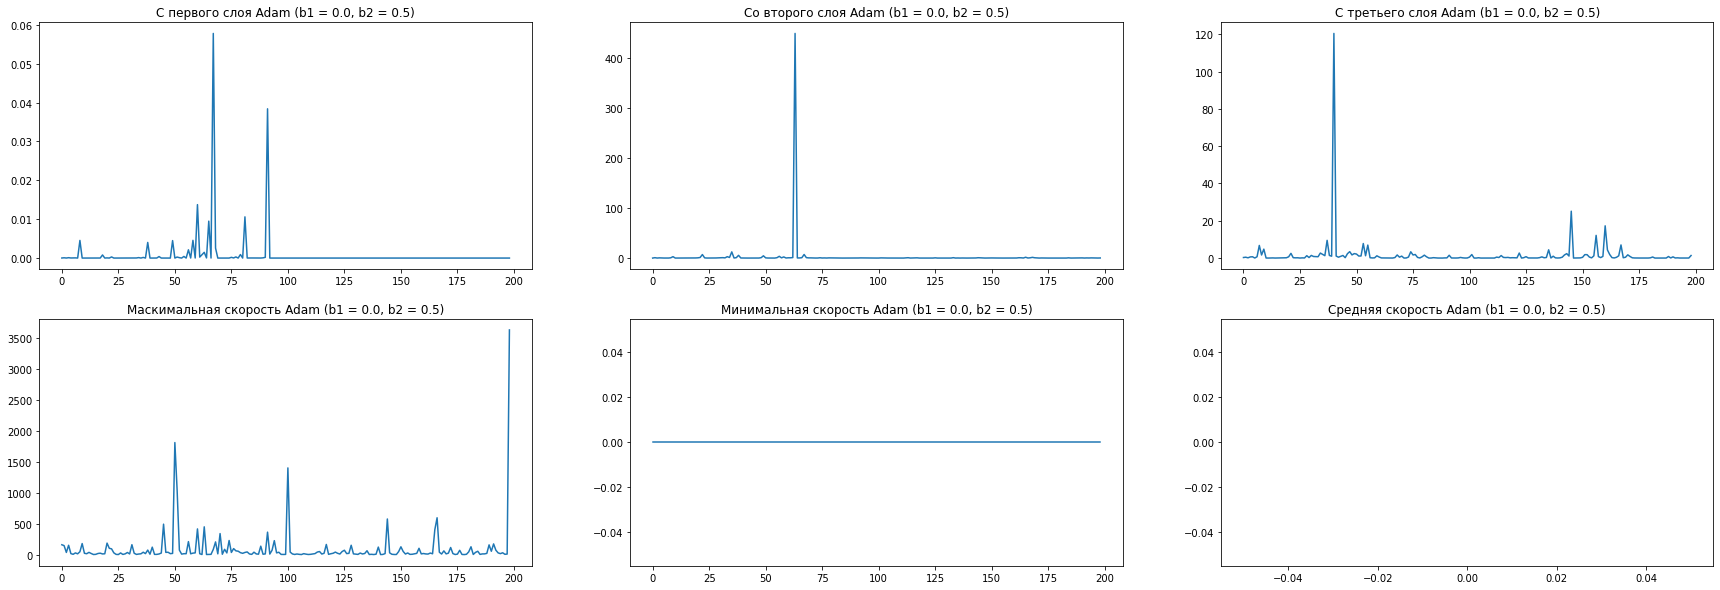

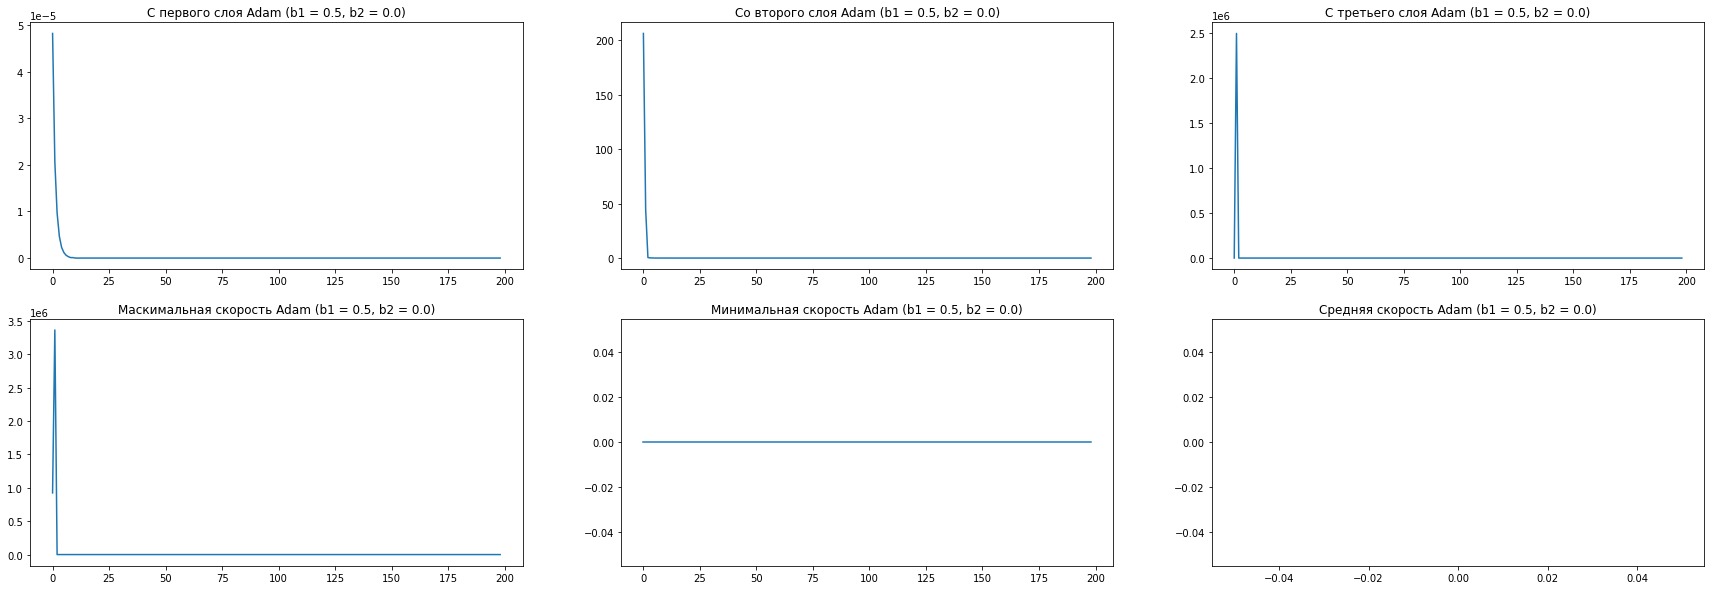

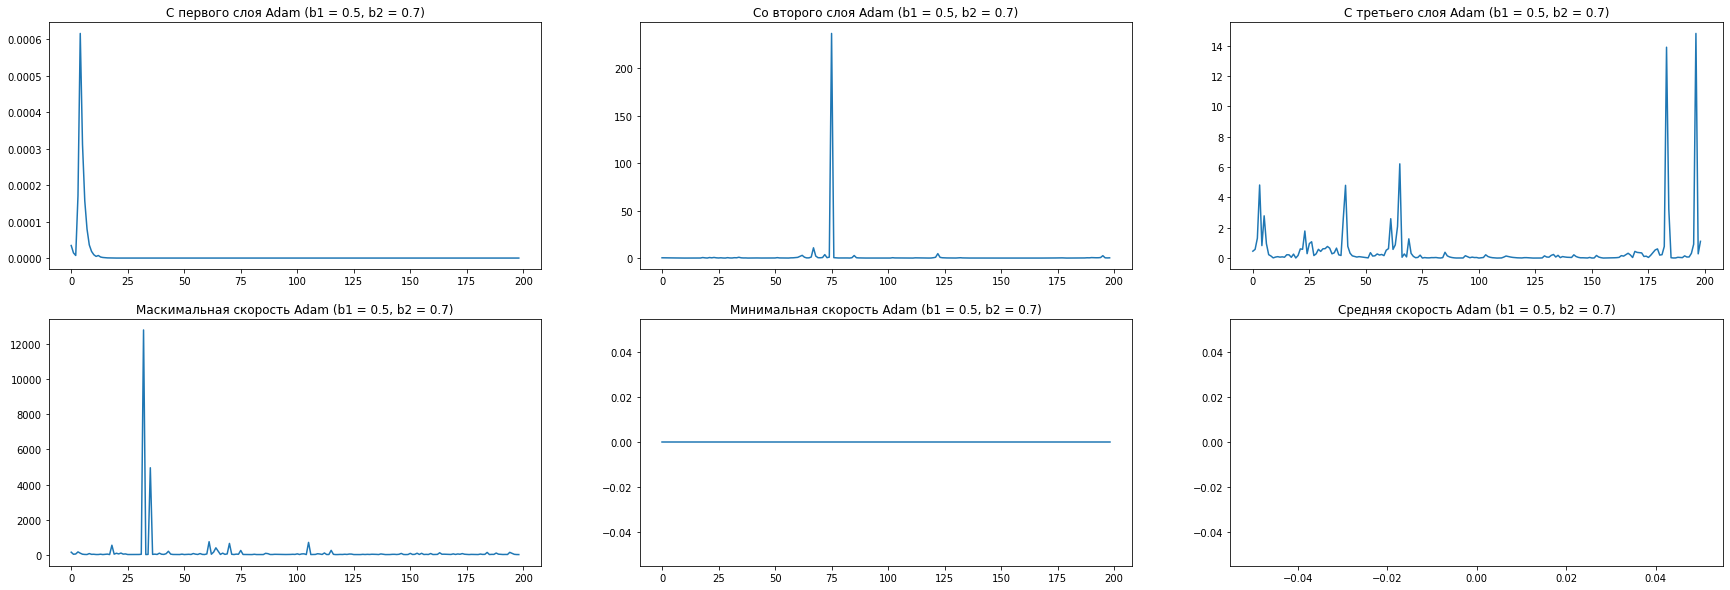

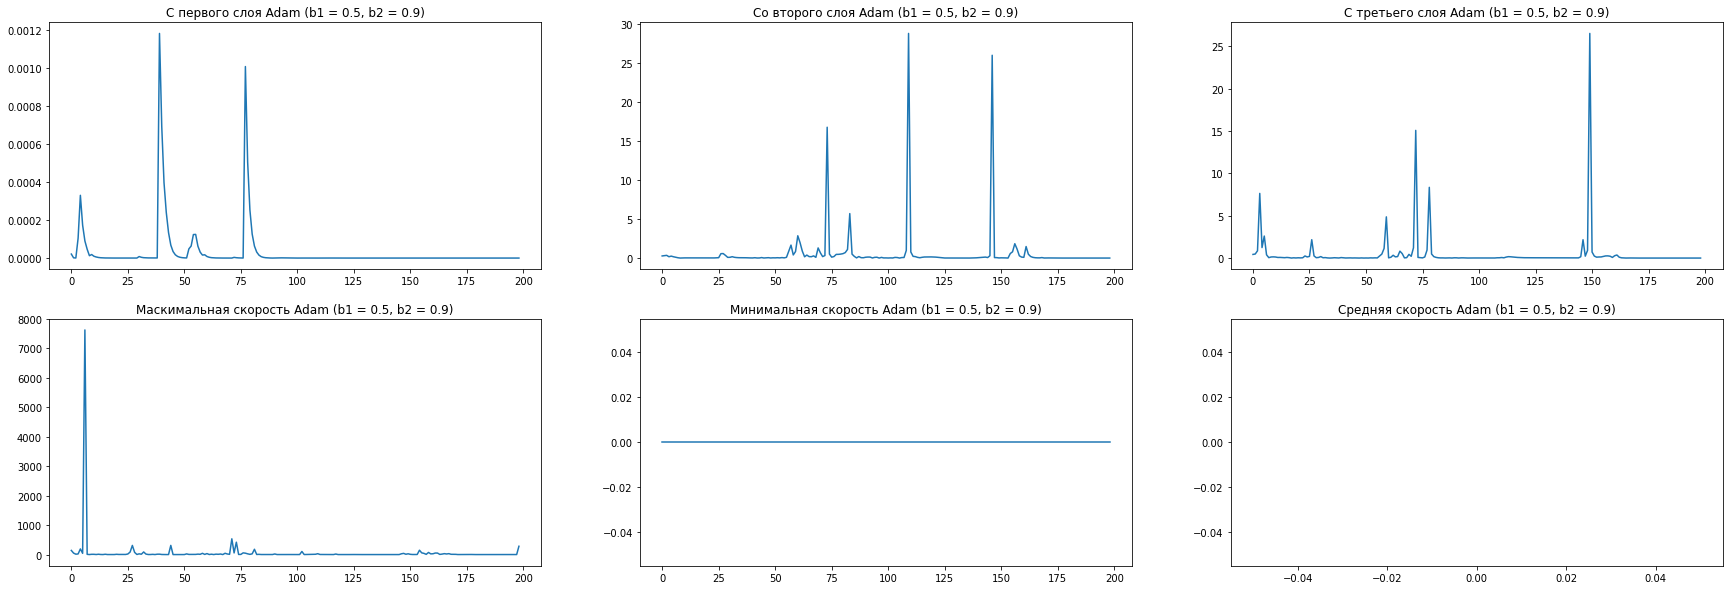

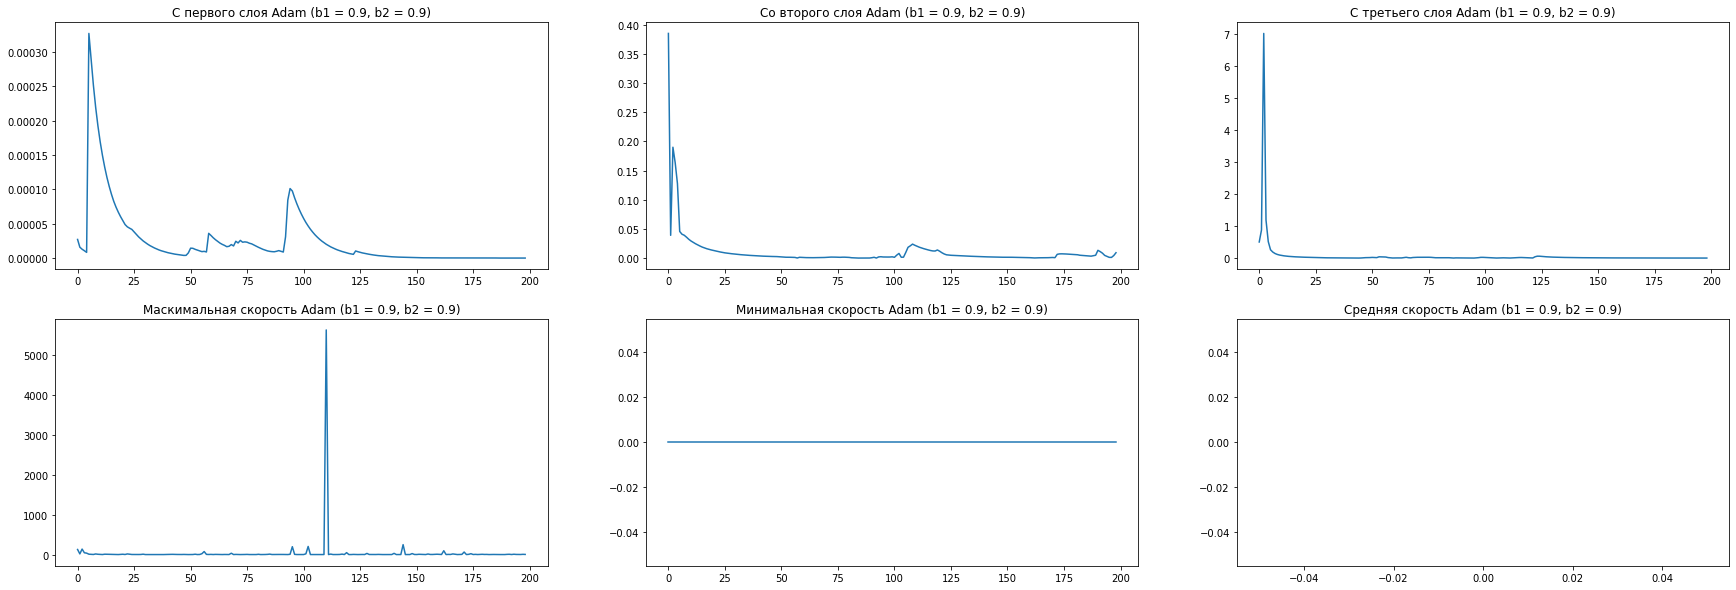

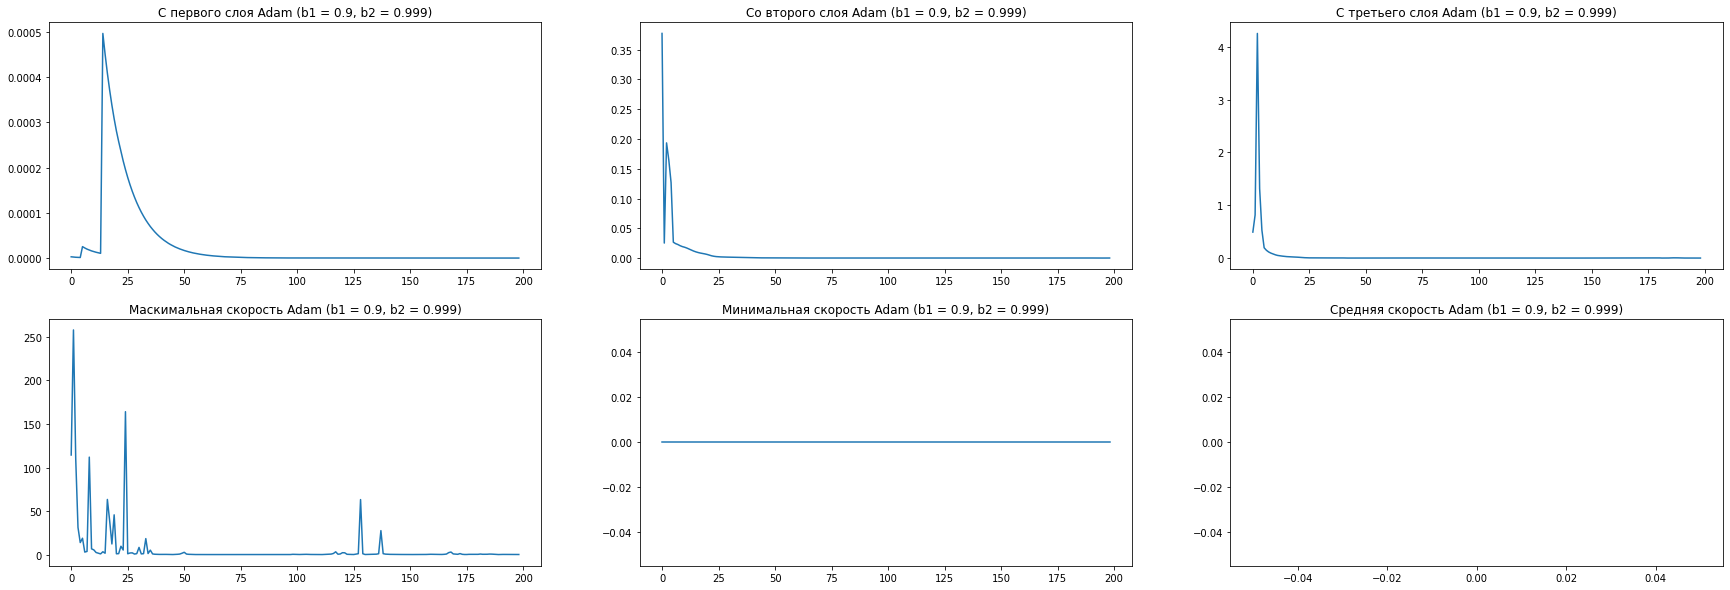

In [ ]:
b1 = [0.0, 0.5, 0.5, 0.5, 0.9, 0.9]
b2 = [0.5, 0.0, 0.7, 0.9, 0.9, 0.999]

# betas = [
#     (0.0, 0.5),
#     (0.5, 0.0),
#     (0.5, 0.7),
#     (0.5, 0.9),
#     (0.9, 0.9),
#     (0.9, 0.999)
# ]

m_name = 'Adam'
models_Adam = []
fig_, ax_ =  plt.subplots(2, 3, figsize=(20, 15))
for p in range(6):
    str_ = ' (b1 = '+ str(b1[p])+', b2 = '+ str(b2[p])+')'
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(8,)),
            layers.Dense(firstLayerAmountOfNeurons, activation=firstLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(secondLayerAmountOfNeurons, activation=secondLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(thirdLayerAmountOfNeurons, activation=thirdLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(2, activation="softmax", kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
        ]
    )
    epochs = 200
    weights_history = []
    loss = []
    val_loss = []
    test_loss = []
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.1, beta_1 = b1[p], beta_2 = b2[p]), metrics=['accuracy'])
    for i in range(epochs):
        fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_data=(x_val, y_val), verbose = 0)
        weights_history.append(model.get_weights())
        loss.append(fit.history['loss'][0])
        val_loss.append(fit.history['val_loss'][0])
        test_loss.append(model.evaluate(x_test, y_test, verbose = 0)[0])
    hh = p // 3
    ss = p % 3
    ax_[hh, ss].plot(loss);
    ax_[hh, ss].plot(val_loss);
    ax_[hh, ss].plot(test_loss);
    ax_[hh, ss].set_title(m_name + str_)
    ax_[hh, ss].set_ylabel('loss')
    ax_[hh, ss].set_xlabel('epoch')
    ax_[hh, ss].legend(['train', 'validation', 'test'], loc='upper right')
    weights_changes = []
    for i in range(epochs - 1):
        weights_changes.append([])
        for j in range(len(weights_history[0])):
            weights_changes[-1].append(abs((weights_history[i + 1][j] - weights_history[i][j])/weights_history[i][j]))
            weight1 = []
    weight2 = []
    weight3 = []
    max_w = []
    min_w = []
    mean_w = []
    for i in weights_changes:
        weight1.append(i[0][5][6])
        weight2.append(i[2][8][3])
        weight3.append(i[4][8][0])
        max_ = i[0][0][0]
        min_ = i[0][0][0]
        sum_ = 0
        for j in i:
            h = np.asarray(j)
            if max_ < h.max():
                max_ = h.max()
            if min_ > h.min():
                min_ = h.min()
            sum_ += h.sum()
        max_w.append(max_)
        min_w.append(min_)
        mean_w.append(sum_/821)
    fig, ax =  plt.subplots(2, 3, figsize=(30, 10))
    ax[0, 0].plot(weight1);
    ax[0, 0].title.set_text('С первого слоя ' + m_name + str_)
    ax[0, 1].plot(weight2);
    ax[0, 1].title.set_text('Со второго слоя ' + m_name + str_)
    ax[0, 2].plot(weight3);
    ax[0, 2].title.set_text('С третьего слоя ' + m_name + str_)
    ax[1, 0].plot(max_w);
    ax[1, 0].title.set_text('Маскимальная скорость ' + m_name + str_)
    ax[1, 1].plot(min_w);
    ax[1, 1].title.set_text('Минимальная скорость ' + m_name + str_)
    ax[1, 2].plot(mean_w);
    ax[1, 2].title.set_text('Средняя скорость ' + m_name + str_)
    print('Loss на обучающей выборке ' + m_name + str_, model.evaluate(x_train, y_train, verbose=0)[0])
    print('Loss на тестовой выборке ' + m_name + str_, model.evaluate(x_test, y_test, verbose = 0)[0])
    models_Adam.append(model)
plt.show()
    

# 4.8 Rprop

### Этот 


Main information

[ALGORITHM] RPROP

[OPTION] decrease_factor = 0.5
[OPTION] increase_factor = 1.2
[OPTION] loss = mse
[OPTION] maxstep = 10
[OPTION] minstep = 0.001
[OPTION] regularizer = None
[OPTION] show_epoch = 30
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-29:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 60.71 seconds


#1 : [13 sec] train: 1.189148, valid: 1.007570
#30 : [4 ms] train: 0.075210, valid: 0.076440


#60 : [4 ms] train: 0.061539, valid: 0.063415
#90 : [4 ms] train: 0.060636, valid: 0.063042


#120 : [4 ms] train: 0.060525, valid: 0.062876
#150 : [4 ms] train: 0.060475, valid: 0.062818


#180 : [4 ms] train: 0.060475, valid: 0.062818
#210 : [5 ms] train: 0.060475, valid: 0.062818


#240 : [5 ms] train: 0.060475, valid: 0.062818
#270 : [4 ms] train: 0.060475, valid: 0.062818


#300 : [3 ms] train: 0.060475, valid: 0.062818


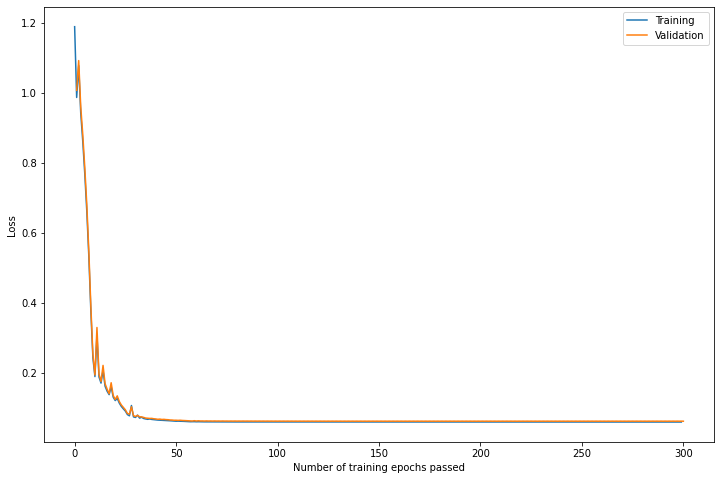

Train error: 0.060466386 Test error: 0.06752983


In [68]:
epochs = 300
network = join(
    Input(4), 
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(5, weight = XavierNormal(seed = 15)),
    Linear(1, weight = XavierNormal(seed = 15)),
)
optimizer_rprop = algorithms.RPROP(network,
                            loss = 'mse', 
                            regularizer = None,
                            show_epoch = epochs//10,
                            verbose = True) 
optimizer_rprop.train(_data_train_x, _data_train_y, _data_validation_x, _data_validation_y, epochs = epochs)
optimizer_rprop.plot_errors()
print("Train error:", optimizer_rprop.score(_data_train_x, _data_train_y), "Test error:", optimizer_rprop.score(_data_test_x, _data_test_y))

### Rprop optimizer class

In [ ]:
from keras import backend as K

class RProp(keras.optimizers.Optimizer):
    def __init__(self, init_alpha=0.01, scale_up=1.2, scale_down=0.5, min_alpha=0.00001, max_alpha=50., **kwargs):
        super(RProp_, self).__init__(**kwargs)
        self.init_alpha = K.variable(init_alpha, name='init_alpha')
        self.scale_up = K.variable(scale_up, name='scale_up')
        self.scale_down = K.variable(scale_down, name='scale_down')
        self.min_alpha = K.variable(min_alpha, name='min_alpha')
        self.max_alpha = K.variable(max_alpha, name='max_alpha')

    def get_updates(self, params, loss):
        grads = self.get_gradients(loss, params)
        shapes = [K.get_variable_shape(p) for p in params]
        alphas = [K.variable(K.ones(shape) * self.init_alpha) for shape in shapes]
        old_grads = [K.zeros(shape) for shape in shapes]
        self.weights = alphas + old_grads
        self.updates = []

        for p, grad, old_grad, alpha in zip(params, grads, old_grads, alphas):
            grad = K.sign(grad)
            new_alpha = K.switch(
                K.greater(grad * old_grad, 0),
                K.minimum(alpha * self.scale_up, self.max_alpha),
                K.switch(K.less(grad * old_grad, 0),K.maximum(alpha * self.scale_down, self.min_alpha),alpha)    
            )

            grad = K.switch(K.less(grad * old_grad, 0),K.zeros_like(grad),grad)
            new_p = p - grad * new_alpha 

            # Apply constraints.
            if getattr(p, 'constraint', None) is not None:
                new_p = p.constraint(new_p)
            self.updates.append(K.update(p, new_p))
            self.updates.append(K.update(alpha, new_alpha))
            self.updates.append(K.update(old_grad, grad))

        return self.updates

    def get_config(self):
        config = {
            'init_alpha': float(K.get_value(self.init_alpha)),
            'scale_up': float(K.get_value(self.scale_up)),
            'scale_down': float(K.get_value(self.scale_down)),
            'min_alpha': float(K.get_value(self.min_alpha)),
            'max_alpha': float(K.get_value(self.max_alpha)),
        }
        base_config = super(iRprop_, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

ModuleNotFoundError: ignored

### Rprop model

In [ ]:
m_name = 'RProp'
str_ = ''
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(18,)),
        layers.Dense(20, activation="sigmoid"),
        layers.Dense(20, activation="sigmoid"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
epochs = 200
weights_history = []
loss = []
val_loss = []
test_loss = []
model.compile(loss='binary_crossentropy', optimizer=RProp(), metrics=['accuracy'])
for i in range(epochs):
    fit = model.fit(X_train, y_train, batch_size=None, epochs=1, validation_data=(X_val, y_val), verbose = 0)
    weights_history.append(model.get_weights())
    loss.append(fit.history['loss'][0])
    val_loss.append(fit.history['val_loss'][0])
    test_loss.append(model.evaluate(X_test, y_test, verbose = 0)[0])
plt.plot(loss);
plt.plot(val_loss);
plt.plot(test_loss)
plt.title(m_name + str_)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'test'], loc='upper right')
weights_changes = []
for i in range(epochs - 1):
    weights_changes.append([])
    for j in range(len(weights_history[0])):
        weights_changes[-1].append(abs((weights_history[i + 1][j] - weights_history[i][j])/weights_history[i][j]))
        weight1 = []
weight2 = []
weight3 = []
max_w = []
min_w = []
mean_w = []
for i in weights_changes:
    weight1.append(i[0][5][6])
    weight2.append(i[2][8][3])
    weight3.append(i[4][8][0])
    max_ = i[0][0][0]
    min_ = i[0][0][0]
    sum_ = 0
    for j in i:
        h = np.asarray(j)
        if max_ < h.max():
            max_ = h.max()
        if min_ > h.min():
            min_ = h.min()
        sum_ += h.sum()
    max_w.append(max_)
    min_w.append(min_)
    mean_w.append(sum_/821)
fig, ax =  plt.subplots(2, 3, figsize=(30, 10))
ax[0, 0].plot(weight1);
ax[0, 0].title.set_text('С первого слоя ' + m_name + str_)
ax[0, 1].plot(weight2);
ax[0, 1].title.set_text('Со второго слоя ' + m_name + str_)
ax[0, 2].plot(weight3);
ax[0, 2].title.set_text('Со выходного слоя ' + m_name + str_)
ax[1, 0].plot(max_w);
ax[1, 0].title.set_text('Маскимальная скорость ' + m_name + str_)
ax[1, 1].plot(min_w);
ax[1, 1].title.set_text('Минимальная скорость ' + m_name + str_)
ax[1, 2].plot(mean_w);
ax[1, 2].title.set_text('Средняя скорость ' + m_name + str_)
print('Loss на обучающей выборке ' + m_name + str_, model.evaluate(X_train, y_train, verbose=0)[0])
print('Loss на тестовой выборке ' + m_name + str_, model.evaluate(X_test, y_test, verbose = 0)[0])
model_Rprop = model


NameError: ignored

# 4.9 Методы Левенберга-Маркардта и BFGS

### Метод Левенберга-Маркардта

					Метод Левенберга-Маркардта


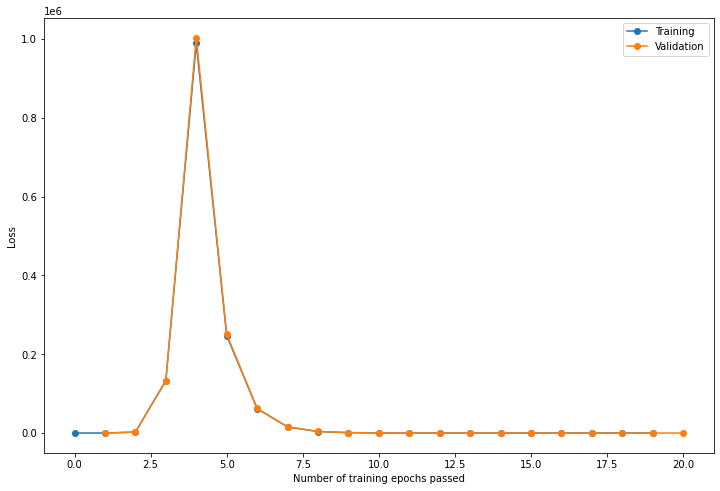

Train error: 0.5605579 Test error: 0.58035606


In [69]:
epochs = 20
network = join(
    Input(4), 
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(5, weight = XavierNormal(seed = 15)),
    Linear(1, weight = XavierNormal(seed = 15)),
)
optimizer_LM = algorithms.LevenbergMarquardt(network,
                                loss = 'mse',
                                show_epoch = epochs//10) 
optimizer_LM.train(x_train, y_train, x_val, y_val, epochs = epochs)
print('\t' * 5 + 'Метод Левенберга-Маркардта')
optimizer_LM.plot_errors()
print("Train error:", optimizer_LM.score(x_train, y_train), "Test error:", optimizer_LM.score(x_test, y_test))

### BFGS

					BFGS


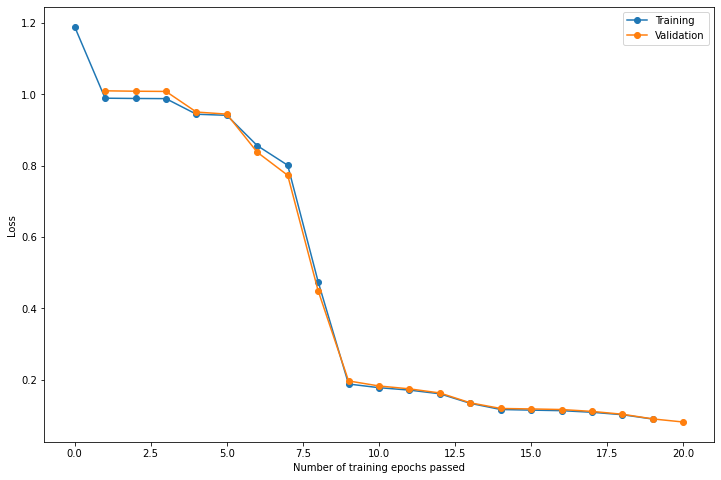

Train error: 0.08176353 Test error: 0.08953712


In [70]:
epochs = 20
network = join(
    Input(4), 
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(5, weight = XavierNormal(seed = 15)),
    Linear(1, weight = XavierNormal(seed = 15)),
)
optimizer_BFGS = algorithms.QuasiNewton(network,
                                loss = 'mse',
                                show_epoch = epochs//10) 
optimizer_BFGS.train(x_train, y_train, x_val, y_val, epochs = epochs)
print('\t' * 5 + 'BFGS')
optimizer_BFGS.plot_errors()
print("Train error:", optimizer_BFGS.score(x_train, y_train), "Test error:", optimizer_BFGS.score(x_test, y_test))

# 4.10 Исследование метода стохастического градиента 

### SGD 

In [ ]:
batch_sizes = [
    1,
    20,
    100,
    batch_size
]

amountOfEpochs = [5, 50, 100, 300]
lr = 0.1

errors_SGD = dict()
weightsHistorySGD = dict()
j = 0

for bs in batch_sizes:

    errors_SGD[bs] = {
        'Train':[], 
        'Validation':[], 
        'Test': [], 
        'Epoch':[]
    }

    inputLayer = tf.keras.layers.Input(shape=(14,))

    firstHiddenLayer = tf.keras.layers.Dense(
        firstLayerAmountOfNeurons,
        activation        =firstLayerActivation, 
        kernel_initializer=kernel_initializer, 
        bias_initializer  =bias_initializer,
        name              ='First_Hidden'
    )(inputLayer)

    secondHiddenLayer = tf.keras.layers.Dense(
        secondLayerAmountOfNeurons,
        activation        =secondLayerActivation, 
        kernel_initializer=kernel_initializer, 
        bias_initializer  =bias_initializer,
        name              ='Second_Hidden'
    )(firstHiddenLayer)

    # thirdHiddenLayer = tf.keras.layers.Dense(
    #     thirdLayerAmountOfNeurons,
    #     activation        =thirdLayerActivation, 
    #     kernel_initializer=kernel_initializer, 
    #     bias_initializer  =bias_initializer,
    #     name              ='Third_Hidden'
    # )(secondHiddenLayer)

    outputLayer = tf.keras.layers.Dense(
        2, 
        activation=tf.keras.activations.softmax,
        kernel_initializer=kernel_initializer, 
        bias_initializer  =bias_initializer,
        name='Output'
    )(secondHiddenLayer)

    model = keras.Model(inputs=inputLayer, outputs=outputLayer)

    # model.load_weights('./weights/weight_1')
    model.compile(
        optimizer=tf.keras.optimizers.SGD(
            lr=lr
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy()
        ]
    )
    # model.summary()
    currentEpoch = 1
    weightsHistorySGD[bs] = []
    
    while currentEpoch < amountOfEpochs[j]:
        historyOfModel = model.fit(
            x              =_data_train_x, 
            y              =_data_train_y, 
            epochs         =1, 
            validation_data=(_data_validation_x, _data_validation_y),
            batch_size=bs
        )
        
        weightsHistorySGD[bs].append(model.get_weights())
        
        errors_SGD[bs]['Train'     ].append(model.evaluate(_data_train_x, _data_train_y, batch_size=batch_size, verbose=0))
        errors_SGD[bs]['Validation'].append(model.evaluate(_data_validation_x, _data_validation_y, batch_size=batch_size, verbose=0))
        errors_SGD[bs]['Test'      ].append(model.evaluate(_data_test_x, _data_test_y, batch_size=batch_size, verbose=0))
        errors_SGD[bs]['Epoch'     ].append(currentEpoch)
        
        currentEpoch += 1
    
    j += 1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 14)                0         
_________________________________________________________________
First_Hidden (Dense)         (None, 20)                300       
_________________________________________________________________
Second_Hidden (Dense)        (None, 20)                420       
_________________________________________________________________
Output (Dense)               (None, 2)                 42        
Total params: 762
Trainable params: 762
Non-trainable params: 0
_________________________________________________________________
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 31s 2ms/sample - loss: 0.3850 - binary_accuracy: 0.8179 - val_loss: 0.3403 - val_binary_accuracy: 0.8455
Train on 19536 samples, validate on 9768 samples
19536/19536 [=============

Train loss: 	0.33328813314437866
Test loss: 	0.3403403162956238

Train loss: 	0.31969571113586426
Test loss: 	0.3222265839576721

Train loss: 	0.3227679431438446
Test loss: 	0.3241634666919708

Train loss: 	0.5509285926818848
Test loss: 	0.5570262670516968


Consider using a TensorFlow optimizer from `tf.train`.


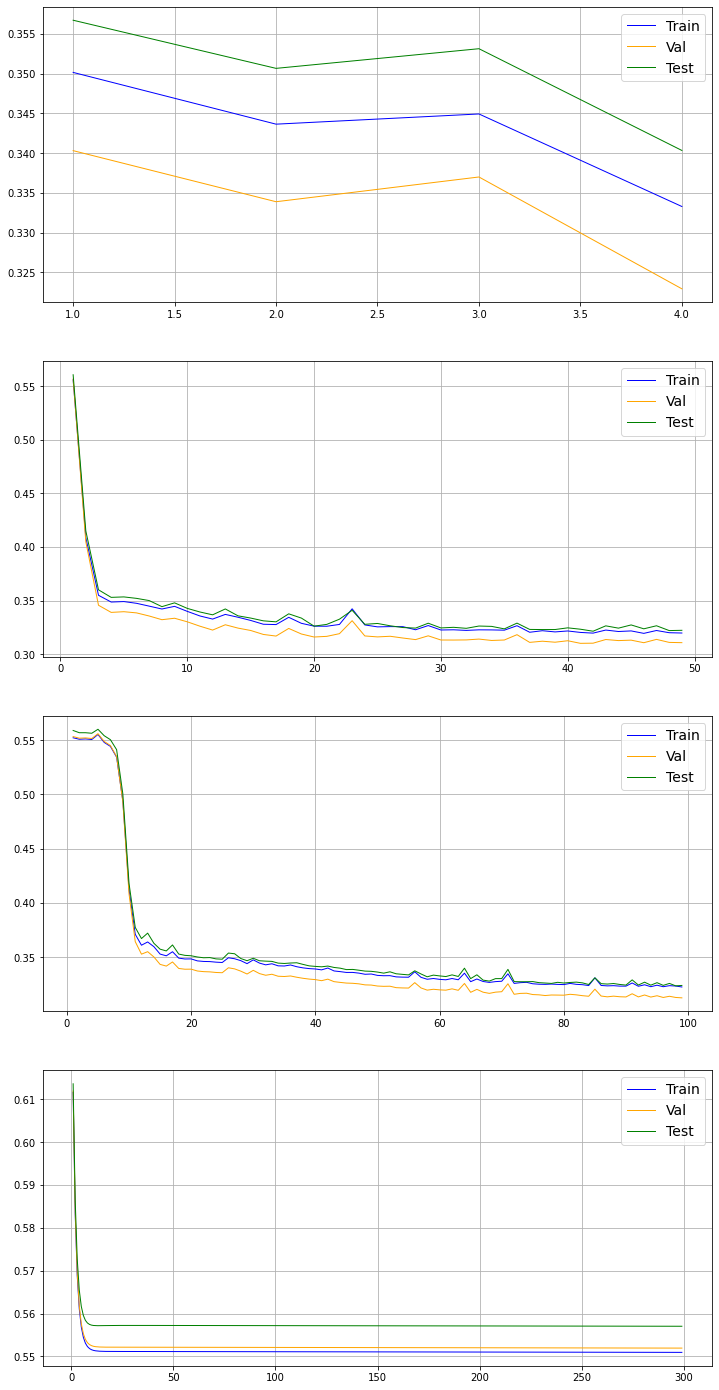

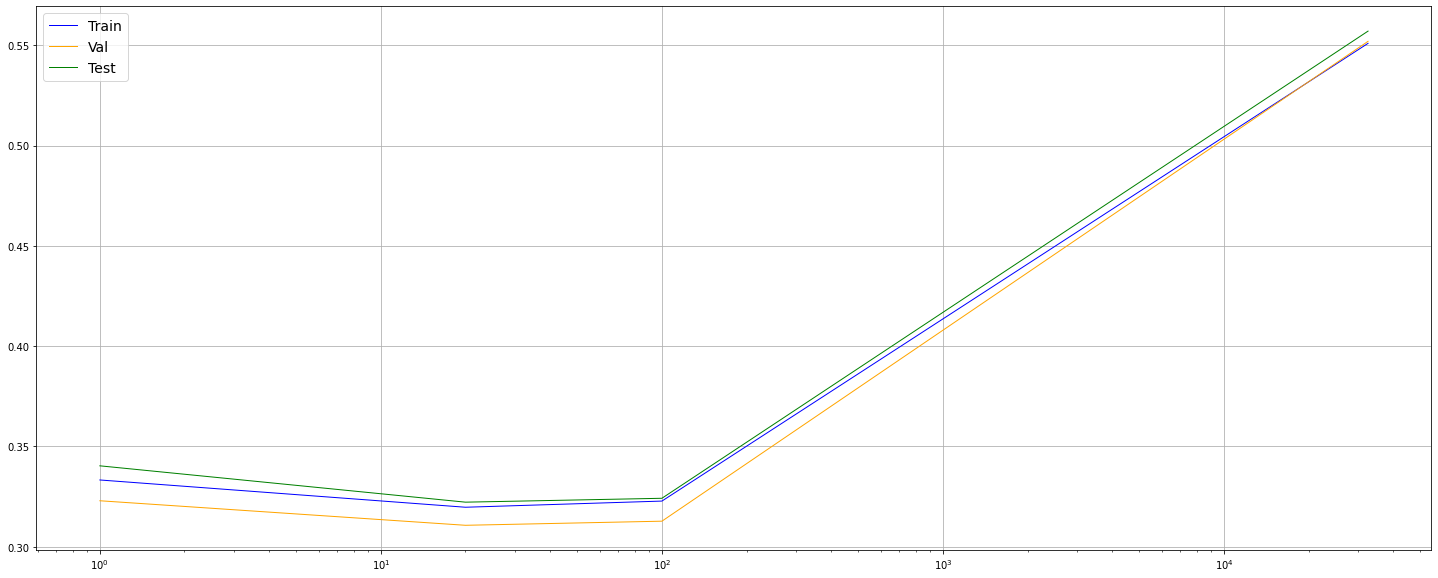

In [ ]:
fig20, ax20 = plt.subplots(len(batch_sizes), 1)
fig20.set_size_inches((12, 25))

for i in range(len(batch_sizes)):
    ax20[i].plot(errors_SGD[batch_sizes[i]]['Epoch'], np.array(errors_SGD[batch_sizes[i]]['Train'])[:, 0],      label='Train',      linewidth=1, color="blue")
    ax20[i].plot(errors_SGD[batch_sizes[i]]['Epoch'], np.array(errors_SGD[batch_sizes[i]]['Validation'])[:, 0], label='Val',        linewidth=1, color="orange")
    ax20[i].plot(errors_SGD[batch_sizes[i]]['Epoch'], np.array(errors_SGD[batch_sizes[i]]['Test'])[:, 0],       label='Test',       linewidth=1, color="green")
    ax20[i].legend(fontsize=14)
    ax20[i].grid()
    train_loss = np.array(errors_SGD[batch_sizes[i]]['Train'])[-1, 0]
    test_loss = np.array(errors_SGD[batch_sizes[i]]['Test'])[-1, 0]
    print(f'Train loss: \t{train_loss}')
    print(f'Test loss: \t{test_loss}\n')

plt.savefig(f'./Graphs/SDG_batch_size={batch_sizes[i]}_lr={lr}_epochs={amountOfEpochs}_1.png', dpi=300)
model.save_weights(f'./weights/weight_SDG_bs={batch_sizes[i]}_1')

fig21, ax21 = plt.subplots()
fig21.set_size_inches((25, 10))

train_data_loss = []
val_data_loss   = []
test_data_loss  = []
for i in range(len(batch_sizes)):
    train_data_loss.append(np.array(errors_SGD[batch_sizes[i]]['Train'])[-1, 0])
    val_data_loss.append(  np.array(errors_SGD[batch_sizes[i]]['Validation'])[-1, 0])
    test_data_loss.append( np.array(errors_SGD[batch_sizes[i]]['Test'])[-1, 0])

ax21.set_xscale('log')
ax21.plot(batch_sizes, train_data_loss, label='Train', linewidth=1, color="blue")
ax21.plot(batch_sizes, val_data_loss,   label='Val',   linewidth=1, color="orange")
ax21.plot(batch_sizes, test_data_loss,  label='Test',  linewidth=1, color="green")
ax21.legend(fontsize=14)
ax21.grid()

plt.savefig(f'./Graphs/SDG_batch_size_loss_dep_epochs={amountOfEpochs}_1.png', dpi=300)


### Другой SGD


Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 1
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-32:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 71.01 seconds


Time: 0:00:00 |  5%|#                            | ETA:  0:00:02 | loss: 0.0179

#1 : [22 sec] train: 0.184357, valid: 0.100620


Time: 0:00:00 |  5%|#                            | ETA:  0:00:02 | loss: 0.0234

#2 : [3 sec] train: 0.153409, valid: 0.086925


Time: 0:00:00 |  5%|#                            | ETA:  0:00:02 | loss: 0.0201

#3 : [3 sec] train: 0.142636, valid: 0.083658


Time: 0:00:00 |  5%|#                            | ETA:  0:00:03 | loss: 0.0174

#4 : [3 sec] train: 0.139143, valid: 0.082821


Time: 0:00:00 |  5%|#                            | ETA:  0:00:02 | loss: 0.0161

#5 : [4 sec] train: 0.138159, valid: 0.082559


Time: 0:00:00 |  5%|#                            | ETA:  0:00:02 | loss: 0.0153

#6 : [4 sec] train: 0.138086, valid: 0.082626


Time: 0:00:00 |  5%|#                            | ETA:  0:00:03 | loss: 0.0147

#7 : [4 sec] train: 0.138042, valid: 0.082981


Time: 0:00:00 |  5%|#                            | ETA:  0:00:02 | loss: 0.0143

#8 : [4 sec] train: 0.137165, valid: 0.083472


Time: 0:00:00 |  5%|#                            | ETA:  0:00:02 | loss: 0.0141

#9 : [4 sec] train: 0.135452, valid: 0.083916


#10 : [4 sec] train: 0.133704, valid: 0.084210
					GD (mb = 1)


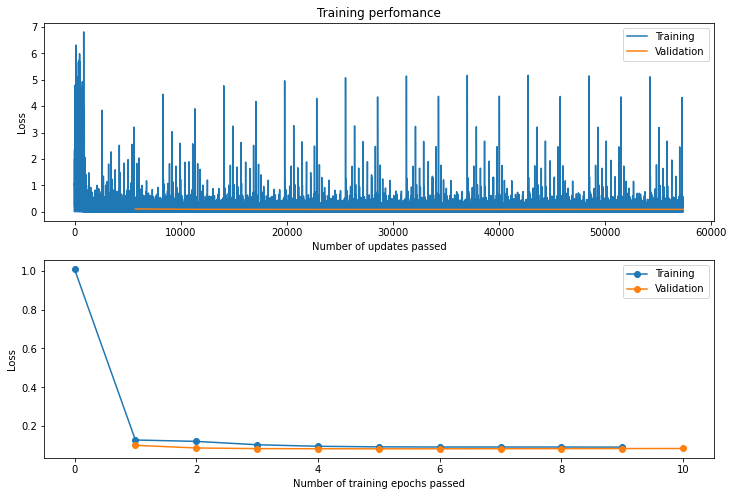

Train error: 0.0799943877429497 Test error: 0.08755278935760943

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 20
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 10
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-33:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 80.15 seconds


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#1 : [20 sec] train: 1.070824, valid: 0.996520


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#10 : [250 ms] train: 0.107180, valid: 0.066570


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#20 : [255 ms] train: 0.105643, valid: 0.064169


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#30 : [237 ms] train: 0.104222, valid: 0.062681


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#40 : [245 ms] train: 0.101549, valid: 0.062258


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#50 : [231 ms] train: 0.098832, valid: 0.062348


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [233 ms] train: 0.096700, valid: 0.062519


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#70 : [236 ms] train: 0.095142, valid: 0.062654


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#80 : [233 ms] train: 0.093999, valid: 0.062747


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#90 : [241 ms] train: 0.093131, valid: 0.062806


#100 : [228 ms] train: 0.092433, valid: 0.062838
					GD (mb = 20)


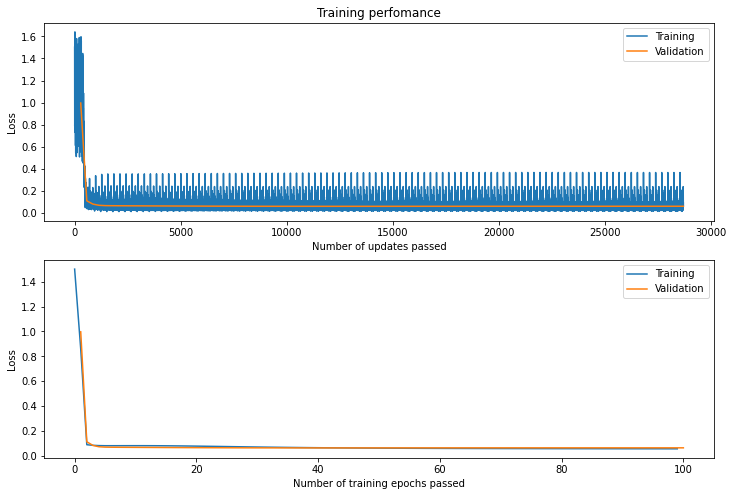

Train error: 0.059935114524921056 Test error: 0.06687707443078027

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 100
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 20
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-34:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

[TENSORFLOW] Initialization finished successfully. It took 87.41 seconds


#1 : [22 sec] train: 0.882740, valid: 1.018458


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#20 : [62 ms] train: 0.066923, valid: 0.073430


#40 : [60 ms] train: 0.066686, valid: 0.068574


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#60 : [62 ms] train: 0.067136, valid: 0.067865


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#80 : [58 ms] train: 0.067486, valid: 0.067751


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#100 : [86 ms] train: 0.068017, valid: 0.067865


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#120 : [65 ms] train: 0.068567, valid: 0.067895


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#140 : [66 ms] train: 0.069039, valid: 0.067830


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#160 : [64 ms] train: 0.069417, valid: 0.067734


Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

#180 : [55 ms] train: 0.069707, valid: 0.067633


#200 : [65 ms] train: 0.069926, valid: 0.067530
					GD (mb = 100)


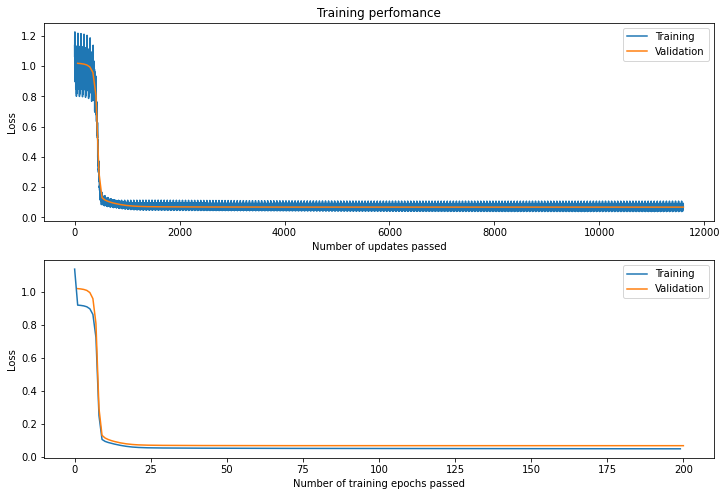

Train error: 0.0641321374979584 Test error: 0.07116238110249624

Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 5740
[OPTION] loss = mse
[OPTION] regularizer = None
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/linear-35:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 95.75 seconds


#1 : [25 sec] train: 1.189148, valid: 1.070383


#50 : [4 ms] train: 0.987269, valid: 1.007536


#100 : [4 ms] train: 0.985798, valid: 1.006038


#150 : [4 ms] train: 0.983545, valid: 1.003740


#200 : [4 ms] train: 0.979819, valid: 0.999933


#250 : [4 ms] train: 0.973024, valid: 0.992977


#300 : [4 ms] train: 0.958834, valid: 0.978405


#350 : [9 ms] train: 0.922599, valid: 0.941015


#400 : [4 ms] train: 0.799775, valid: 0.813535


#450 : [4 ms] train: 0.387328, valid: 0.390250


#500 : [4 ms] train: 0.132306, valid: 0.137783
					GD (mb = 5740)


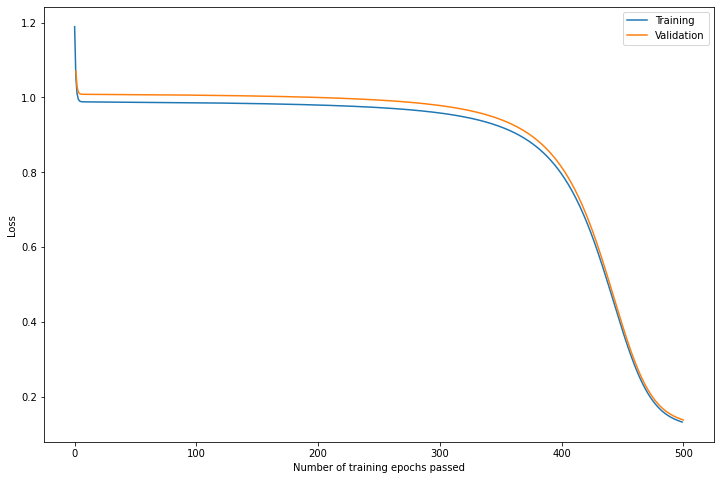

Train error: 0.13130776584148407 Test error: 0.14565840363502502


In [71]:
optimizers_mbGD = []
mb = [1, 20, 100, x_train.shape[0]]
epochs_ = [10, 100, 200, 500]
for i in range(len(mb)):
    epochs = epochs_[i]
    network = join(
    Input(4), 
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(10, weight = XavierNormal(seed = 15)),
    Sigmoid(5, weight = XavierNormal(seed = 15)),
    Linear(1, weight = XavierNormal(seed = 15)),
)
    optimizer = algorithms.GradientDescent(network, batch_size = mb[i], loss = 'mse', regularizer = None,
                                          step = 0.1, show_epoch = epochs//10, verbose = True)
    optimizer.train(x_train, y_train, x_val, y_val, epochs = epochs)
    optimizers_mbGD.append(optimizer)
    print('\t' * 5 + 'GD (mb =', str(mb[i]) + ')')
    optimizer.plot_errors()
    print("Train error:", optimizer.score(x_train, y_train), "Test error:", optimizer.score(x_test, y_test))


Main information

[ALGORITHM] GradientDescent

[OPTION] batch_size = 427
[OPTION] loss = binary_crossentropy
[OPTION] regularizer = None
[OPTION] show_epoch = 10
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] target = Tensor("placeholder/target/hard-sigmoid-5:0", shape=(?, 1), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.44 seconds
#1 : [97 ms] train: 0.752262, valid: 0.718018
#10 : [3 ms] train: 0.698429, valid: 0.687088
#20 : [2 ms] train: 0.691122, valid: 0.684521
#30 : [2 ms] train: 0.689445, valid: 0.684241
#40 : [2 ms] train: 0.688340, valid: 0.683943


#50 : [2 ms] train: 0.687757, valid: 0.683696
#60 : [2 ms] train: 0.687362, valid: 0.683451
#70 : [2 ms] train: 0.687004, valid: 0.683205
#80 : [2 ms] train: 0.686624, valid: 0.682933
#90 : [2 ms] train: 0.686225, valid: 0.682612
#100 : [2 ms] train: 0.685860, valid: 0.682299
					GD (mb = 427)


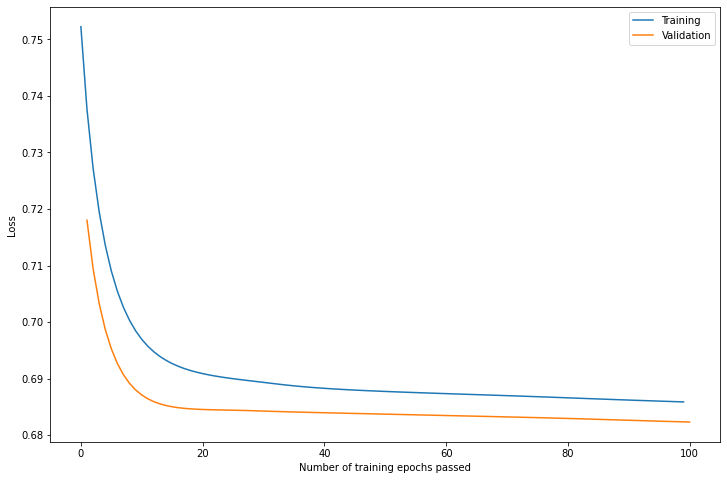

Train error: 0.6858255863189697 Test error: 0.6778435707092285


In [ ]:
# mb = [X_train.shape[0]]
# for i in range(len(mb)):
#     epochs = 100
#     network = join(
#         Input(18), 
#         Sigmoid(20, weight = XavierNormal(seed = 5)),
#         Sigmoid(20, weight = XavierNormal(seed = 5)),
#         HardSigmoid(1, weight = XavierNormal(seed = 5)),
#     )
#     optimizer = algorithms.GradientDescent(network, batch_size = mb[i], loss = 'binary_crossentropy', regularizer = None,
#                                           step = 0.1, show_epoch = epochs//10, verbose = True)
#     optimizer.train(X_train, y_train, X_val, y_val, epochs = epochs)
#     optimizers_mbGD.append(optimizer)
#     print('\t' * 5 + 'GD (mb =', str(mb[i]) + ')')
#     optimizer.plot_errors()
#     print("Train error:", optimizer.score(X_train, y_train), "Test error:", optimizer.score(X_test, y_test))

In [ ]:
print(optimizers_mbGD[2].score(X_train, y_train))
print(optimizers_mbGD[2].score(X_test, y_test))

Time: 0:00:00 |N/A%|                            | ETA:  --:--:-- | loss: ------

0.67907857783226
0.6760256886482239


# 4.11 Сравнение методов обучения

In [ ]:
method_epochs = {'GD': 200, 'GDM':200, 'NAG': 200, 'Флетчера-Ривса':100, 'Полака-Райбера':100, 'AdaGrad': 100, 'RMSProp': 100, 'AdaDelta': 200, 'Adam': 200, 'LM': 100, 'BFGS': 100, 'GD(mb)': 200}
method_train_loss = {'GD': 0.681, 'GDM':0.600, 'NAG': 0.605, 'Флетчера-Ривса':0.645, 'Полака-Райбера':0.576, 'AdaGrad': 0.529, 'RMSProp': 0.663, 'AdaDelta': 0.641, 'Adam': 0.680, 'LM': 0.179, 'BFGS': 0.205, 'GD(mb)': 0.634}
method_test_loss = {'GD': 0.675, 'GDM':0.625, 'NAG': 0.627, 'Флетчера-Ривса':0.672, 'Полака-Райбера':0.602, 'AdaGrad': 0.653, 'RMSProp': 0.661, 'AdaDelta': 0.661, 'Adam': 0.690, 'LM': 0.228, 'BFGS': 0.266, 'GD(mb)': 0.667}

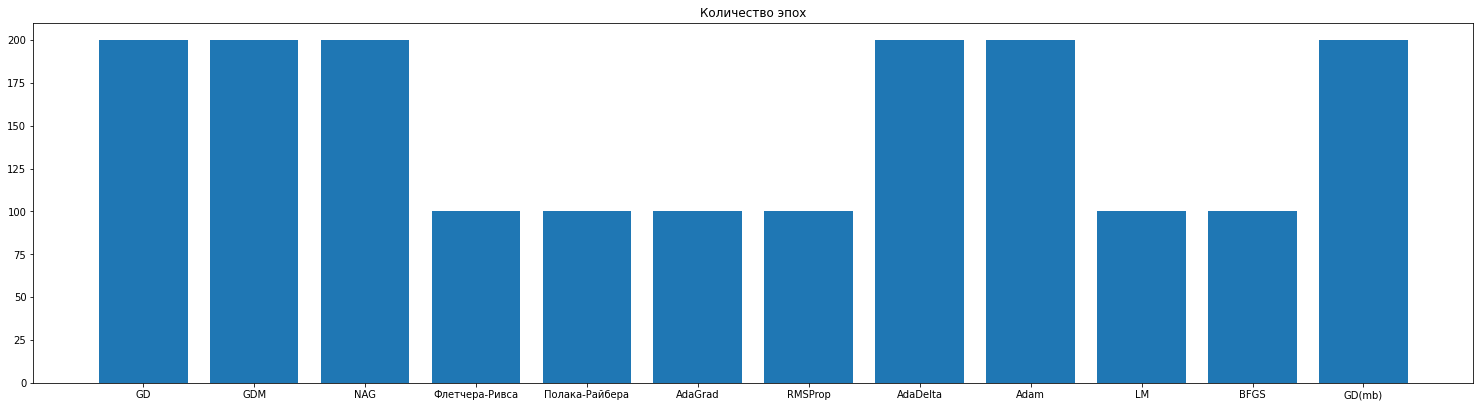

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(method_epochs.keys(), method_epochs.values());
ax.set_title('Количество эпох');

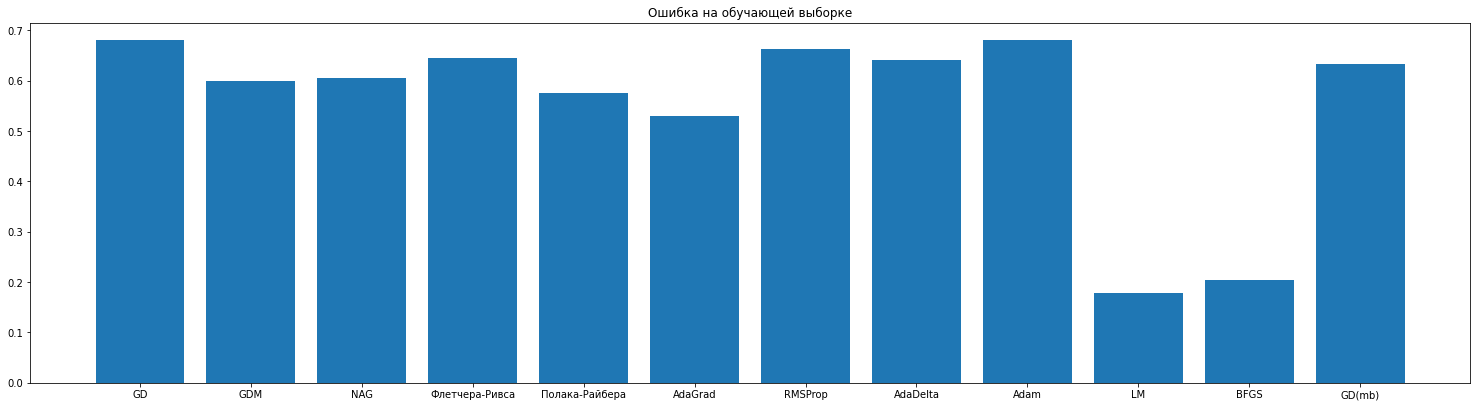

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(method_train_loss.keys(), method_train_loss.values());
ax.set_title('Ошибка на обучающей выборке');

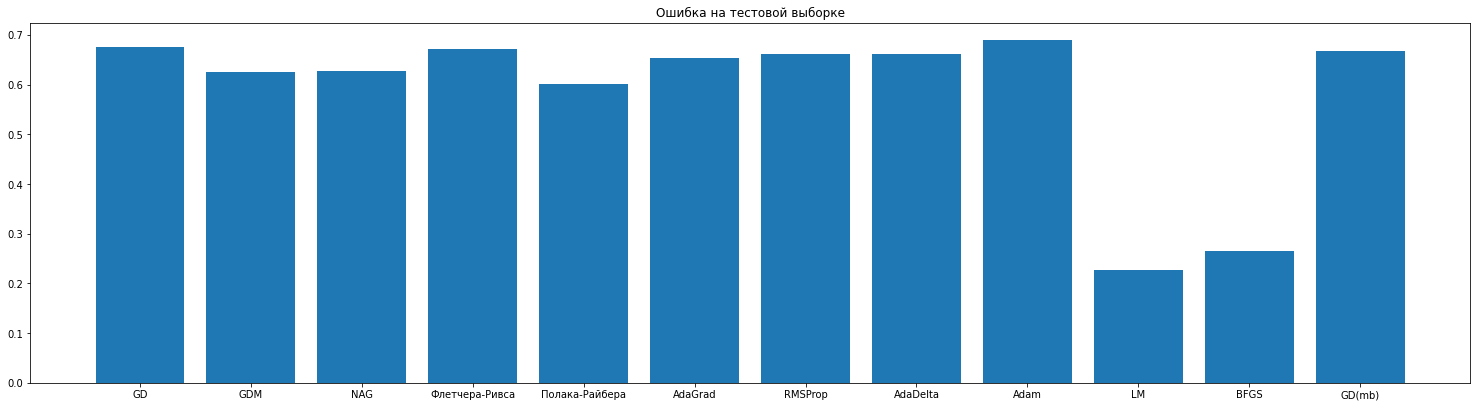

In [ ]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(method_test_loss.keys(), method_test_loss.values());
ax.set_title('Ошибка на тестовой выборке');

# 4.12 Исследование влияния способа инициализации весов на качество обучения

### а) Исследование прямого информационного потока в сети

In [ ]:
from tensorflow.keras import backend as K
sigmas = np.linspace(0.0001, 1., 10)
X = x_train
y = x_train
means_l1 = []
means_l2 = []
stds_l1 = []
stds_l2 = []
for s in sigmas:
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(14,)),
            layers.Dense(firstLayerAmountOfNeurons, activation=firstLayerActivation, kernel_initializer=keras.initializers.RandomNormal(stddev=s, seed=1)),
            layers.Dense(secondLayerAmountOfNeurons, activation=secondLayerActivation, kernel_initializer=keras.initializers.RandomNormal(stddev=s, seed=1)),
            layers.Dense(2, activation="softmax", kernel_initializer=keras.initializers.RandomNormal(stddev=s, seed=1)),
        ]
    )
    l1, l2 = K.function(model.input, [layer.output for layer in model.layers])(X[0:1])[0:2]
    l1 = np.asarray(l1)
    l2 = np.asarray(l2)
    means_l1.append(l1.mean())
    means_l2.append(l2.mean())
    stds_l1.append(l1.std())
    stds_l2.append(l2.std())

In [ ]:
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(14,)),
        layers.Dense(20, activation="sigmoid", kernel_initializer=keras.initializers.RandomNormal(stddev=(2/(14 + 20))**0.5, seed=1)),
        layers.Dense(20, activation="sigmoid", kernel_initializer=keras.initializers.RandomNormal(stddev=(2/(20 + 20))**0.5, seed=1)),
        layers.Dense(2, activation="softmax", kernel_initializer=keras.initializers.RandomNormal(stddev=(2/22)**0.5, seed=1)),
    ]
)
l1, l2 = K.function(model.input, [layer.output for layer in model.layers])(X[0:1])[0:2]
l1 = np.asarray(l1)
l2 = np.asarray(l2)
mean_l_X = [l1.mean(), l2.mean()]
std_l_X = [l1.std(), l2.std()]

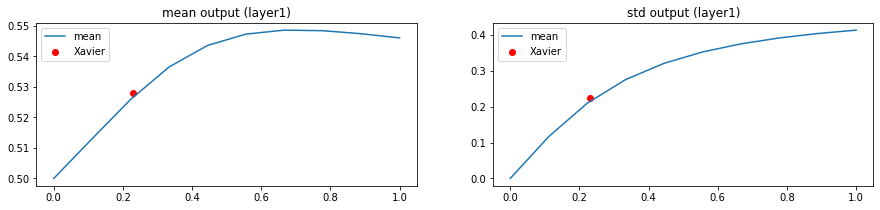

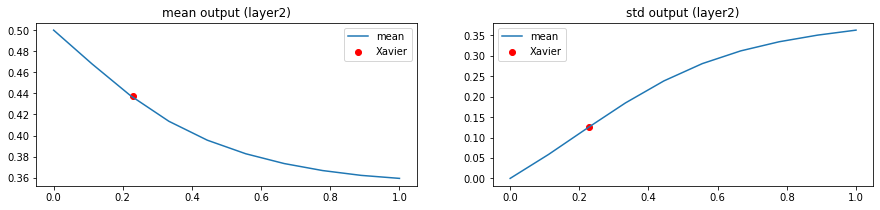

In [ ]:
l_output_mean = [means_l1, means_l2]
l_output_std = [stds_l1, stds_l2]
for i in range(1, 3):
  fig, ax = plt.subplots(1, 2, figsize=(15, 3))
  ax[0].plot(sigmas, l_output_mean[i - 1])
  ax[0].set_title('mean output (layer' + str(i) + ')')
  ax[0].scatter([(2/(18 + 20))**0.5], [mean_l_X[i - 1]], c = 'r')
  ax[0].legend(['mean', 'Xavier'])
  ax[1].plot(sigmas, l_output_std[i - 1])
  ax[1].set_title('std output (layer' + str(i) + ')')
  ax[1].scatter([(2/(18 + 20))**0.5], [std_l_X[i - 1]], c = 'r')
  ax[1].legend(['mean', 'Xavier'])

In [ ]:
from tensorflow.keras import backend as K
sigmas = np.linspace(0.0001, 1., 10)
X = x_train
y = x_train
means_l1 = []
means_l2 = []
stds_l1 = []
stds_l2 = []
for s in sigmas:
    model = keras.Sequential(
            [
                layers.InputLayer(input_shape=(14,)),
                layers.Dense(20, activation="sigmoid", kernel_initializer=keras.initializers.RandomNormal(stddev=s, seed=1)),
                layers.Dense(20, activation="sigmoid", kernel_initializer=keras.initializers.RandomNormal(stddev=s, seed=1)),
                layers.Dense(2, activation="softmax", kernel_initializer=keras.initializers.RandomNormal(stddev=s, seed=1)),
            ]
        )
    l1, l2 = K.function(model.input, [layer.output for layer in model.layers])(X[0:1])[0:2]
    l1 = np.asarray(l1)
    l2 = np.asarray(l2)
    l1_ = np.log(l1/(1-l1))
    l2_ = np.log(l2/(1-l2))
    means_l1.append(l1_.mean())
    means_l2.append(l2_.mean())
    stds_l1.append(l1_.std())
    stds_l2.append(l2_.std())

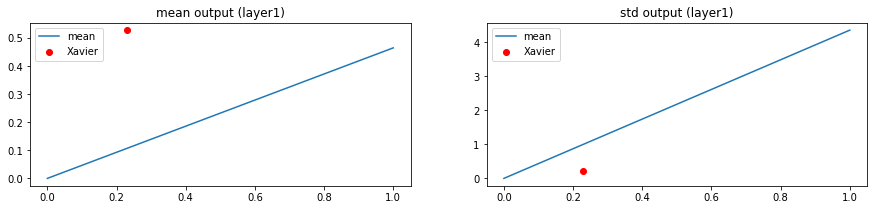

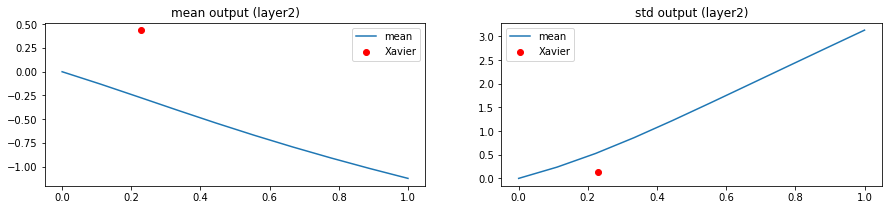

In [ ]:
l_output_mean = [means_l1, means_l2]
l_output_std = [stds_l1, stds_l2]
for i in range(1, 3):
  fig, ax = plt.subplots(1, 2, figsize=(15, 3))
  ax[0].plot(sigmas, l_output_mean[i - 1])
  ax[0].set_title('mean output (layer' + str(i) + ')')
  ax[0].scatter([(2/(18 + 20))**0.5], [mean_l_X[i - 1]], c = 'r')
  ax[0].legend(['mean', 'Xavier'])
  ax[1].plot(sigmas, l_output_std[i - 1])
  ax[1].set_title('std output (layer' + str(i) + ')')
  ax[1].scatter([(2/(18 + 20))**0.5], [std_l_X[i - 1]], c = 'r')
  ax[1].legend(['mean', 'Xavier'])

# 4.14 Исследование различных архитектур нейронных сетей

### а) Исследование зависимости качества обучения от числа нейронов в скрытых слоях

In [ ]:
nnn = [5, 10, 15, 20, 25, 30]
answers_train = []
answers_test = []
for nn in nnn:
    network = join(
        Input(14), 
        Sigmoid(nn, weight = XavierNormal(seed = 15)),
        Sigmoid(nn, weight = XavierNormal(seed = 15)),
        Softmax(2, weight = XavierNormal(seed = 15)),
    )
    optimizer = algorithms.QuasiNewton(network,
                                loss = 'mse',
                                show_epoch = epochs//10) 
    optimizer_BFGS.train(x_train, y_train, x_val, y_val, epochs = epochs)
    optimizer.train(x_train, y_train, x_val, y_val, epochs = 20)
    answers_train.append(optimizer.predict(x_train))
    answers_test.append(optimizer.predict(x_test))

In [ ]:
errors_train = []
for i in range(len(nnn)):
    temp = np.asarray(answers_train[i])
    temp[temp >= 0.5] = 1
    temp[temp < 0.5] = 0
    errors_train.append(np.fabs(temp - np.asarray(y_train)))

In [ ]:
errors_test = []
for i in range(len(nnn)):
    temp = np.asarray(answers_test[i])
    temp[temp >= 0.5] = 1
    temp[temp < 0.5] = 0
    errors_test.append(np.fabs(temp - np.asarray(y_test)))

In [ ]:
for i in range(len(nnn)):
    print(round(errors_train[i].mean(), 4), end = '土')
    print(round(errors_train[i].std(), 4))
print()
for i in range(len(nnn)):
    print(round(errors_test[i].mean(), 4), end = '土')
    print(round(errors_test[i].std(), 4))

0.1805土0.3846
0.1788土0.3832
0.1664土0.3724
0.1651土0.3713
0.1642土0.3704
0.1666土0.3726

0.1867土0.3897
0.1836土0.3872
0.1765土0.3813
0.1695土0.3752
0.1741土0.3792
0.1765土0.3813


### б) Исследование зависимости качества обучения от активационных характеристик нейронов

In [ ]:
answers = {}

# Logistic atcivation
network = join(
    Input(14), 
    Sigmoid(20, weight = XavierNormal(seed = 15)),
    Sigmoid(20, weight = XavierNormal(seed = 15)),
    Softmax(2, weight = XavierNormal(seed = 15)),
)
optimizer = algorithms.QuasiNewton(network,
                                loss = 'mse',
                                show_epoch = epochs//10) 
optimizer_BFGS.train(x_train, y_train, x_val, y_val, epochs = epochs)
optimizer.train(x_train, y_train, x_val, y_val, epochs = 20)
answers['logistic'] = {'train': optimizer.predict(x_train), 'test': optimizer.predict(x_test)}


# Tanh atcivation
network = join(
    Input(14), 
    Tanh(20, weight = XavierNormal(seed = 15)),
    Tanh(20, weight = XavierNormal(seed = 15)),
    Softmax(2, weight = XavierNormal(seed = 15)),
)
optimizer = algorithms.QuasiNewton(network,
                                loss = 'mse',
                                show_epoch = epochs//10) 
optimizer_BFGS.train(x_train, y_train, x_val, y_val, epochs = epochs)
optimizer.train(x_train, y_train, x_val, y_val, epochs = 20)
answers['tanh'] = {'train': optimizer.predict(x_train), 'test': optimizer.predict(x_test)}


# Linear atcivation
network = join(
    Input(14), 
    Linear(20, weight = XavierNormal(seed = 15)),
    Linear(20, weight = XavierNormal(seed = 15)),
    Softmax(2, weight = XavierNormal(seed = 15)),
)
optimizer = algorithms.QuasiNewton(network,
                                loss = 'mse',
                                show_epoch = epochs//10) 
optimizer_BFGS.train(x_train, y_train, x_val, y_val, epochs = epochs)
optimizer.train(x_train, y_train, x_val, y_val, epochs = 20)
answers['linear'] = {'train': optimizer.predict(x_train), 'test': optimizer.predict(x_test)}


# Softsign atcivation
network = join(
    Input(14), 
    HardSigmoid(20, weight = XavierNormal(seed = 15)),
    HardSigmoid(20, weight = XavierNormal(seed = 15)),
    Softmax(2, weight = XavierNormal(seed = 15)),
)
optimizer = algorithms.QuasiNewton(network,
                                loss = 'mse',
                                show_epoch = epochs//10) 
optimizer_BFGS.train(x_train, y_train, x_val, y_val, epochs = epochs)
optimizer.train(x_train, y_train, x_val, y_val, epochs = 20)
answers['softsign'] = {'train': optimizer.predict(x_train), 'test': optimizer.predict(x_test)}


# Softplus atcivation
network = join(
    Input(14), 
    Softplus(20, weight = XavierNormal(seed = 15)),
    Softplus(20, weight = XavierNormal(seed = 15)),
    Softmax(2, weight = XavierNormal(seed = 15)),
)
optimizer = algorithms.QuasiNewton(network,
                                loss = 'mse',
                                show_epoch = epochs//10) 
optimizer_BFGS.train(x_train, y_train, x_val, y_val, epochs = epochs)
optimizer.train(x_train, y_train, x_val, y_val, epochs = 20)
answers['softplus'] = {'train': optimizer.predict(x_train), 'test': optimizer.predict(x_test)}

In [ ]:
errors = {}
for name in list(answers.keys()):
  temp_train = np.asarray(answers[name]['train'])
  temp_train[temp_train >= 0.5] = 1
  temp_train[temp_train < 0.5] = 0
  temp_test = np.asarray(answers[name]['test'])
  temp_test[temp_test >= 0.5] = 1
  temp_test[temp_test < 0.5] = 0
  errors[name] = {'train': np.fabs(temp_train - np.asarray(y_train)), 'test': np.fabs(temp_test - np.asarray(y_test))}

In [ ]:
for name in list(errors.keys()):
  print(round(errors[name]['train'].mean(), 4), end = '±')
  print(round(errors[name]['train'].std(), 4))

0.1651±0.3713
0.1578±0.3645
0.1575±0.3643
0.1706±0.3761
0.1581±0.3648


In [ ]:
for name in list(errors.keys()):
  print(round(errors[name]['test'].mean(), 4), end = '±')
  print(round(errors[name]['test'].std(), 4))

0.1695±0.3752
0.163±0.3694
0.16±0.3666
0.1796±0.3839
0.1649±0.3711


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.make_archive('./Graphs', 'zip', 'Graphs')

'/content/Graphs.zip'

In [ ]:
from google.colab import files
files.download('./Graphs.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4.15 L1 и L2 регуляризация весов

#### 1) L1-регуляризация

In [ ]:
l_array = [0.01, 0.05, 0.1, 0.5, 1., 2., 5.]
train_error_l1 = []
test_error_l1 = []
weights = []
x_train_n = x_train / ((x_train ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
x_test_n = x_test / ((x_test ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
for l in l_array:
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(14,)),
            layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer,
                        activity_regularizer = keras.regularizers.l1(l)),
            layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer,
                        activity_regularizer = keras.regularizers.l1(l)),
            layers.Dense(2, activation="softmax", kernel_initializer=kernel_initializer)
        ]
    )
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            lr=0.1,
            beta_1=0.9,
            beta_2=0.999
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy()
        ]
    )
    weights_history = []
    for i in range(100):
            model.fit(x_train_n, y_train, batch_size=batch_size, epochs=1, validation_data=(x_val, y_val), verbose = 1)
            weights_history.append(model.get_weights())

    weights.append(weights_history)
    train_error_l1.append(model.evaluate(x_train_n, y_train, verbose = 0)[0])
    test_error_l1.append(model.evaluate(x_test_n, y_test, verbose = 0)[0])

Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 2s 100us/sample - loss: 0.7017 - binary_accuracy: 0.4890 - val_loss: 0.7196 - val_binary_accuracy: 0.7481
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.6651 - binary_accuracy: 0.7600 - val_loss: 0.5328 - val_binary_accuracy: 0.7975
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.5654 - binary_accuracy: 0.7600 - val_loss: 0.7136 - val_binary_accuracy: 0.7368
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.4887 - binary_accuracy: 0.7970 - val_loss: 0.7093 - val_binary_accuracy: 0.7654
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.4617 - binary_accuracy: 0.8175 - val_loss: 0.6519 - val_binary_accuracy: 0.790

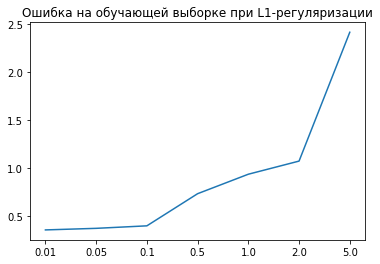

In [ ]:
plt.plot(train_error_l1)
plt.xticks(range(len(l_array)), l_array)
plt.title('Ошибка на обучающей выборке при L1-регуляризации')
plt.savefig('./Graphs/L1_regul_train.png', dpi=300)

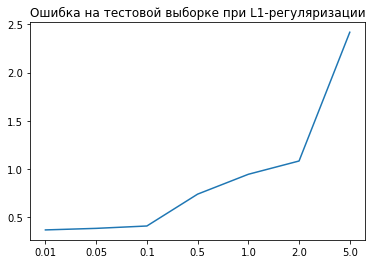

In [ ]:
plt.plot(test_error_l1)
plt.xticks(range(len(l_array)), l_array)
plt.title('Ошибка на тестовой выборке при L1-регуляризации')
plt.savefig('./Graphs/L1_regul_test.png', dpi=300)

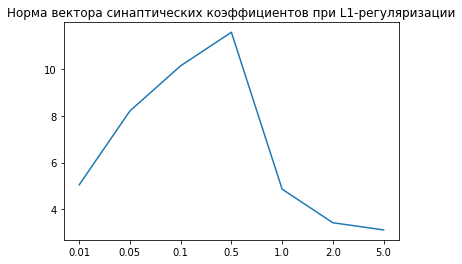

In [ ]:
normas = []
for w_l in weights:
    w = w_l[-1]
    s = 0
    for i in w:
        s += sum(i.reshape(-1) ** 2)
    normas.append(s ** 0.5)
plt.plot(normas)
plt.xticks(range(len(l_array)), l_array)
plt.title('Норма вектора синаптических коэффициентов при L1-регуляризации')
plt.savefig('./Graphs/L1_norm.png', dpi=300)

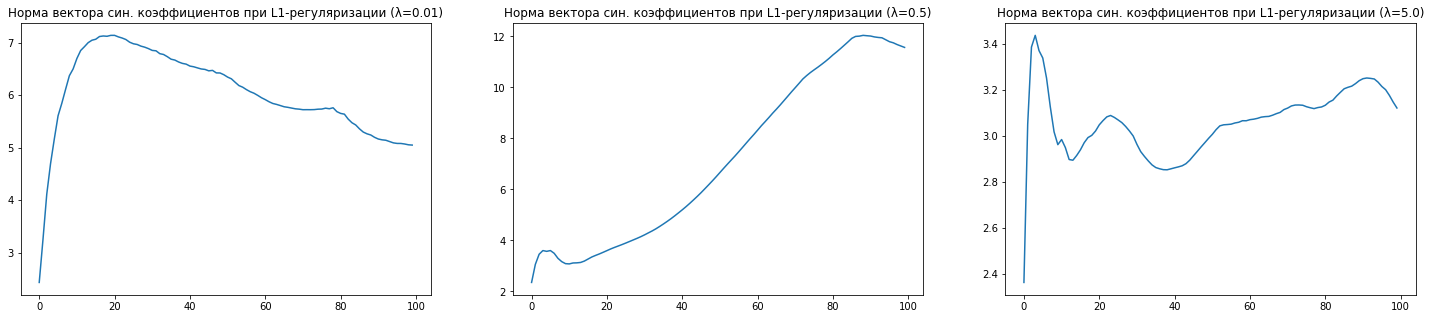

In [ ]:
normas = []
for w_l in [weights[0], weights[3], weights[-1]]:
    w_a = []
    for w_t in w_l:
        s = 0
        for i in w_t:
            s += sum(i.reshape(-1) ** 2)
        w_a.append(s ** 0.5)
    normas.append(w_a)
ll = [l_array[0], l_array[3], l_array[-1]]
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
for i in range(3):
    ax[i].plot(normas[i])
    ax[i].set_title('Норма вектора син. коэффициентов при L1-регуляризации (λ=' + str(ll[i]) + ')')
plt.savefig('./Graphs/L1_norm_with_lambdas.png', dpi=300)
plt.show()

#### L2-регуляризация

In [ ]:
l_array = [0.01, 0.05, 0.1, 0.5, 1., 2., 5.]
train_error_l2 = []
test_error_l2 = []
weights_l2 = []
x_train_n = x_train / ((x_train ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
x_test_n = x_test / ((x_test ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
for l in l_array:
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(14,)),
            layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer,
                        activity_regularizer = keras.regularizers.l2(l)),
            layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer,
                        activity_regularizer = keras.regularizers.l2(l)),
            layers.Dense(2, activation="softmax", kernel_initializer=kernel_initializer)
        ]
    )
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            lr=0.1,
            beta_1=0.9,
            beta_2=0.999
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy()
        ]
    )
    weights_history = []
    for i in range(100):
            model.fit(x_train_n, y_train, batch_size=batch_size, epochs=1, validation_data=(x_val, y_val), verbose = 1)
            weights_history.append(model.get_weights())
    weights_l2.append(weights_history)
    train_error_l2.append(model.evaluate(x_train_n, y_train, verbose = 0)[0])
    test_error_l2.append(model.evaluate(x_test_n, y_test, verbose = 0)[0])

Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 2s 108us/sample - loss: 0.6936 - binary_accuracy: 0.4890 - val_loss: 0.5810 - val_binary_accuracy: 0.8000
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.5931 - binary_accuracy: 0.7600 - val_loss: 0.5752 - val_binary_accuracy: 0.7923
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.4859 - binary_accuracy: 0.7773 - val_loss: 0.8901 - val_binary_accuracy: 0.7533
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.4616 - binary_accuracy: 0.8090 - val_loss: 0.7559 - val_binary_accuracy: 0.7588
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 0s 2us/sample - loss: 0.4289 - binary_accuracy: 0.8175 - val_loss: 0.5430 - val_binary_accuracy: 0.791

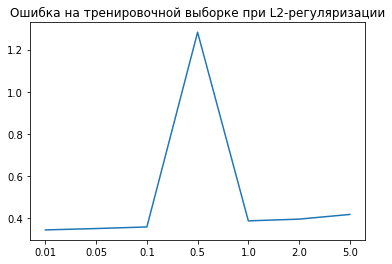

In [ ]:
plt.plot(train_error_l2)
plt.xticks(range(len(l_array)), l_array)
plt.title('Ошибка на тренировочной выборке при L2-регуляризации')
plt.savefig('./Graphs/L2_regul_train.png', dpi=300)

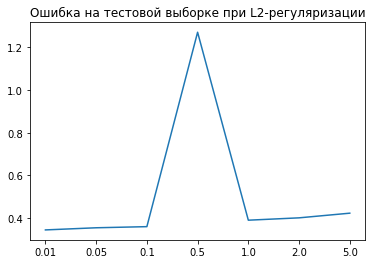

In [ ]:
plt.plot(test_error_l2)
plt.xticks(range(len(l_array)), l_array)
plt.title('Ошибка на тестовой выборке при L2-регуляризации')
plt.savefig('./Graphs/L2_regul_test.png', dpi=300)

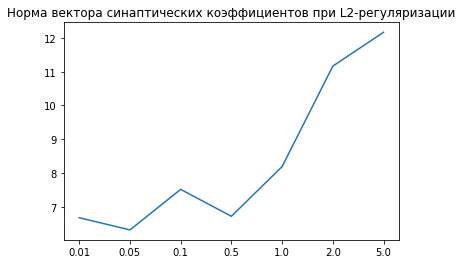

In [ ]:
normas = []
for w_l in weights_l2:
    w = w_l[-1]
    s = 0
    for i in w:
            s += sum(i.reshape(-1) ** 2)
    normas.append(s ** 0.5)

plt.plot(normas);
plt.xticks(range(len(l_array)), l_array)
plt.title('Норма вектора синаптических коэффициентов при L2-регуляризации')
plt.savefig('./Graphs/L2_norm.png', dpi=300)

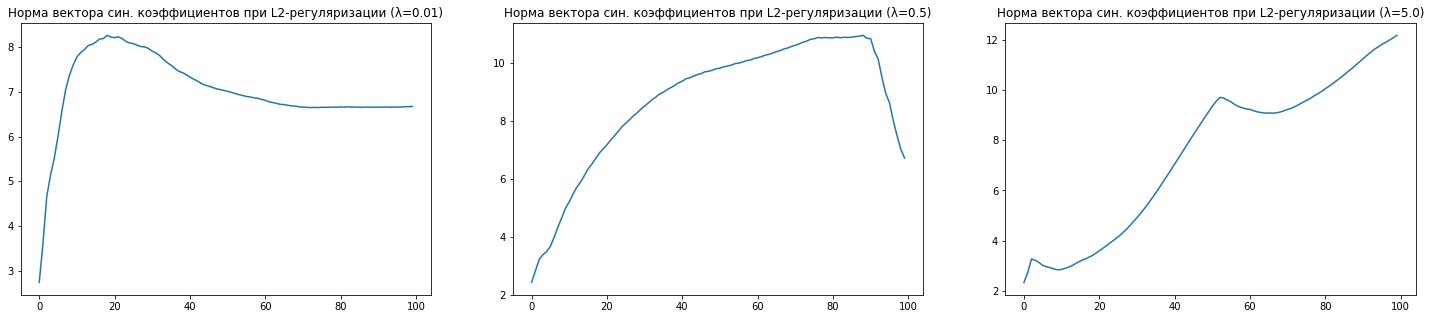

In [ ]:
normas = []
for w_l in [weights_l2[0], weights_l2[3], weights_l2[-1]]:
    w_a = []
    for w_t in w_l:
        s = 0
        for i in w_t:
            s += sum(i.reshape(-1) ** 2)
        w_a.append(s ** 0.5)
    normas.append(w_a)
ll = [l_array[0], l_array[3], l_array[-1]]
fig, ax = plt.subplots(1, 3, figsize=(25, 5))
for i in range(3):
    ax[i].plot(normas[i]);
    ax[i].set_title('Норма вектора син. коэффициентов при L2-регуляризации (λ=' + str(ll[i]) + ')')
plt.savefig('./Graphs/L2_norm_with_lambdas.png', dpi=300)
plt.show()

# 4.16 Инъекция шума

In [ ]:
s_array = [0.01, 0.05, 0.1, 0.5, 1., 2., 5.]
train_error = []
test_error = []
x_train_n = x_train / ((x_train ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
x_val_n = x_val / ((x_val ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
x_test_n = x_test / ((x_test ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
for sigma in s_array:
    x_train_s = x_train_n + sigma * np.random.randn(x_train.shape[0], x_train.shape[1])
    x_val_s = x_val_n + sigma * np.random.randn(x_val.shape[0], x_val.shape[1])
    model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(14,)),
            layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer),
            layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer),
            layers.Dense(2, activation="softmax", kernel_initializer=kernel_initializer)
        ]
    )
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            lr=0.1,
            beta_1=0.9,
            beta_2=0.999
        ),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy()
        ]
    )
    model.fit(x_train_s, y_train, batch_size=batch_size, epochs=100, validation_data=(x_val_s, y_val), verbose = 1)
    train_error.append(model.evaluate(x_train_n, y_train, verbose = 0)[0])
    test_error.append(model.evaluate(x_test_n, y_test, verbose = 0)[0])

Train on 19536 samples, validate on 9768 samples
Epoch 1/100
19536/19536 [==============================] - 2s 115us/sample - loss: 0.6932 - binary_accuracy: 0.4882 - val_loss: 0.5811 - val_binary_accuracy: 0.7591
Epoch 2/100
19536/19536 [==============================] - 0s 2us/sample - loss: 0.5813 - binary_accuracy: 0.7600 - val_loss: 0.4517 - val_binary_accuracy: 0.7858
Epoch 3/100
19536/19536 [==============================] - 0s 1us/sample - loss: 0.4550 - binary_accuracy: 0.7861 - val_loss: 0.4037 - val_binary_accuracy: 0.8167
Epoch 4/100
19536/19536 [==============================] - 0s 1us/sample - loss: 0.4158 - binary_accuracy: 0.8126 - val_loss: 0.3812 - val_binary_accuracy: 0.8199
Epoch 5/100
19536/19536 [==============================] - 0s 2us/sample - loss: 0.3935 - binary_accuracy: 0.8146 - val_loss: 0.3691 - val_binary_accuracy: 0.8352
Epoch 6/100
19536/19536 [==============================] - 0s 1us/sample - loss: 0.3781 - binary_accuracy: 0.8271 - val_loss: 0.3708 -

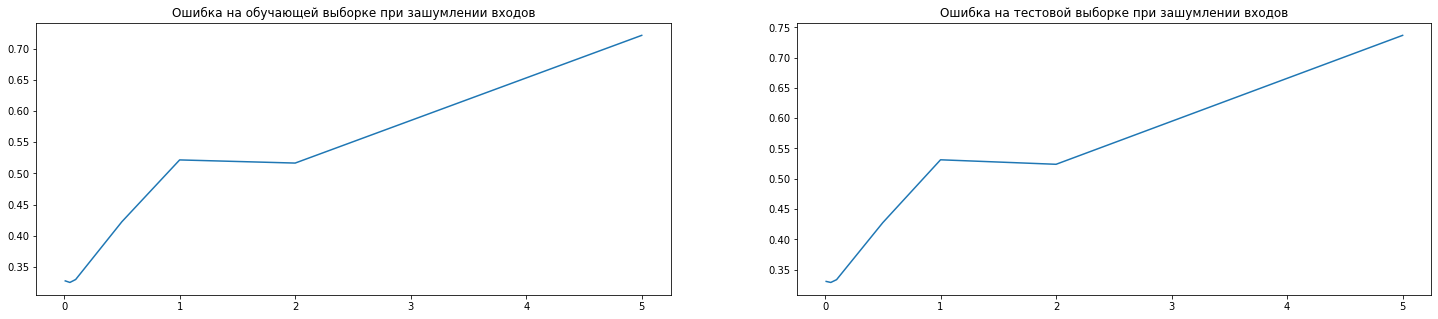

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 5))
ax[0].plot(s_array, train_error)
ax[0].set_title('Ошибка на обучающей выборке при зашумлении входов')
ax[1].plot(s_array, test_error)
ax[1].set_title('Ошибка на тестовой выборке при зашумлении входов')
plt.savefig('./Graphs/noise.png', dpi=300)

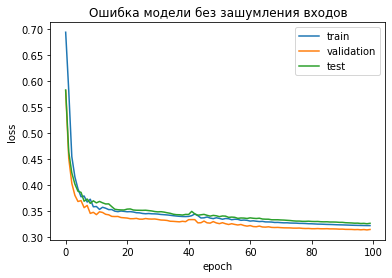

In [ ]:
s_array = [0.01, 0.05, 0.1, 0.5, 1., 2., 5.]
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(14,)),
        layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer),
        layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer),
        layers.Dense(2, activation="softmax", kernel_initializer=kernel_initializer)
    ]
)
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        lr=0.1,
        beta_1=0.9,
        beta_2=0.999
    ),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy()
    ]
)
loss = []
val_loss = []
test_loss = []
for i in range(100):
    fit = model.fit(x_train_n, y_train, batch_size=batch_size, epochs=1, validation_data=(x_val_n, y_val), verbose = 0)
    loss.append(fit.history['loss'][0])
    val_loss.append(fit.history['val_loss'][0])
    test_loss.append(model.evaluate(x_test_n, y_test, verbose = 0)[0])
plt.plot(loss);
plt.plot(val_loss);
plt.plot(test_loss)
plt.title('Ошибка модели без зашумления входов')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'test'], loc='upper right')
plt.savefig('./Graphs/without_noise.png', dpi=300)

Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 4s 197us/sample - loss: 0.6215 - binary_accuracy: 0.7268 - val_loss: 0.6689 - val_binary_accuracy: 0.7467
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 2s 77us/sample - loss: 0.6172 - binary_accuracy: 0.7267 - val_loss: 0.6462 - val_binary_accuracy: 0.7003
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 2s 79us/sample - loss: 0.6131 - binary_accuracy: 0.7256 - val_loss: 0.6040 - val_binary_accuracy: 0.7368
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 2s 79us/sample - loss: 0.6184 - binary_accuracy: 0.7252 - val_loss: 0.6188 - val_binary_accuracy: 0.7265
Train on 19536 samples, validate on 9768 samples
19536/19536 [==============================] - 2s 78us/sample - loss: 0.6248 - binary_accuracy: 0.7219 - val_loss: 0.6368 - val_binary_accuracy: 0

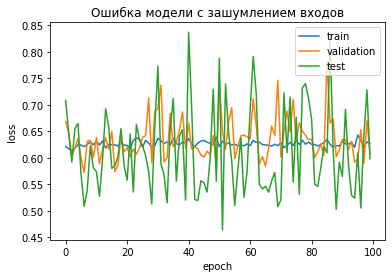

In [ ]:
s_array = [0.01, 0.05, 0.1, 0.5, 1., 2., 5.]

x_train_s = x_train_n + 2. * np.random.randn(x_train.shape[0], x_train.shape[1])
x_val_s = x_val_n + 2. * np.random.randn(x_val.shape[0], x_val.shape[1])
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(14,)),
        layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer),
        layers.Dense(20, activation="tanh", kernel_initializer=kernel_initializer),
        layers.Dense(2, activation="softmax", kernel_initializer=kernel_initializer)
    ]
)
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        lr=0.1,
        beta_1=0.9,
        beta_2=0.999
    ),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy()
    ]
)
loss = []
val_loss = []
test_loss = []
for i in range(100):
    fit = model.fit(x_train_s, y_train, batch_size=None, epochs=1, validation_data=(x_val_s, y_val), verbose = 1)
    loss.append(fit.history['loss'][0])
    val_loss.append(fit.history['val_loss'][0])
    test_loss.append(model.evaluate(x_test_n, y_test, verbose = 0)[0])
plt.plot(loss);
plt.plot(val_loss);
plt.plot(test_loss);
plt.title('Ошибка модели с зашумлением входов')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation', 'test'], loc='upper right')
plt.savefig('./Graphs/with_noise.png', dpi=300)

# 5. Исследование обученной нейросетевой модели

In [ ]:
x_train_n = x_train / ((x_train ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
x_val_n = x_val / ((x_val ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
x_test_n = x_test / ((x_test ** 2).sum(axis=1)[:, np.newaxis]) ** 0.5
model = keras.Sequential(
        [
            layers.InputLayer(input_shape=(14,)),
            layers.Dense(firstLayerAmountOfNeurons, activation=firstLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(secondLayerAmountOfNeurons, activation=secondLayerActivation, kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
            layers.Dense(2, activation="softmax", kernel_initializer=tf.keras.initializers.glorot_normal(seed=1)),
        ]
    )
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.1), metrics=['accuracy'])
model.fit(x_train_n, y_train, batch_size=batch_size, epochs=100, validation_data=(x_val_n, y_val), verbose = 0)

In [ ]:
y_ans_train = model.predict(x_train_n)
y_ans_val = model.predict(x_val_n)
y_ans_test = model.predict(x_test_n)

y_ans_train

array([[0.98827606, 0.01172395],
       [0.36590126, 0.6340987 ],
       [0.9499142 , 0.05008578],
       ...,
       [0.98827225, 0.0117278 ],
       [0.59390557, 0.40609443],
       [0.98909134, 0.01090869]], dtype=float32)

In [ ]:
y_ans_train[y_ans_train >= 0.5] = 1
y_ans_train[y_ans_train < 0.5] = 0

y_ans_test[y_ans_test >= 0.5] = 1
y_ans_test[y_ans_test < 0.5] = 0

y_ans_val[y_ans_val >= 0.5] = 1
y_ans_val[y_ans_val < 0.5] = 0


In [ ]:
y_true_train = y_train
y_true_val = y_val
y_true_test = y_test

y_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y_true_test)):
  if y_ans_test[i][0] == 1 and y_true_test[i][0] == 1:
    tp += 1
  elif y_ans_test[i][0] == 0 and y_true_test[i][0] == 1:
    fn += 1
  elif y_ans_test[i][0] == 1 and y_true_test[i][0] == 0:
    fp += 1
  elif y_ans_test[i][0] == 0 and y_true_test[i][0] == 0:
    tn += 1
for i in range(len(y_true_val)):
  if y_ans_val[i][0] == 1 and y_true_val[i][0] == 1:
    tp += 1
  elif y_ans_val[i][0] == 0 and y_true_val[i][0] == 1:
    fn += 1
  elif y_ans_val[i][0] == 1 and y_true_val[i][0] == 0:
    fp += 1
  elif y_ans_val[i][0] == 0 and y_true_val[i][0] == 0:
    tn += 1

In [ ]:
print('True positive:', tp)
print('True negative:', tn)
print('False positive:', fp)
print('False negative:', fn)

True positive: 9207
True negative: 1860
False positive: 1292
False negative: 666


In [ ]:
print('Ошибка классификации на обучающей выборке:', np.sum(np.fabs(y_true_train - y_ans_train)) / len(y_ans_train))

Ошибка классификации на обучающей выборке: 0.30548730548730546


In [ ]:
print('Ошибка классификации на тестовой выборке:', (fp + fn)/(tp + tn + fp + fn))

Ошибка классификации на тестовой выборке: 0.15032629558541266


In [ ]:
shutil.make_archive('./Graphs', 'zip', 'Graphs')

'/content/Graphs.zip'

In [ ]:
from google.colab import files
files.download('./Graphs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sns.heatmap(np.fabs(model.get_weights()[0]), yticklabels = list(x_train.shape[0]));

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f6063314950> (for post_execute):


KeyboardInterrupt: ignored